# R Notebook: Dry State and Spell Length Distributions

Dry state, spell length for PRISM data.

Uses R to do some analysis

Add in the part to make a DataFrame with our best fit negative binomial parameters and then to output this to a spreadsheet

## Parameters and Library Loading

In [1]:
library(feather)
library(dplyr)
library(fitdistrplus)
library(vcd)
library(dgof)
library(xlsx)
library(r2excel)

Warning message:
"package 'feather' was built under R version 3.6.1"Warning message:
"package 'dplyr' was built under R version 3.6.1"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'fitdistrplus' was built under R version 3.6.1"Loading required package: MASS

Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Loading required package: survival
Loading required package: npsurv
Loading required package: lsei
Warning message:
"package 'vcd' was built under R version 3.6.1"Loading required package: grid

Attaching package: 'dgof'

The following object is masked from 'package:stats':

    ks.test



**Note:** We only want to mask package:stats ks.test with that from package:dgof when working with discrete distributions.

In [2]:
setwd("//augustine.space.swri.edu/jdrive/Groundwater/R8937_Stochastic_CC_Recharge/Data/R/Working")

Now specify some parameters - just file names

In [3]:
feDPath <- "DryDays_1981-2010.feather"

## Initial Load and Process of DataFrame

In [4]:
dfDry <- read_feather(feDPath)
ddates <- as.Date( ISOdate( dfDry$Year, dfDry$Month, dfDry$Day ) )
dfDry["Date"] <- ddates

Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"Warning message:
"Coercing int64 to double"

In [5]:
str(dfDry)

Classes 'tbl_df', 'tbl' and 'data.frame':	226400 obs. of  6 variables:
 $ Grid_Id  : num  662328 662328 662328 662328 662328 ...
 $ Year     : num  1981 1981 1981 1981 1981 ...
 $ Month    : num  1 1 1 1 1 1 2 2 2 3 ...
 $ Day      : num  1 7 10 12 15 20 6 11 22 2 ...
 $ Dry_Count: num  5 2 1 2 2 16 4 10 6 1 ...
 $ Date     : Date, format: "1981-01-01" "1981-01-07" ...


In [6]:
head(dfDry)

Grid_Id,Year,Month,Day,Dry_Count,Date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
662328,1981,1,1,5,1981-01-01
662328,1981,1,7,2,1981-01-07
662328,1981,1,10,1,1981-01-10
662328,1981,1,12,2,1981-01-12
662328,1981,1,15,2,1981-01-15
662328,1981,1,20,16,1981-01-20


First filter for each month with all Grid_Id

In [7]:
dJan <- dfDry %>% filter( Month == 1 )
dFeb <- dfDry %>% filter( Month == 2 )
dMar <- dfDry %>% filter( Month == 3 )
dApr <- dfDry %>% filter( Month == 4 )
dMay <- dfDry %>% filter( Month == 5 )
dJun <- dfDry %>% filter( Month == 6 )
dJul <- dfDry %>% filter( Month == 7 )
dAug <- dfDry %>% filter( Month == 8 )
dSep <- dfDry %>% filter( Month == 9 )
dOct <- dfDry %>% filter( Month == 10 )
dNov <- dfDry %>% filter( Month == 11 )
dDec <- dfDry %>% filter( Month == 12 )

Set-up a dataframe to store the basic summary statistics. Eventually will write this to Excel.

In [8]:
MonSumStatDF <- data.frame( month=rep(NA,12), mean=rep(NA,12), median=rep(NA,12), 
                            max=rep(NA,12), min=rep(NA,12), stdev=rep(NA,12), var=rep(NA,12),
                            perc0=rep(NA,12), perc10=rep(NA,12), perc20=rep(NA,12), 
                            perc30=rep(NA,12), perc40=rep(NA,12), perc50=rep(NA,12),
                            perc60=rep(NA,12), perc70=rep(NA,12), perc80=rep(NA,12), 
                            perc90=rep(NA,12), perc100=rep(NA,12), stringsAsFactors=FALSE )

In [9]:
pvec <- seq(0,1,0.1)

In [10]:
NumDeciles = length( pvec )
cat("Number of deciles: ", NumDeciles)

Number of deciles:  11

Now look at summary stats for the dry day counts for each month

In [11]:
summary( dJan$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   6.000   8.667  11.000  64.000 

In [12]:
oQuants = quantile( dJan$Dry_Count, pvec )

In [13]:
MonSumStatDF[1, ] <-list( 1, mean(dJan$Dry_Count), median(dJan$Dry_Count), 
                          max(dJan$Dry_Count), min(dJan$Dry_Count), sd(dJan$Dry_Count),
                          var(dJan$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [14]:
summary( dFeb$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   8.246  10.000  54.000 

In [15]:
oQuants = quantile( dFeb$Dry_Count, pvec )

In [16]:
MonSumStatDF[2, ] <-list( 2, mean(dFeb$Dry_Count), median(dFeb$Dry_Count), 
                          max(dFeb$Dry_Count), min(dFeb$Dry_Count), sd(dFeb$Dry_Count),
                          var(dFeb$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [17]:
summary( dMar$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   8.187  10.000  61.000 

In [18]:
oQuants = quantile( dMar$Dry_Count, pvec )

In [19]:
MonSumStatDF[3, ] <-list( 3, mean(dMar$Dry_Count), median(dMar$Dry_Count), 
                          max(dMar$Dry_Count), min(dMar$Dry_Count), sd(dMar$Dry_Count),
                          var(dMar$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [20]:
summary( dApr$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   7.712  10.000  50.000 

In [21]:
oQuants = quantile( dApr$Dry_Count, pvec )

In [22]:
MonSumStatDF[4, ] <-list( 4, mean(dApr$Dry_Count), median(dApr$Dry_Count), 
                          max(dApr$Dry_Count), min(dApr$Dry_Count), sd(dApr$Dry_Count),
                          var(dApr$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [23]:
summary( dMay$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.138   9.000  48.000 

In [24]:
oQuants = quantile( dMay$Dry_Count, pvec )

In [25]:
MonSumStatDF[5, ] <-list( 5, mean(dMay$Dry_Count), median(dMay$Dry_Count), 
                          max(dMay$Dry_Count), min(dMay$Dry_Count), sd(dMay$Dry_Count),
                          var(dMay$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [26]:
summary( dJun$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   6.979   8.000  91.000 

In [27]:
oQuants = quantile( dJun$Dry_Count, pvec )

In [28]:
MonSumStatDF[6, ] <-list( 6, mean(dJun$Dry_Count), median(dJun$Dry_Count), 
                          max(dJun$Dry_Count), min(dJun$Dry_Count), sd(dJun$Dry_Count),
                          var(dJun$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [29]:
summary( dJul$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   6.000   9.004  13.000  48.000 

In [30]:
oQuants = quantile( dJul$Dry_Count, pvec )

In [31]:
MonSumStatDF[7, ] <-list( 7, mean(dJul$Dry_Count), median(dJul$Dry_Count), 
                          max(dJul$Dry_Count), min(dJul$Dry_Count), sd(dJul$Dry_Count),
                          var(dJul$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [32]:
summary( dAug$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   6.788   9.000 122.000 

In [33]:
oQuants = quantile( dAug$Dry_Count, pvec )

In [34]:
MonSumStatDF[8, ] <-list( 8, mean(dAug$Dry_Count), median(dAug$Dry_Count), 
                          max(dAug$Dry_Count), min(dAug$Dry_Count), sd(dAug$Dry_Count),
                          var(dAug$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [35]:
summary( dSep$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   4.000   7.639  10.000 100.000 

In [36]:
oQuants = quantile( dSep$Dry_Count, pvec )

In [37]:
MonSumStatDF[9, ] <-list( 9, mean(dSep$Dry_Count), median(dSep$Dry_Count), 
                          max(dSep$Dry_Count), min(dSep$Dry_Count), sd(dSep$Dry_Count),
                          var(dSep$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [38]:
summary( dOct$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   5.000   9.825  11.000  85.000 

In [39]:
oQuants = quantile( dOct$Dry_Count, pvec )

In [40]:
MonSumStatDF[10, ] <-list( 10, mean(dOct$Dry_Count), median(dOct$Dry_Count), 
                          max(dOct$Dry_Count), min(dOct$Dry_Count), sd(dOct$Dry_Count),
                          var(dOct$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [41]:
summary( dNov$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    8.00   11.09   14.00   64.00 

In [42]:
oQuants = quantile( dNov$Dry_Count, pvec )

In [43]:
MonSumStatDF[11, ] <-list( 11, mean(dNov$Dry_Count), median(dNov$Dry_Count), 
                          max(dNov$Dry_Count), min(dNov$Dry_Count), sd(dNov$Dry_Count),
                          var(dNov$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [44]:
summary( dDec$Dry_Count )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    6.00   11.28   15.00   90.00 

In [45]:
oQuants = quantile( dDec$Dry_Count, pvec )

In [46]:
MonSumStatDF[12, ] <-list( 12, mean(dDec$Dry_Count), median(dDec$Dry_Count), 
                          max(dDec$Dry_Count), min(dDec$Dry_Count), sd(dDec$Dry_Count),
                          var(dDec$Dry_Count), oQuants[1], oQuants[2], oQuants[3],
                          oQuants[4], oQuants[5], oQuants[6], oQuants[7], oQuants[8],
                          oQuants[9], oQuants[10], oQuants[11] )

In [47]:
print( MonSumStatDF, quote=FALSE, row.names=FALSE )

 month      mean median max min     stdev       var perc0 perc10 perc20 perc30
     1  8.667023      6  64   1  8.527399  72.71654     1      1      2      3
     2  8.246318      5  54   1  8.429615  71.05841     1      1      2      3
     3  8.187301      6  61   1  7.879757  62.09057     1      2      2      4
     4  7.712354      6  50   1  7.125928  50.77886     1      2      3      4
     5  6.137622      4  48   1  6.091366  37.10474     1      1      2      2
     6  6.979430      4  91   1  8.731973  76.24735     1      1      1      2
     7  9.004230      6  48   1  9.498380  90.21923     1      1      1      2
     8  6.787960      5 122   1  7.053983  49.75868     1      1      2      2
     9  7.639352      4 100   1  8.227514  67.69199     1      1      2      2
    10  9.825452      5  85   1 12.975111 168.35351     1      1      2      3
    11 11.089027      8  64   1 11.417011 130.34814     1      2      2      3
    12 11.275549      6  90   1 12.856142 165.28039 

## Month Distribution Fits

Start out by making distributions using all of the grid cells

There are 4 steps in fitting distributions (Ricci, 2005):

1. Model/function choice: hypothesize families of distributions;
2. Estimate parameters;
3. Evaluate quality of fit;
4. Goodness of fit statistical tests.

We will use the negative binomial distribution, **nbinom**, for the wet and dry day spell length distributions so #1 is taken care of and we can start with #2.

### Basic Plotting and Analysis

Basic plotting and analysis is to look at discrete histograms, empirial CDFs, and Q-Q plots with theoretical negative binomial distributions for each month. This is to ensure that everything looks exceptable.

Use another value tracking DataFrame here to keep track of sample distribution and theoretical, fitted distribution properties.

In [48]:
MonDistDF <- data.frame( month=rep(NA,12), smu=rep(NA,12), ssize=rep(NA,12),
                         sprob=rep(NA,12), tmu=rep(NA,12), tsize=rep(NA,12),
                         pvalue=rep(NA,12), stringsAsFactors=FALSE )

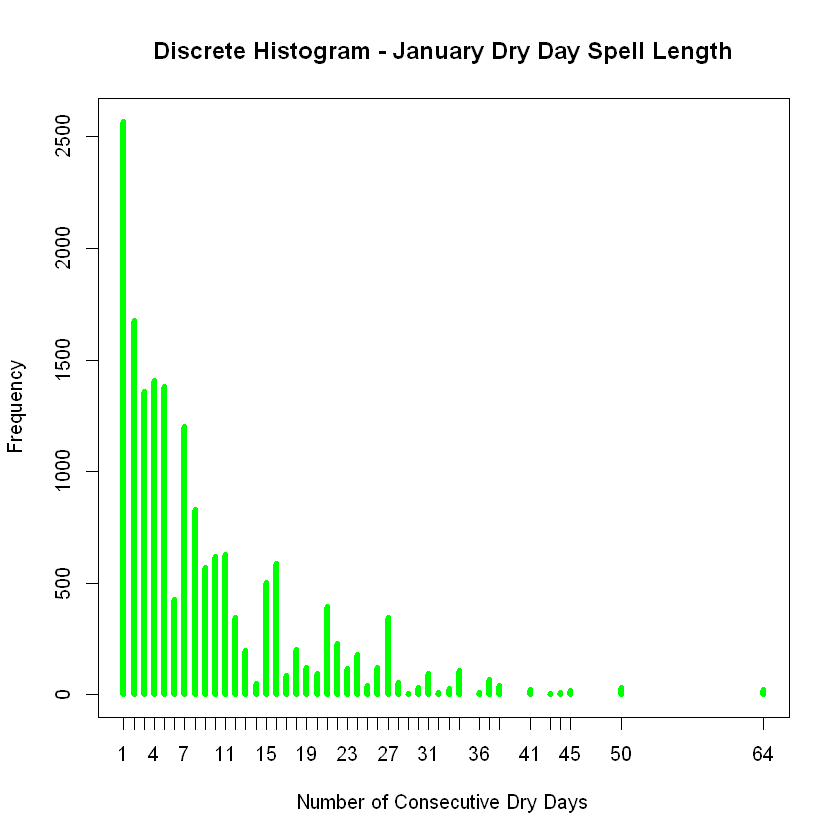

In [49]:
# continuous histogram plotting with density
#hist( dJan$Dry_Count, breaks=25, prob=T, xlab="Number of Consecutive Dry Days",
#      main="Histogram - January Dry Day Spell Length", col="green" )
#lines( density(dJan$Dry_Count), col="black")
# our case is discrete so use this command
plot( table( dJan$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - January Dry Day Spell Length", 
      col="green" )

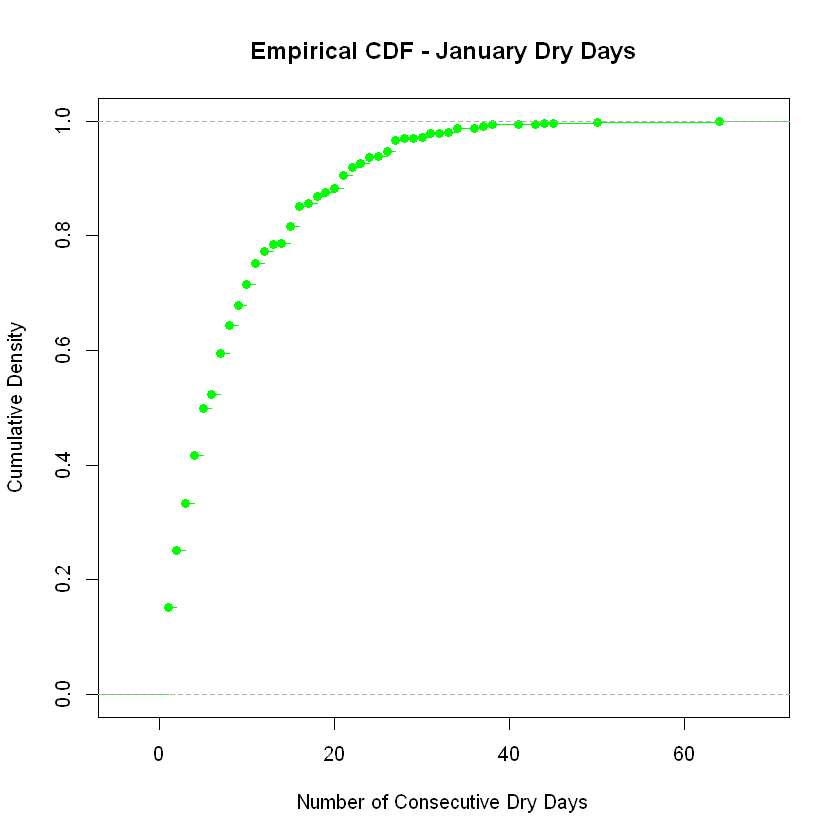

In [50]:
plot(ecdf(dJan$Dry_Count), main="Empirical CDF - January Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

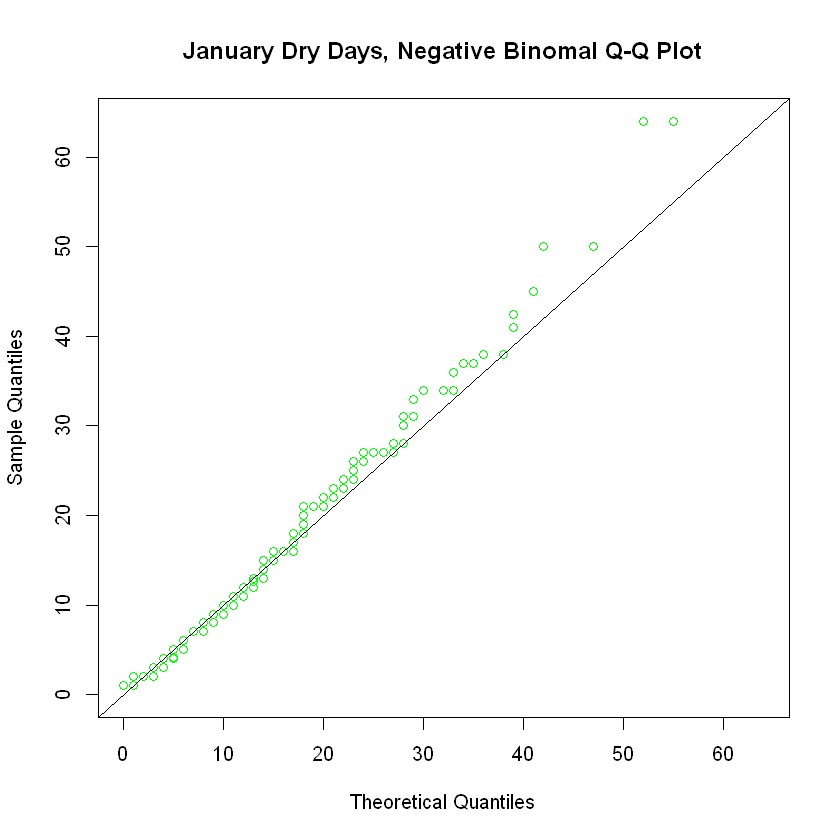

In [51]:
dJanMax <- max( dJan$Dry_Count )
dJanMean <- mean( dJan$Dry_Count )
dJanVar <- var( dJan$Dry_Count )
dJanBNr <- dJanMean^2 / (dJanVar - dJanMean)
dJanTstNB <- rnbinom( 1000, mu=dJanMean, size=dJanBNr )
qqplot( dJanTstNB, dJan$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="January Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dJanMax), ylim=c(0,dJanMax) )
abline( 0, 1)

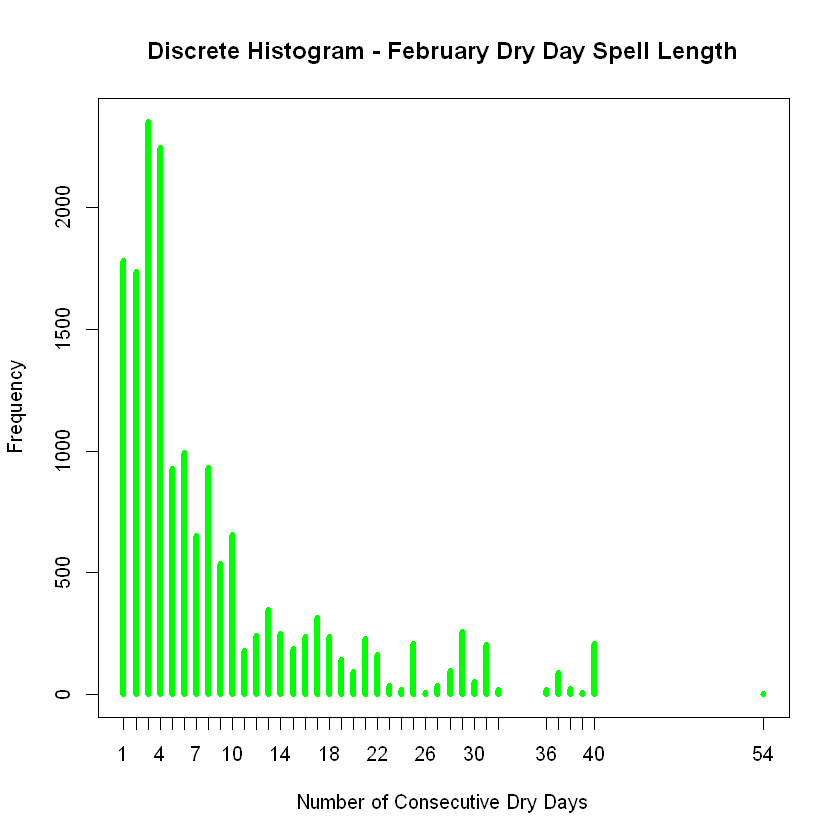

In [52]:
plot( table( dFeb$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - February Dry Day Spell Length", 
      col="green" )

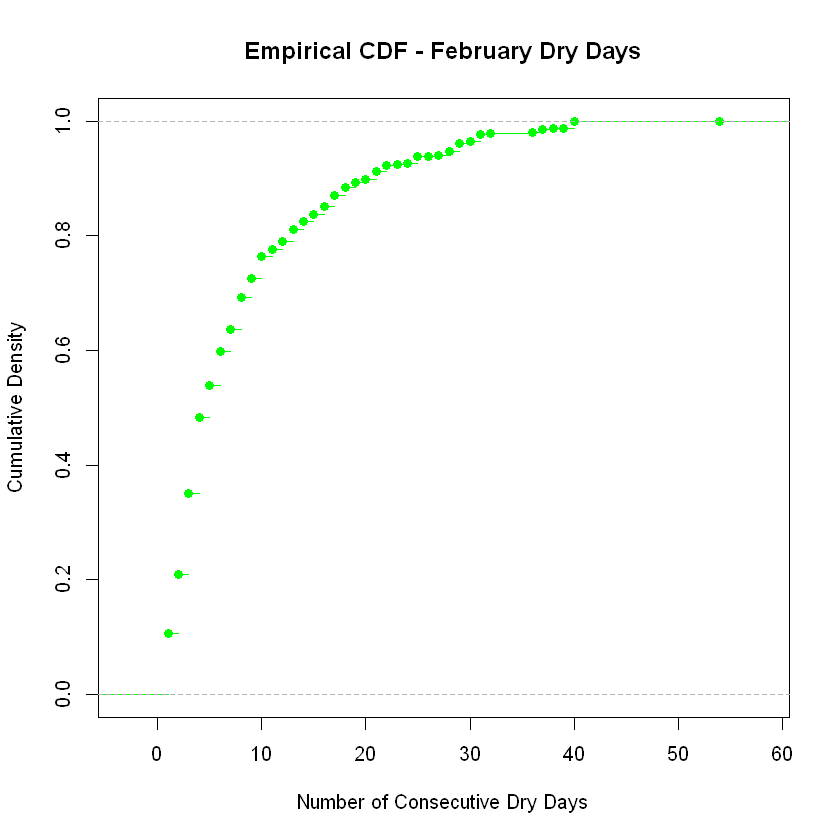

In [53]:
plot(ecdf(dFeb$Dry_Count), main="Empirical CDF - February Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

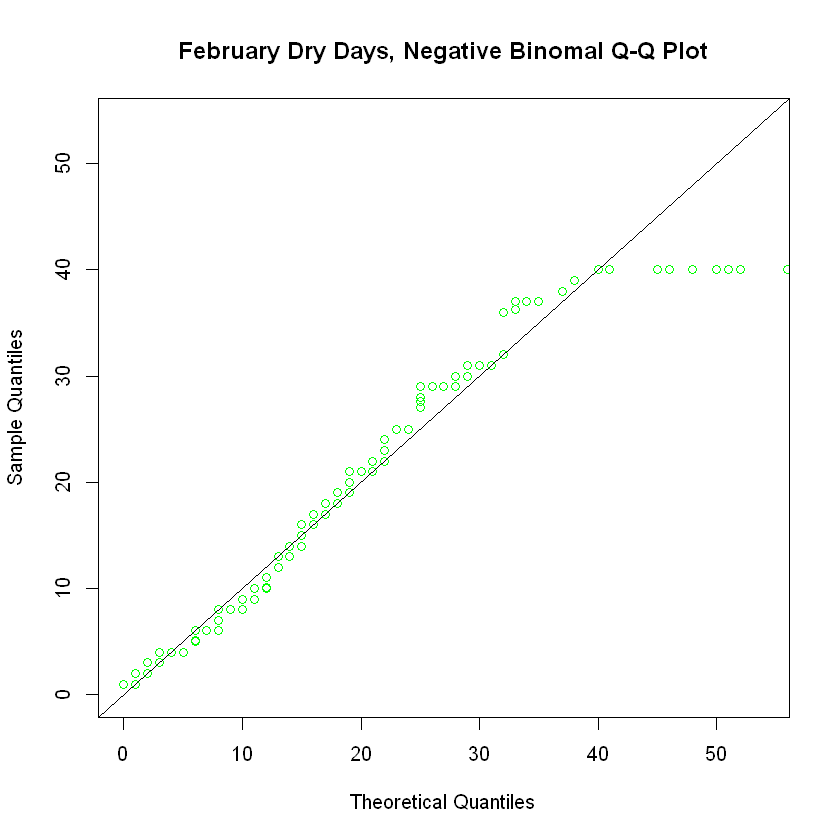

In [54]:
dFebMax <- max( dFeb$Dry_Count )
dFebMean <- mean( dFeb$Dry_Count )
dFebVar <- var( dFeb$Dry_Count )
dFebBNr <- dFebMean^2 / (dFebVar - dFebMean)
dFebTstNB <- rnbinom( 1000, mu=dFebMean, size=dFebBNr )
qqplot( dFebTstNB, dFeb$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="February Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dFebMax), ylim=c(0,dFebMax) )
abline( 0, 1)

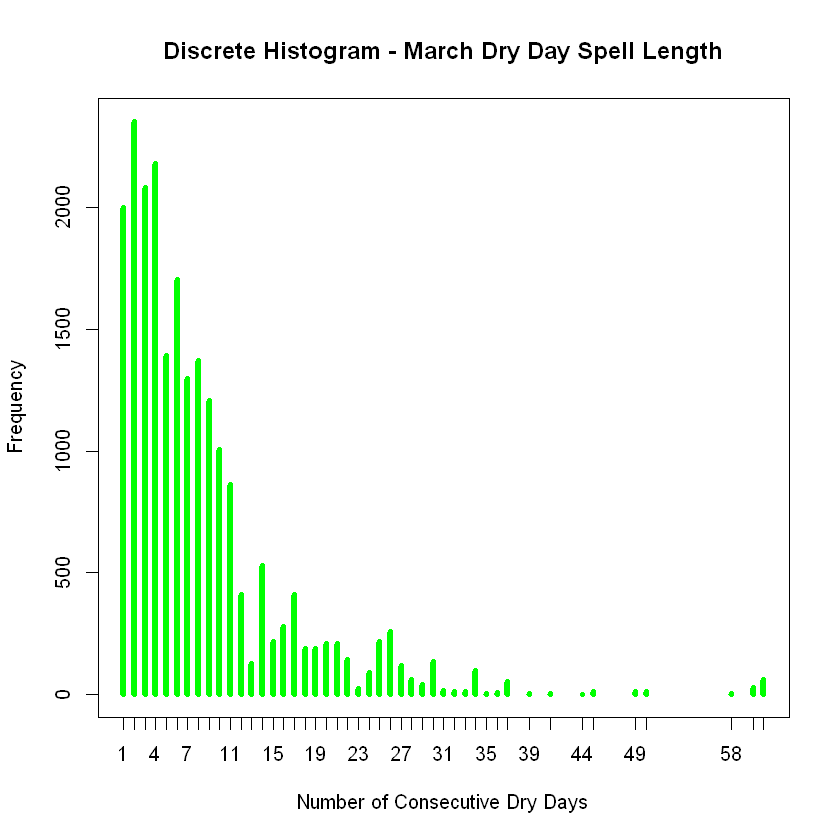

In [55]:
plot( table( dMar$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - March Dry Day Spell Length", 
      col="green" )

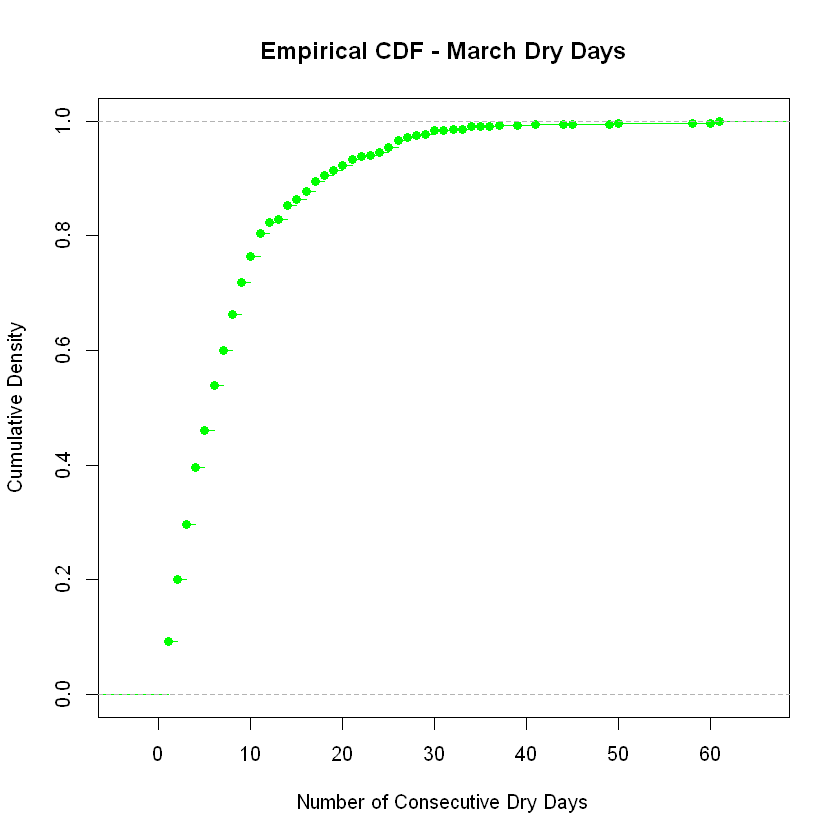

In [56]:
plot(ecdf(dMar$Dry_Count), main="Empirical CDF - March Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

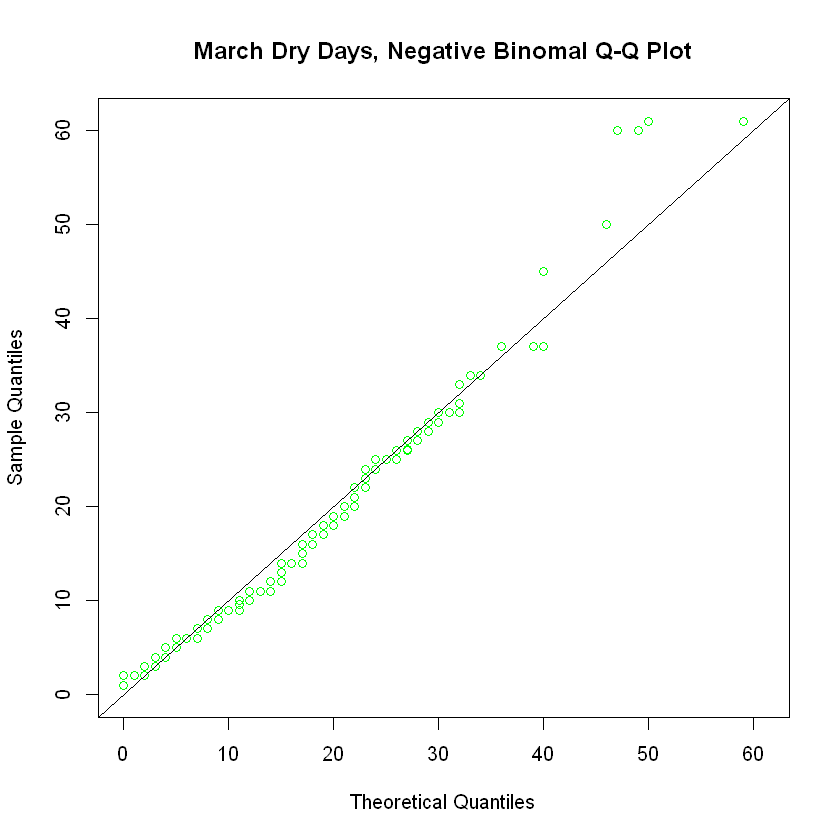

In [57]:
dMarMax <- max( dMar$Dry_Count )
dMarMean <- mean( dMar$Dry_Count )
dMarVar <- var( dMar$Dry_Count )
dMarBNr <- dMarMean^2 / (dMarVar - dMarMean)
dMarTstNB <- rnbinom( 1000, mu=dMarMean, size=dMarBNr )
qqplot( dMarTstNB, dMar$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="March Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dMarMax), ylim=c(0,dMarMax) )
abline( 0, 1)

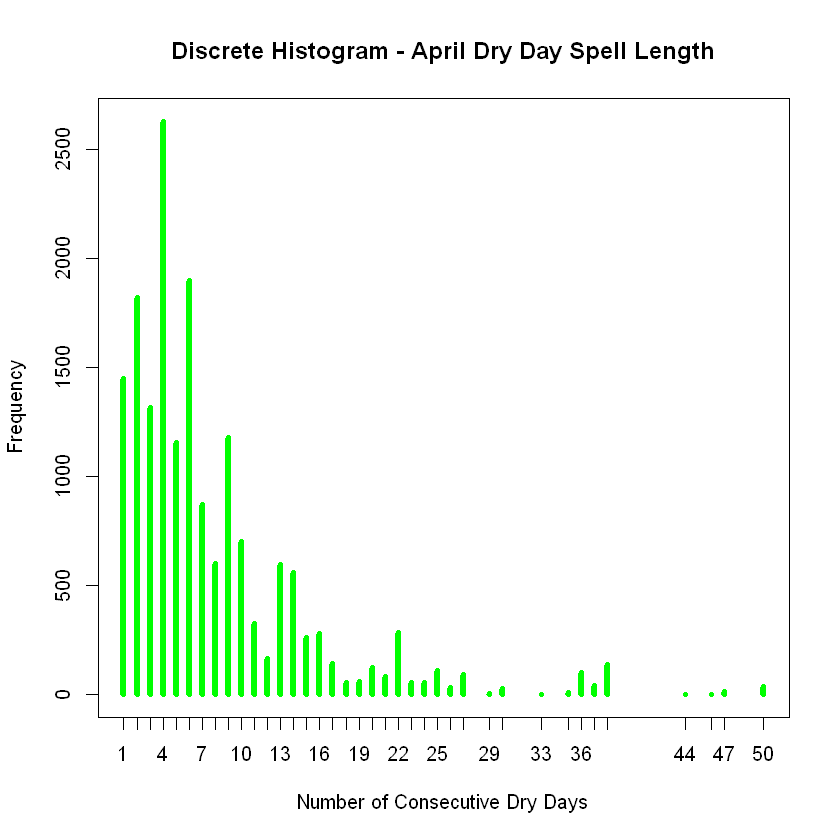

In [58]:
plot( table( dApr$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - April Dry Day Spell Length", 
      col="green" )

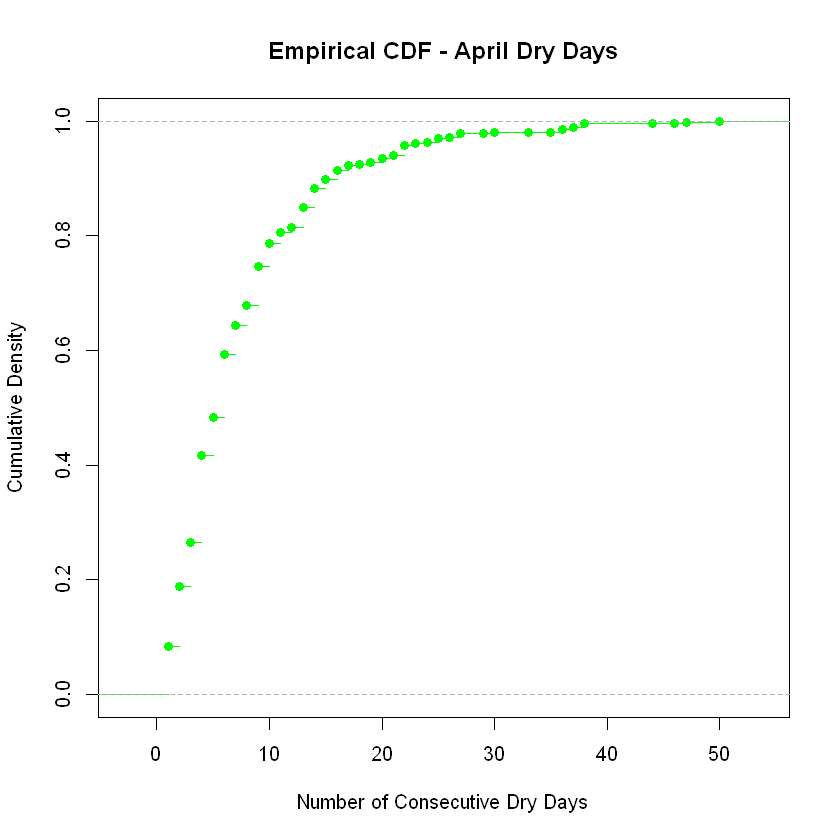

In [59]:
plot(ecdf(dApr$Dry_Count), main="Empirical CDF - April Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

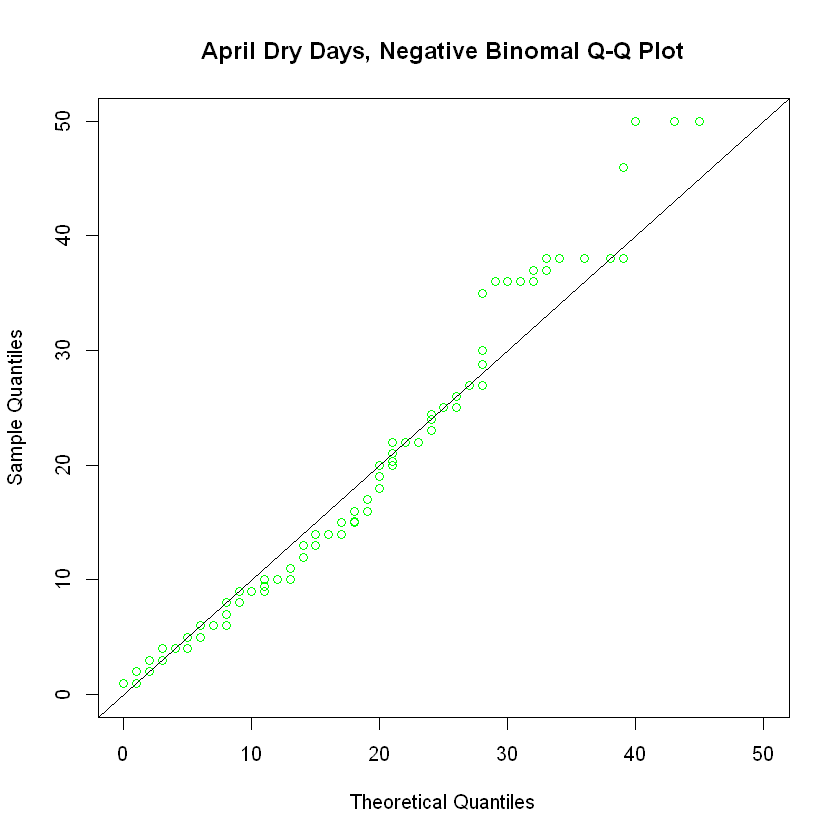

In [60]:
dAprMax <- max( dApr$Dry_Count )
dAprMean <- mean( dApr$Dry_Count )
dAprVar <- var( dApr$Dry_Count )
dAprBNr <- dAprMean^2 / (dAprVar - dAprMean)
dAprTstNB <- rnbinom( 1000, mu=dAprMean, size=dAprBNr )
qqplot( dAprTstNB, dApr$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="April Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dAprMax), ylim=c(0,dAprMax) )
abline( 0, 1)

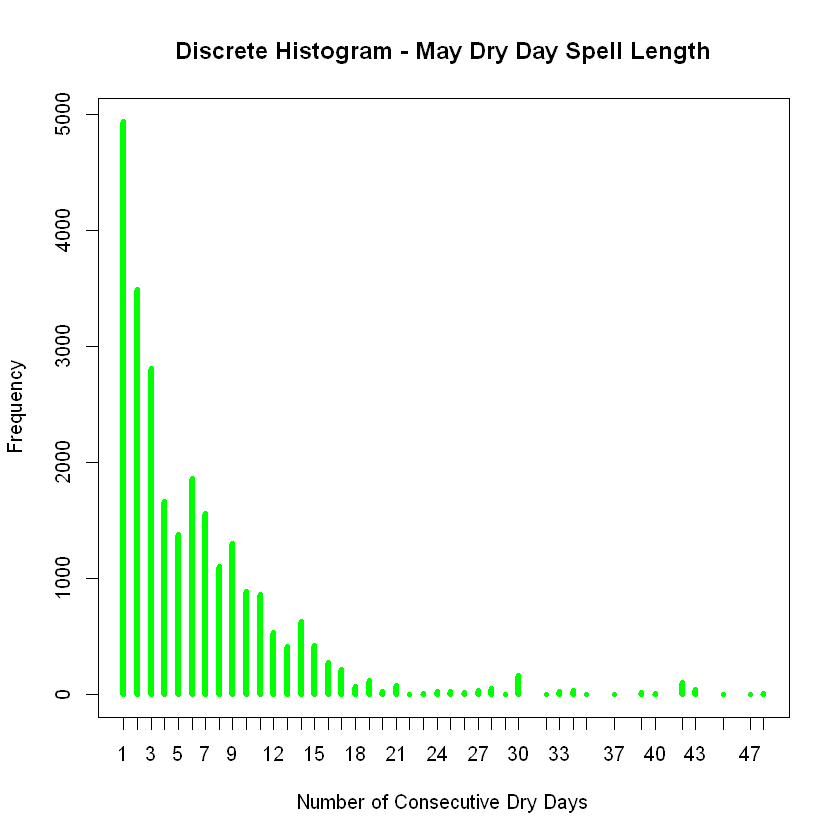

In [61]:
plot( table( dMay$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - May Dry Day Spell Length", 
      col="green" )

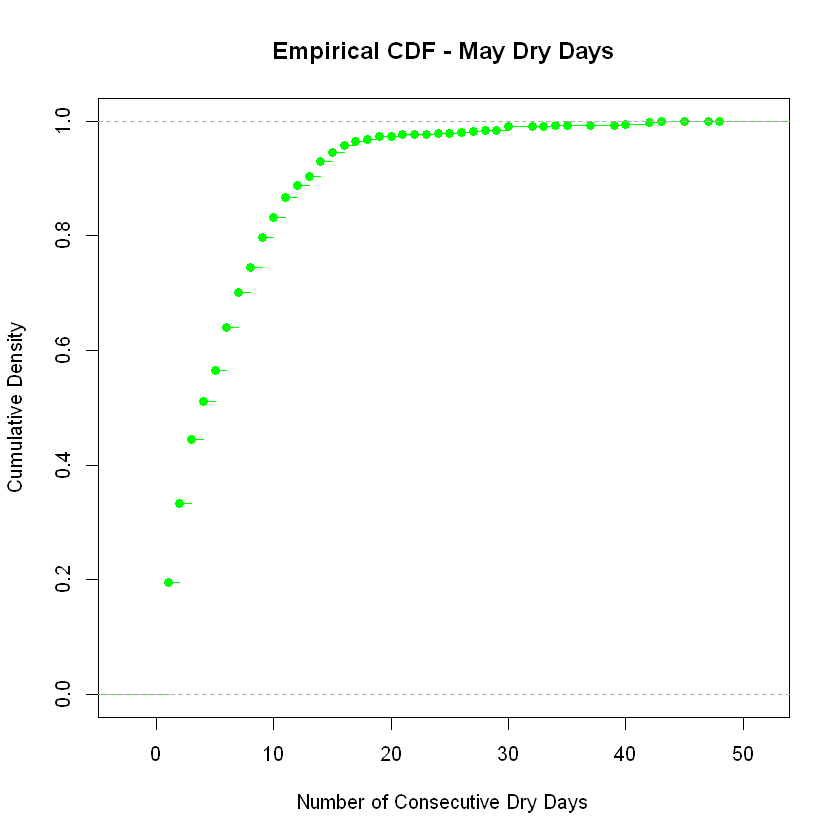

In [62]:
plot(ecdf(dMay$Dry_Count), main="Empirical CDF - May Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

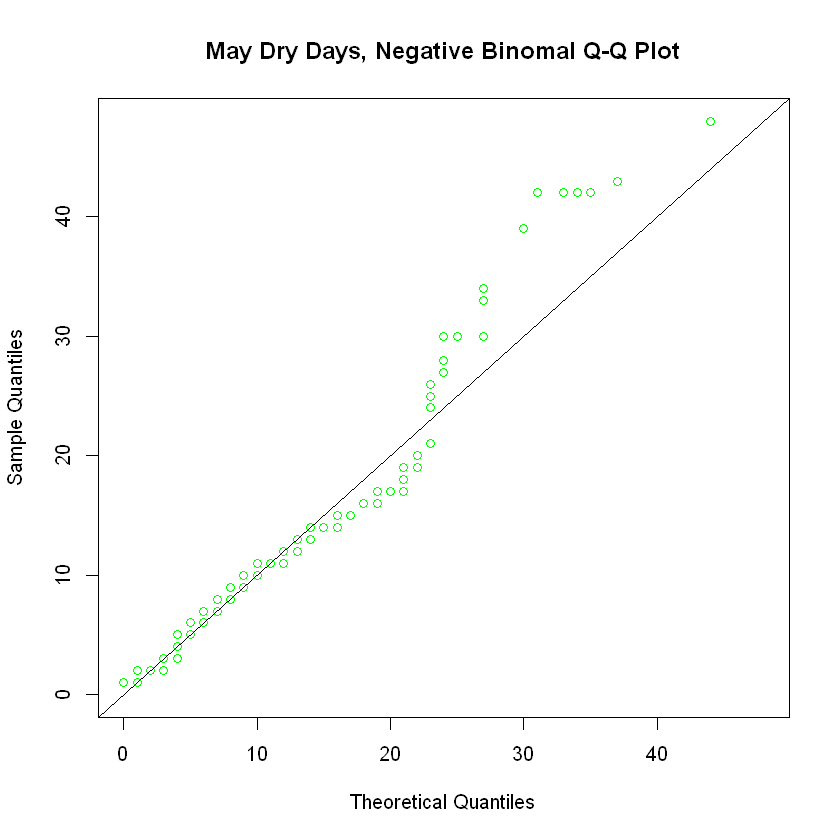

In [63]:
dMayMax <- max( dMay$Dry_Count )
dMayMean <- mean( dMay$Dry_Count )
dMayVar <- var( dMay$Dry_Count )
dMayBNr <- dMayMean^2 / (dMayVar - dMayMean)
dMayTstNB <- rnbinom( 1000, mu=dMayMean, size=dMayBNr )
qqplot( dMayTstNB, dMay$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="May Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dMayMax), ylim=c(0,dMayMax) )
abline( 0, 1)

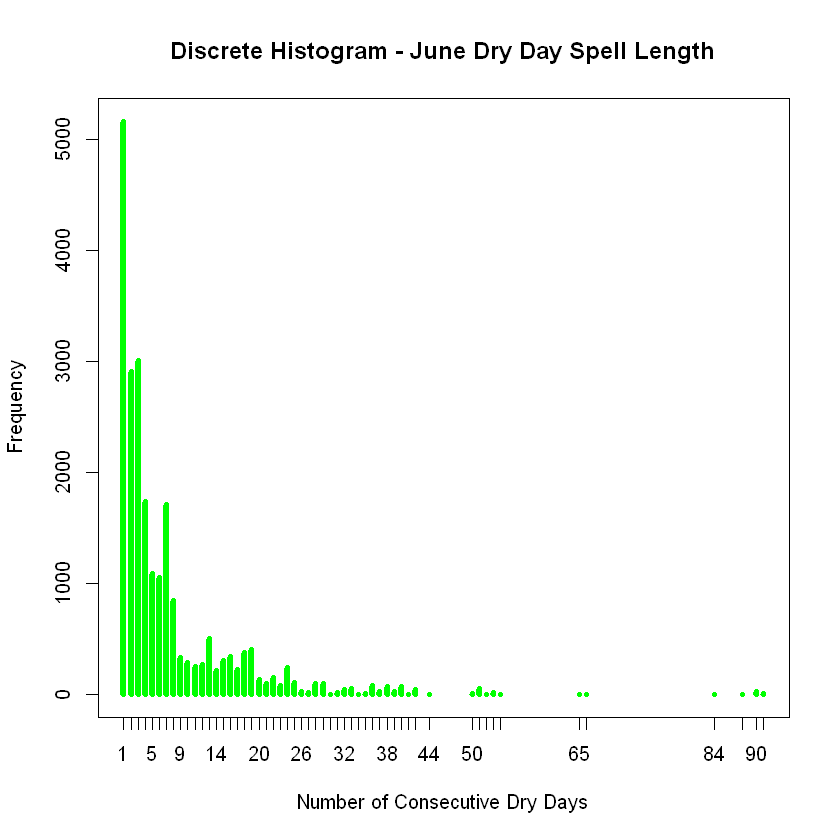

In [64]:
plot( table( dJun$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - June Dry Day Spell Length", 
      col="green" )

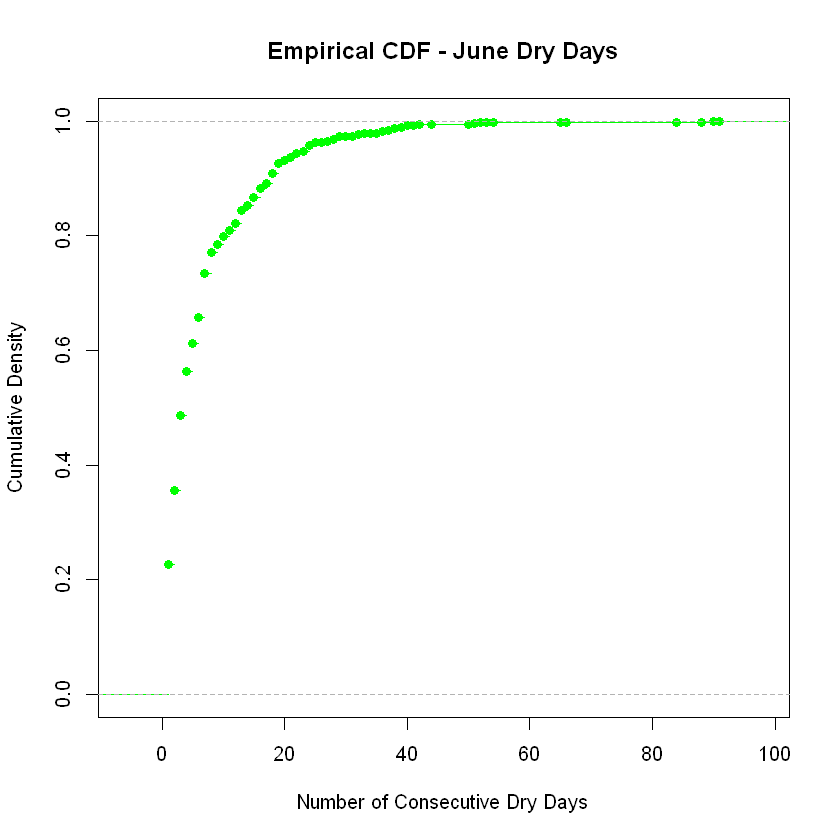

In [65]:
plot(ecdf(dJun$Dry_Count), main="Empirical CDF - June Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

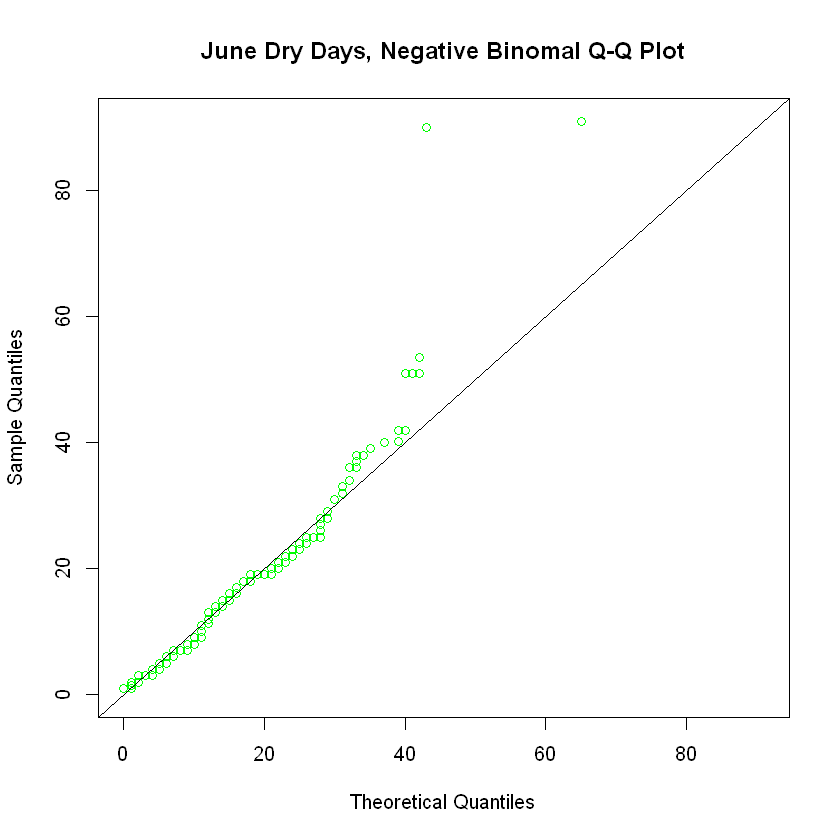

In [66]:
dJunMax <- max( dJun$Dry_Count )
dJunMean <- mean( dJun$Dry_Count )
dJunVar <- var( dJun$Dry_Count )
dJunBNr <- dJunMean^2 / (dJunVar - dJunMean)
dJunTstNB <- rnbinom( 1000, mu=dJunMean, size=dJunBNr )
qqplot( dJunTstNB, dJun$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="June Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dJunMax), ylim=c(0,dJunMax) )
abline( 0, 1)

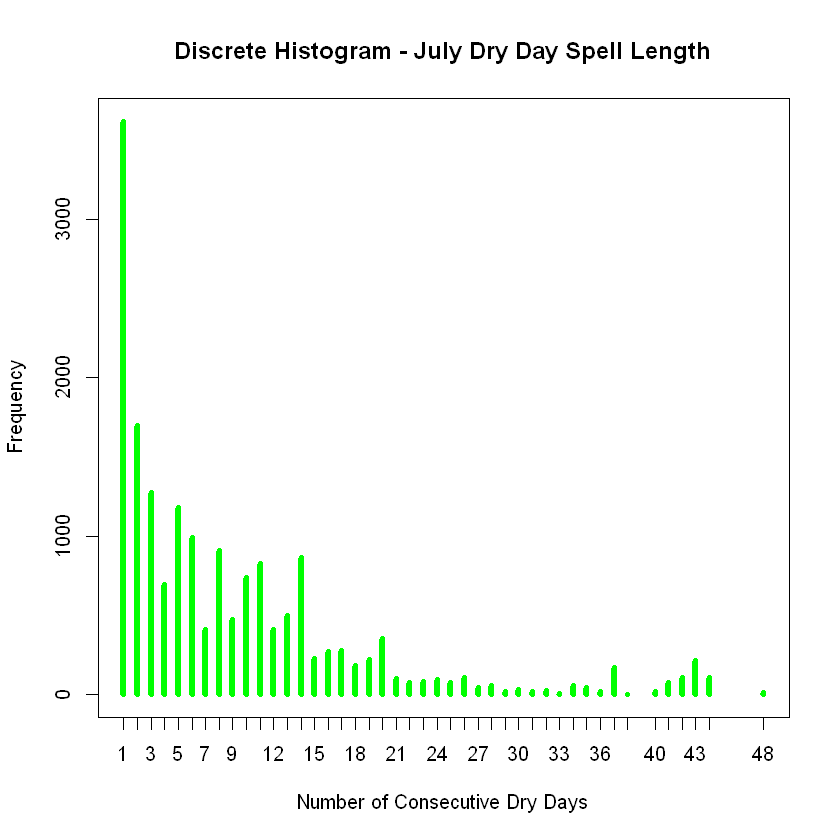

In [67]:
plot( table( dJul$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - July Dry Day Spell Length", 
      col="green" )

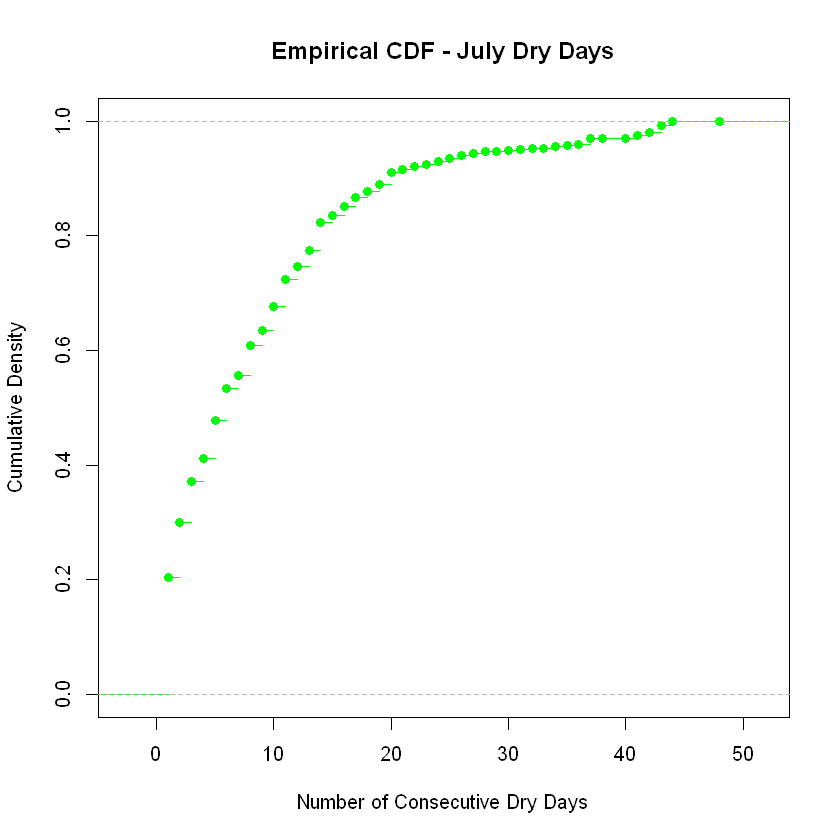

In [68]:
plot(ecdf(dJul$Dry_Count), main="Empirical CDF - July Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

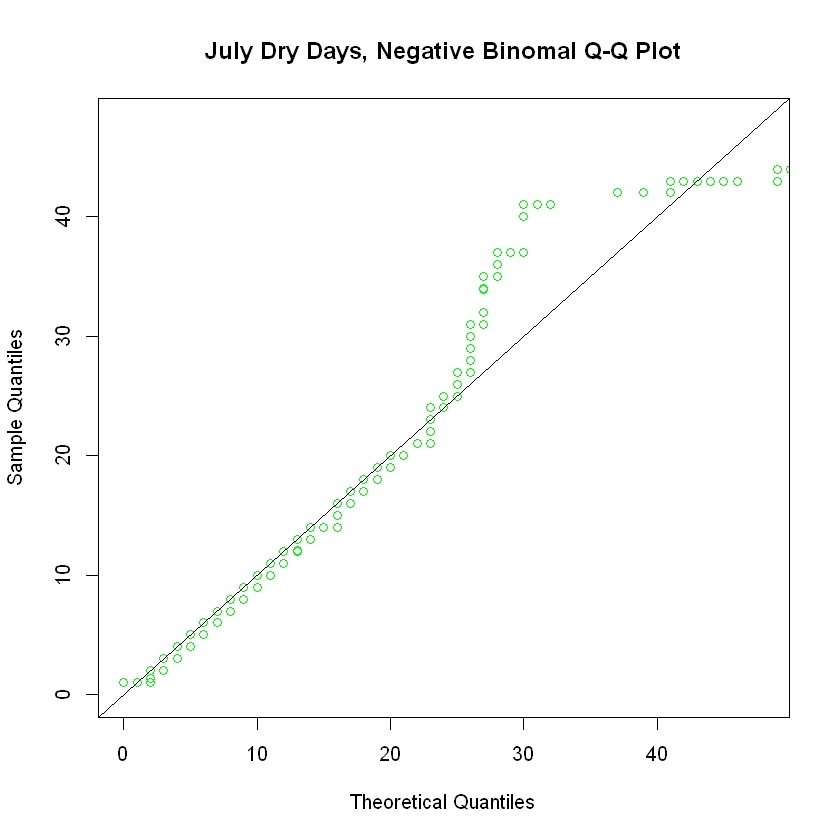

In [69]:
dJulMax <- max( dJul$Dry_Count )
dJulMean <- mean( dJul$Dry_Count )
dJulVar <- var( dJul$Dry_Count )
dJulBNr <- dJulMean^2 / (dJulVar - dJulMean)
dJulTstNB <- rnbinom( 1000, mu=dJulMean, size=dJulBNr )
qqplot( dJulTstNB, dJul$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="July Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dJulMax), ylim=c(0,dJulMax) )
abline( 0, 1)

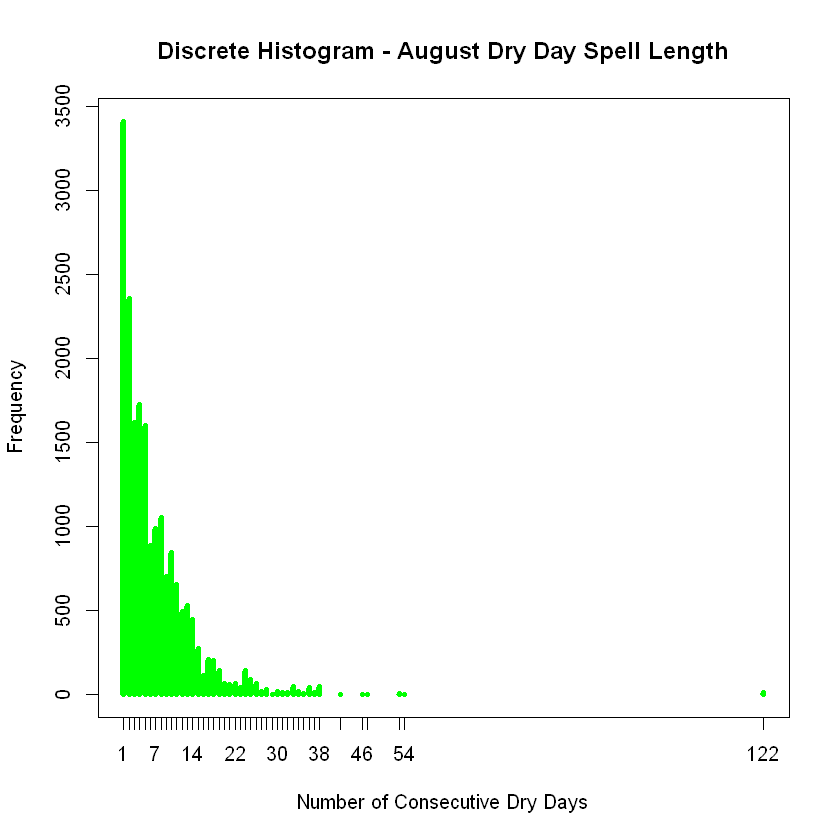

In [70]:
plot( table( dAug$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - August Dry Day Spell Length", 
      col="green" )

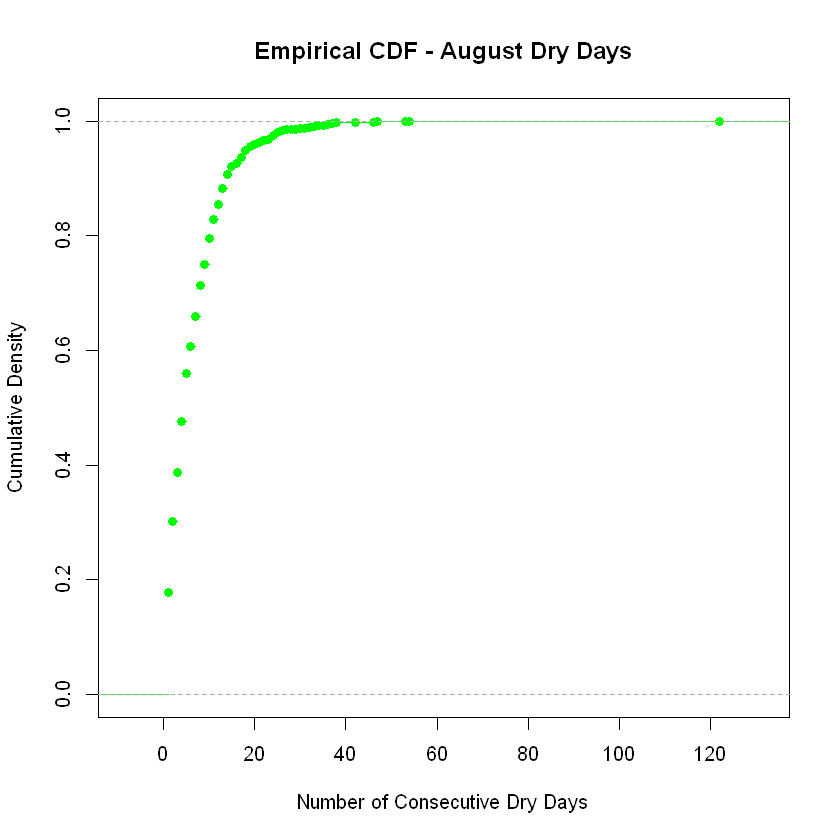

In [71]:
plot(ecdf(dAug$Dry_Count), main="Empirical CDF - August Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

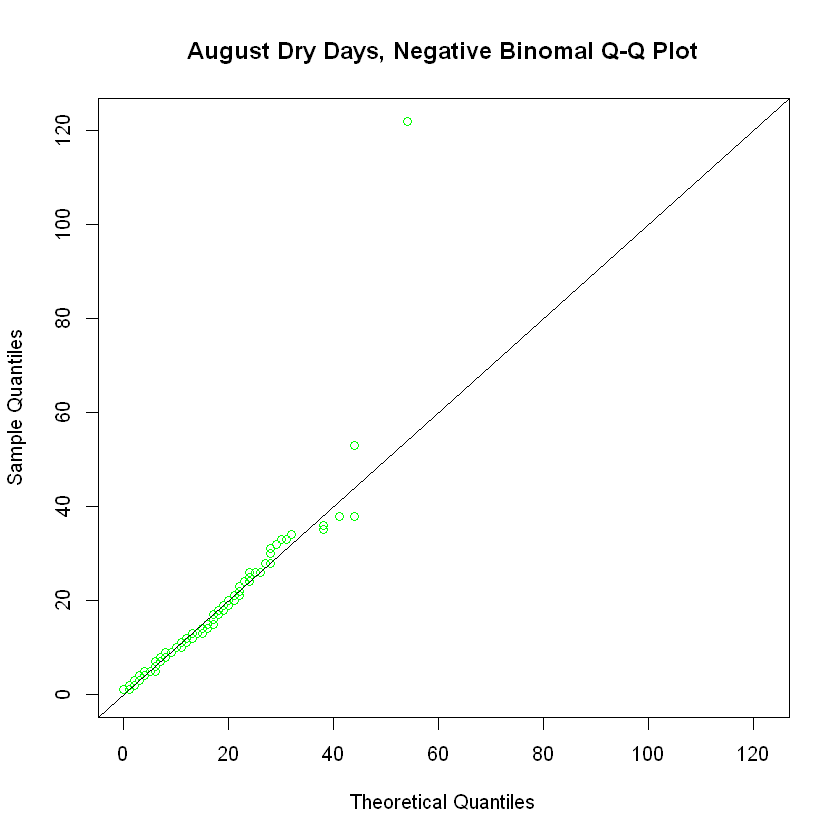

In [72]:
dAugMax <- max( dAug$Dry_Count )
dAugMean <- mean( dAug$Dry_Count )
dAugVar <- var( dAug$Dry_Count )
dAugBNr <- dAugMean^2 / (dAugVar - dAugMean)
dAugTstNB <- rnbinom( 1000, mu=dAugMean, size=dAugBNr )
qqplot( dAugTstNB, dAug$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="August Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dAugMax), ylim=c(0,dAugMax) )
abline( 0, 1)

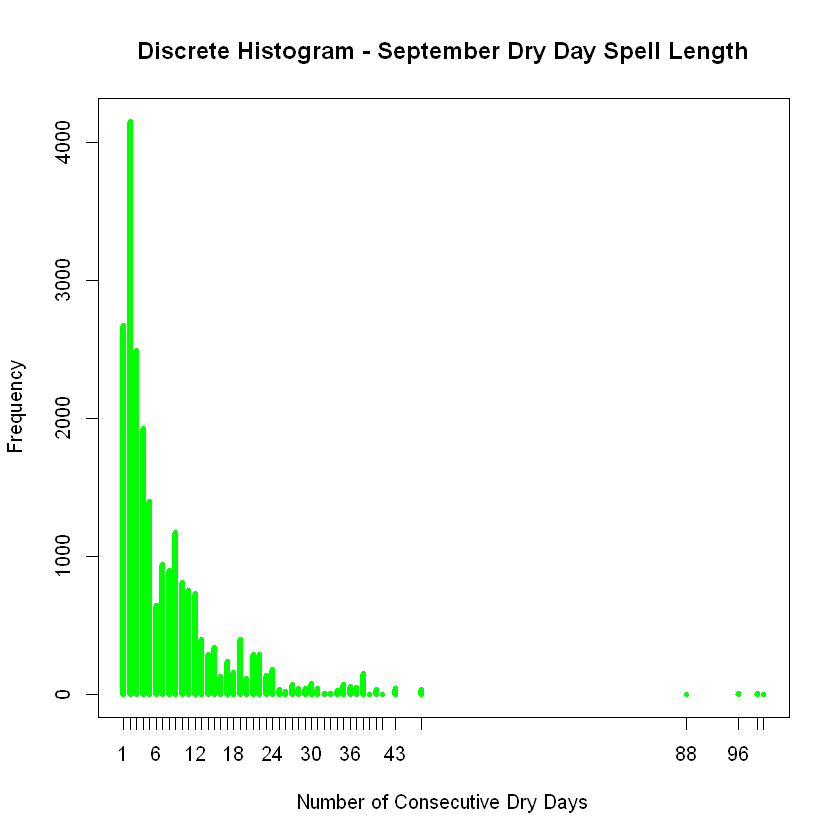

In [73]:
plot( table( dSep$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - September Dry Day Spell Length", 
      col="green" )

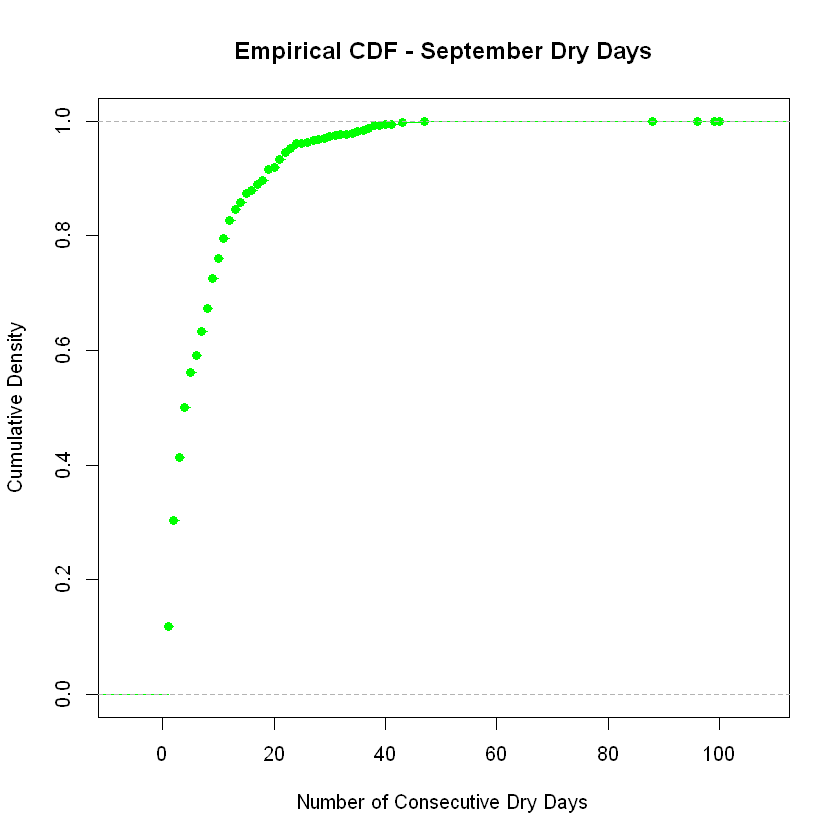

In [74]:
plot(ecdf(dSep$Dry_Count), main="Empirical CDF - September Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

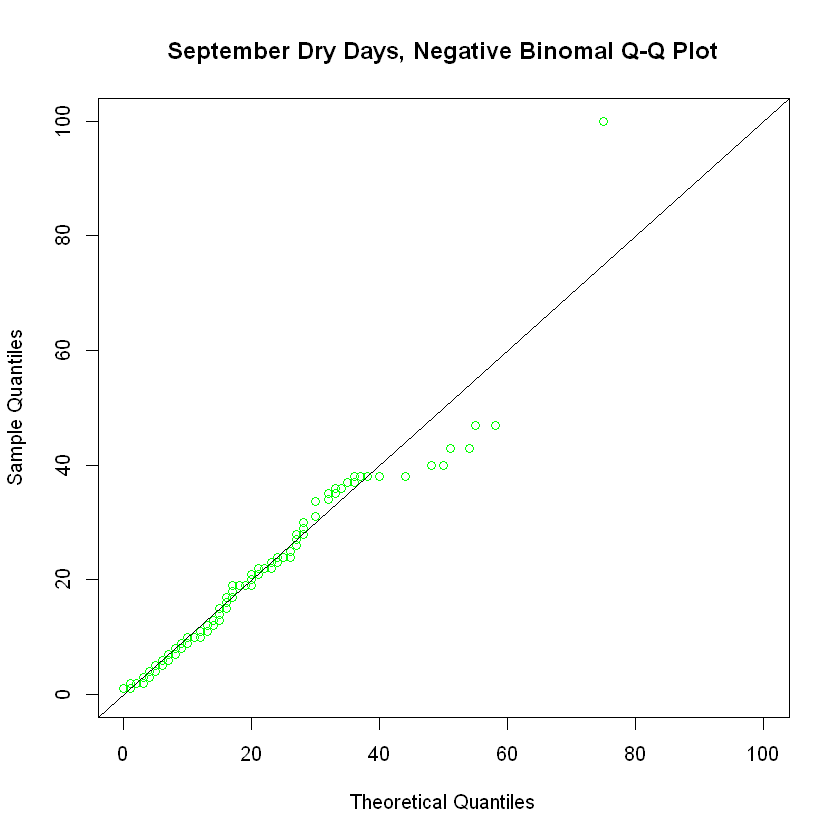

In [75]:
dSepMax <- max( dSep$Dry_Count )
dSepMean <- mean( dSep$Dry_Count )
dSepVar <- var( dSep$Dry_Count )
dSepBNr <- dSepMean^2 / (dSepVar - dSepMean)
dSepTstNB <- rnbinom( 1000, mu=dSepMean, size=dSepBNr )
qqplot( dSepTstNB, dSep$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="September Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dSepMax), ylim=c(0,dSepMax) )
abline( 0, 1)

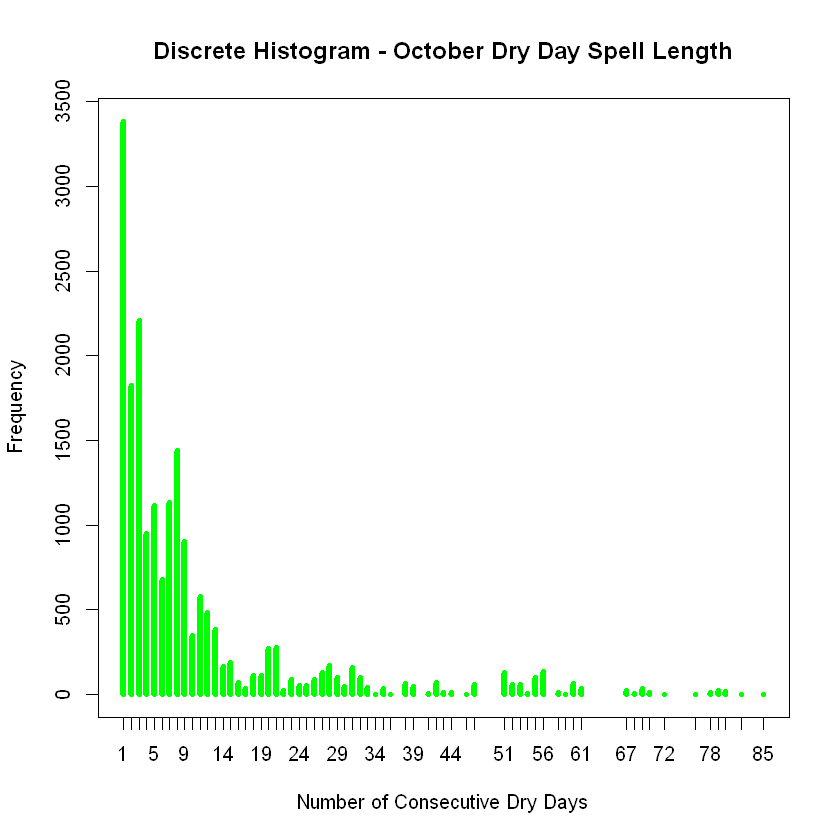

In [76]:
plot( table( dOct$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - October Dry Day Spell Length", 
      col="green" )

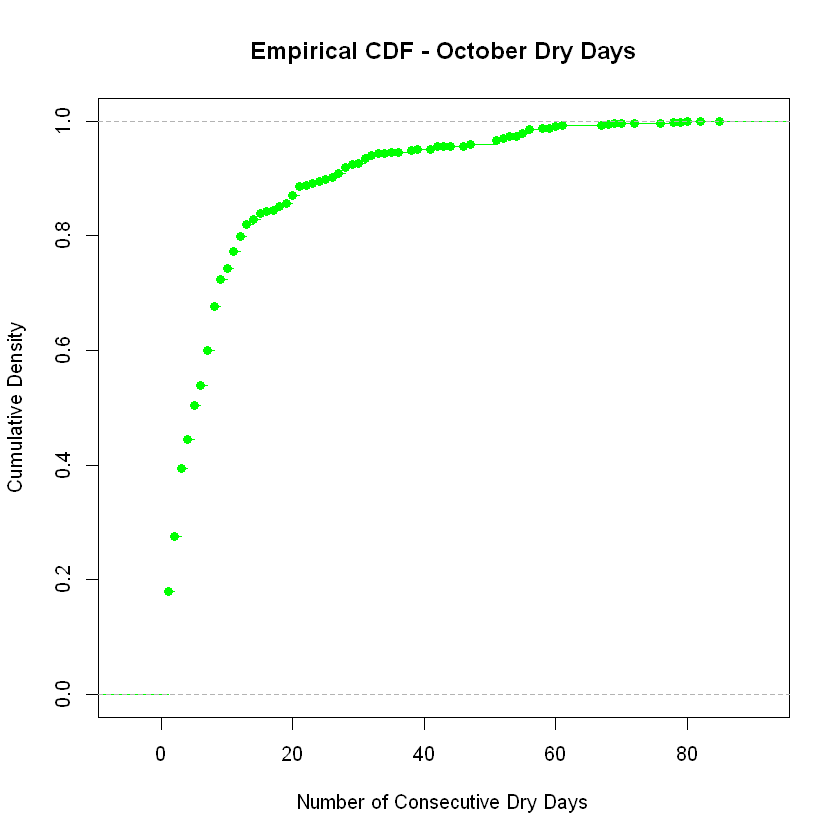

In [77]:
plot(ecdf(dOct$Dry_Count), main="Empirical CDF - October Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

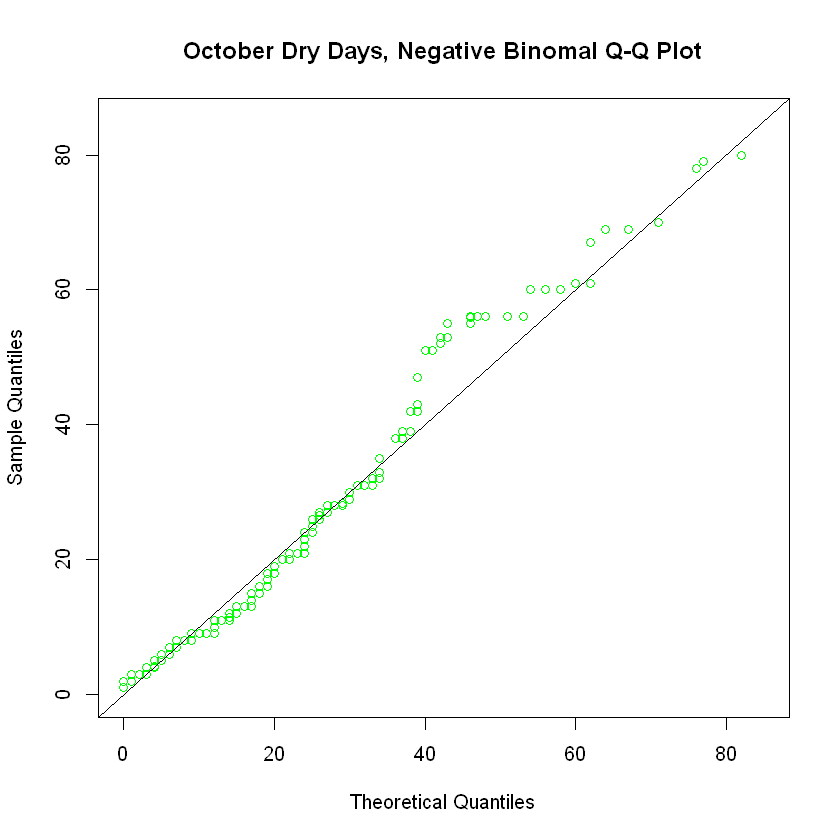

In [78]:
dOctMax <- max( dOct$Dry_Count )
dOctMean <- mean( dOct$Dry_Count )
dOctVar <- var( dOct$Dry_Count )
dOctBNr <- dOctMean^2 / (dOctVar - dOctMean)
dOctTstNB <- rnbinom( 1000, mu=dOctMean, size=dOctBNr )
qqplot( dOctTstNB, dOct$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="October Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dOctMax), ylim=c(0,dOctMax) )
abline( 0, 1)

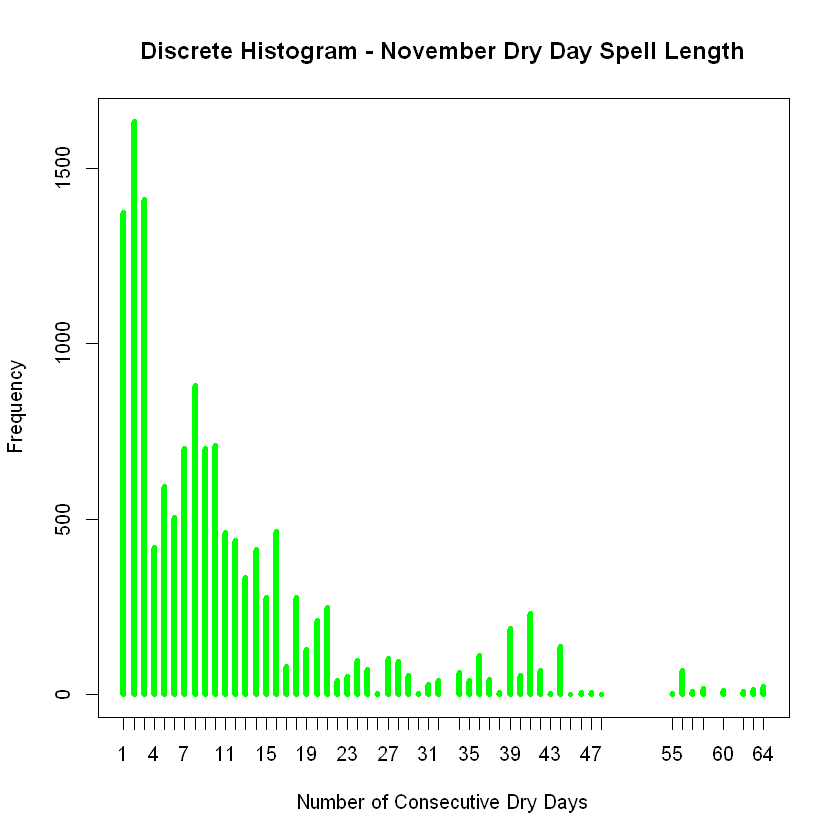

In [79]:
plot( table( dNov$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - November Dry Day Spell Length", 
      col="green" )

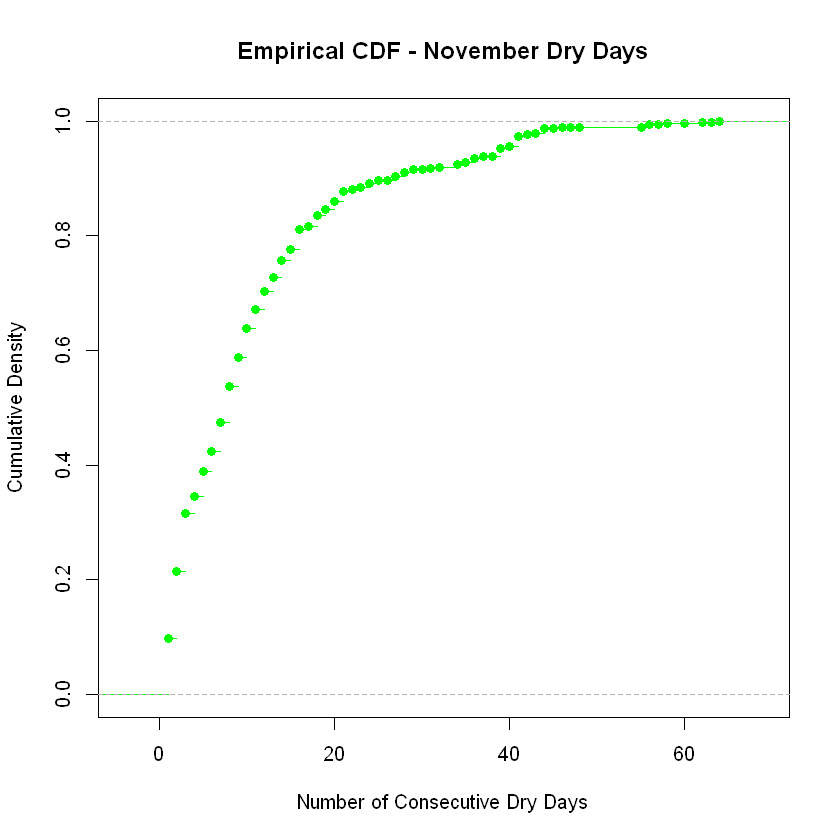

In [80]:
plot(ecdf(dNov$Dry_Count), main="Empirical CDF - November Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

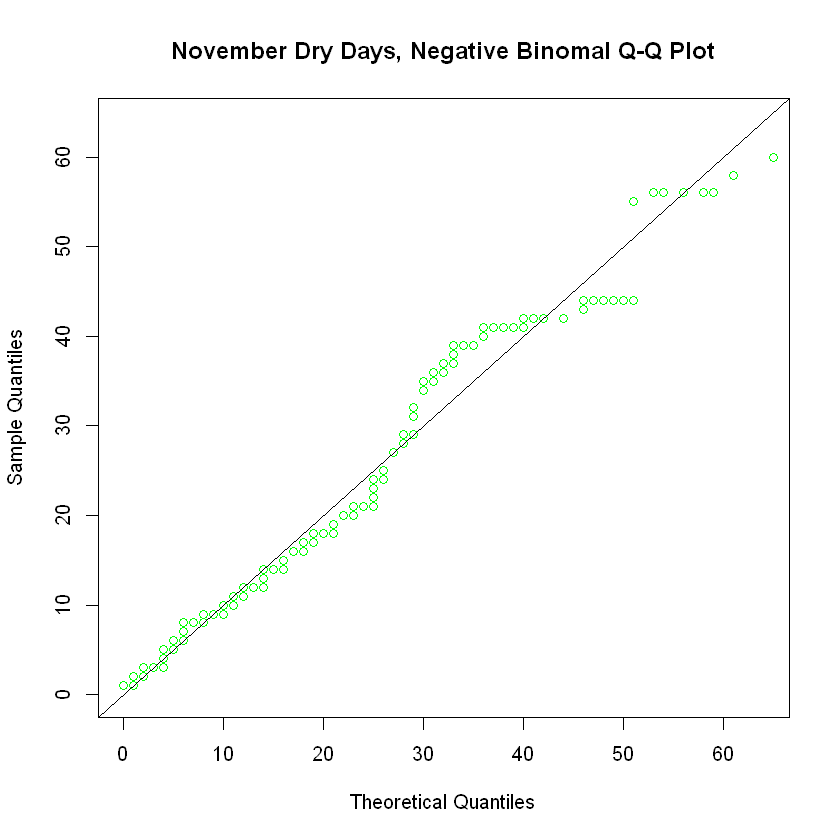

In [81]:
dNovMax <- max( dNov$Dry_Count )
dNovMean <- mean( dNov$Dry_Count )
dNovVar <- var( dNov$Dry_Count )
dNovBNr <- dNovMean^2 / (dNovVar - dNovMean)
dNovTstNB <- rnbinom( 1000, mu=dNovMean, size=dNovBNr )
qqplot( dNovTstNB, dNov$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="November Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dNovMax), ylim=c(0,dNovMax) )
abline( 0, 1)

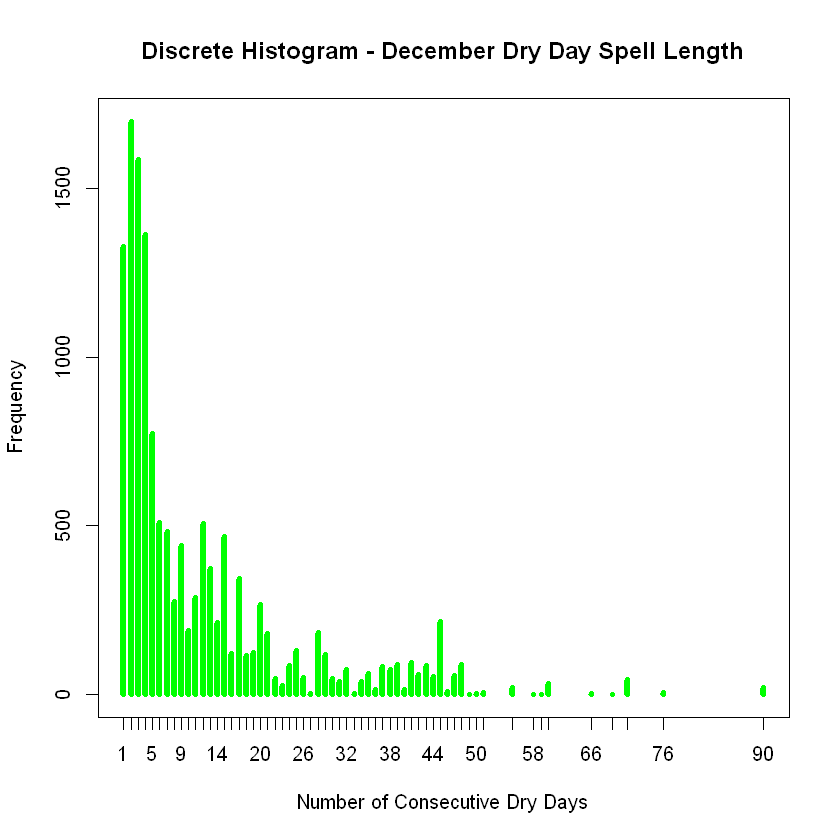

In [82]:
plot( table( dDec$Dry_Count ), type="h", lwd=5, ylab="Frequency", 
      xlab="Number of Consecutive Dry Days", 
      main="Discrete Histogram - December Dry Day Spell Length", 
      col="green" )

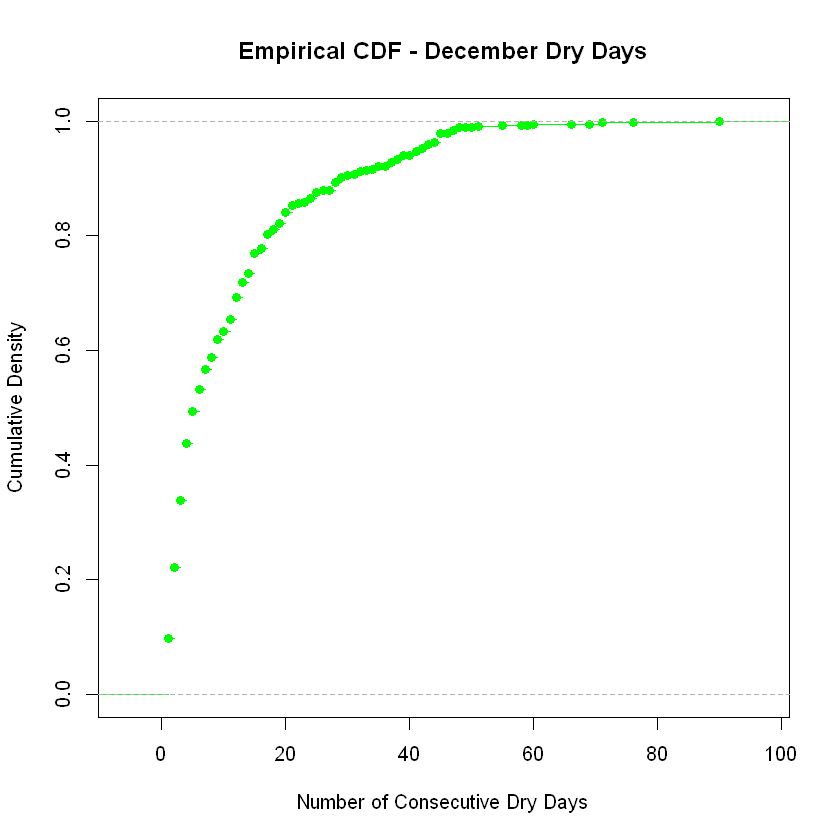

In [83]:
plot(ecdf(dDec$Dry_Count), main="Empirical CDF - December Dry Days", 
     ylab="Cumulative Density", xlab="Number of Consecutive Dry Days", col="green" )

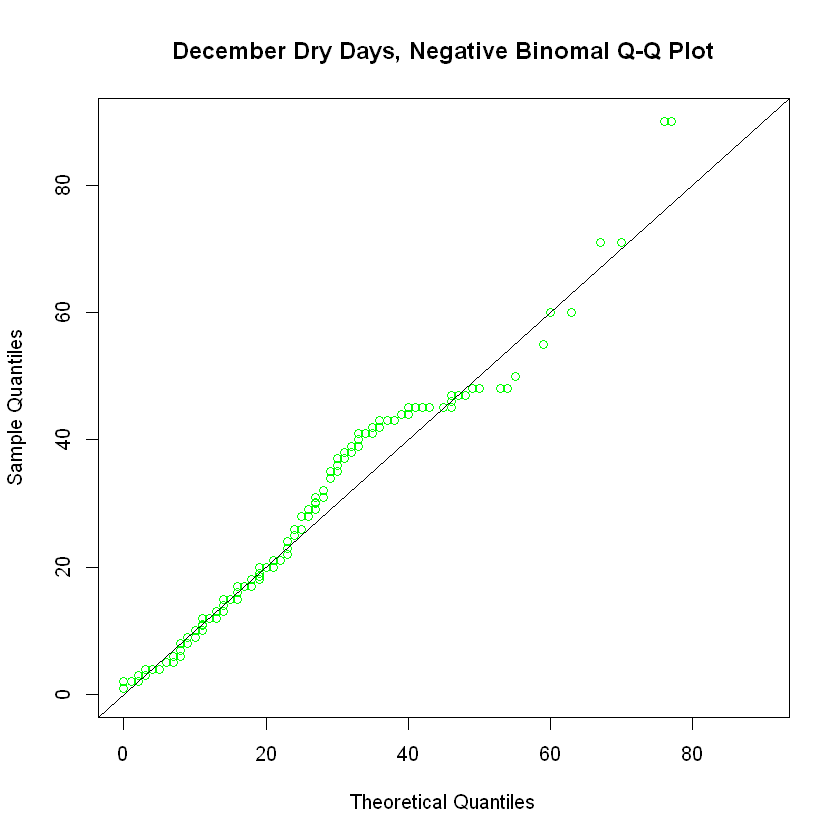

In [84]:
dDecMax <- max( dDec$Dry_Count )
dDecMean <- mean( dDec$Dry_Count )
dDecVar <- var( dDec$Dry_Count )
dDecBNr <- dDecMean^2 / (dDecVar - dDecMean)
dDecTstNB <- rnbinom( 1000, mu=dDecMean, size=dDecBNr )
qqplot( dDecTstNB, dDec$Dry_Count, col="green", xlab="Theoretical Quantiles",
        ylab="Sample Quantiles", main="December Dry Days, Negative Binomal Q-Q Plot",
        xlim=c(0,dDecMax), ylim=c(0,dDecMax) )
abline( 0, 1)

In [85]:
cat("Jan scale: ", dJanBNr, "\n", "Feb scale: ", dFebBNr, "\n",
    "Mar scale: ", dMarBNr, "\n", "Apr scale: ", dAprBNr, "\n",
    "May scale: ", dMayBNr, "\n", "Jun scale: ", dJunBNr, "\n",
    "Jul scale: ", dJulBNr, "\n", "Aug scale: ", dAugBNr, "\n",
    "Sep scale: ", dSepBNr, "\n", "Oct scale: ", dOctBNr, "\n",
    "Nov scale: ", dNovBNr, "\n", "Dec scale: ", dDecBNr, "\n" )

Jan scale:  1.1728 
 Feb scale:  1.082622 
 Mar scale:  1.243559 
 Apr scale:  1.381129 
 May scale:  1.216465 
 Jun scale:  0.7032468 
 Jul scale:  0.9982905 
 Aug scale:  1.072274 
 Sep scale:  0.9718089 
 Oct scale:  0.6089743 
 Nov scale:  1.031087 
 Dec scale:  0.8255455 


### Fitting Negative Binomial Distributions

Use the **fitdistrplus** package for distribution fitting. This also provides the *plotdist* function which provides a pair of plots: 

1. empirical density, or a histogram
2. empirical cumulative distribution

These plots were provided above from scratch. **fitdistrplus** also provides a *descdist* function that provides classical descriptive statistics for the sample.

Distributions are then fit using a Maximum Likelihood Estimation (MLE) estimator in the *fitdist* function. Then goodness-of-fit statistics are calculated using the *gofstat* function.

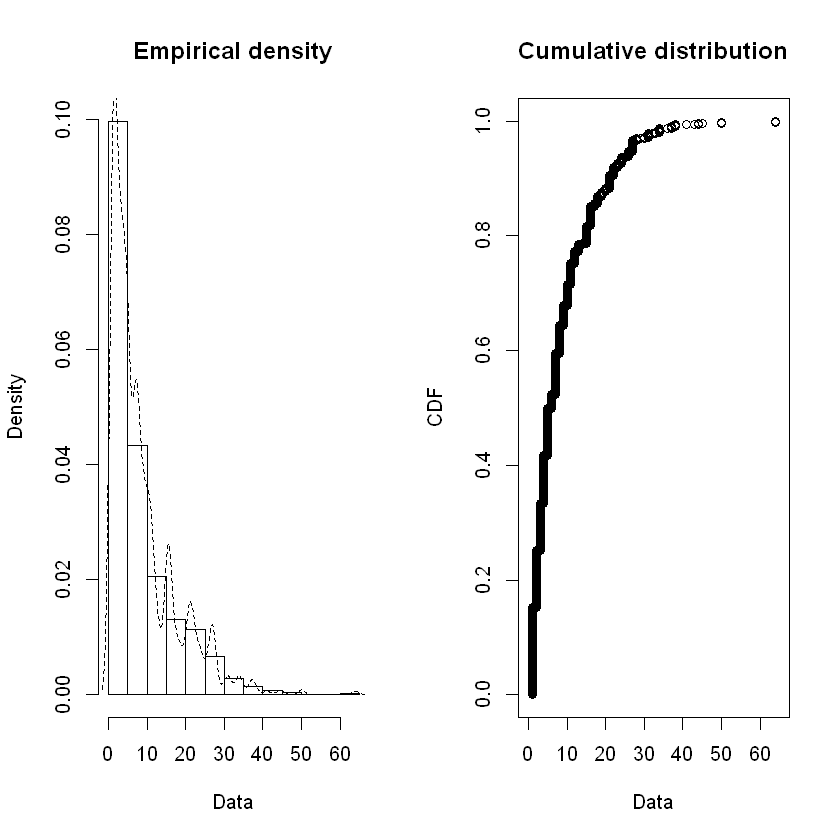

In [86]:
plotdist( dJan$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  64 
median:  6 
mean:  8.667023 
estimated sd:  8.527399 
estimated skewness:  1.816915 
estimated kurtosis:  7.399875 

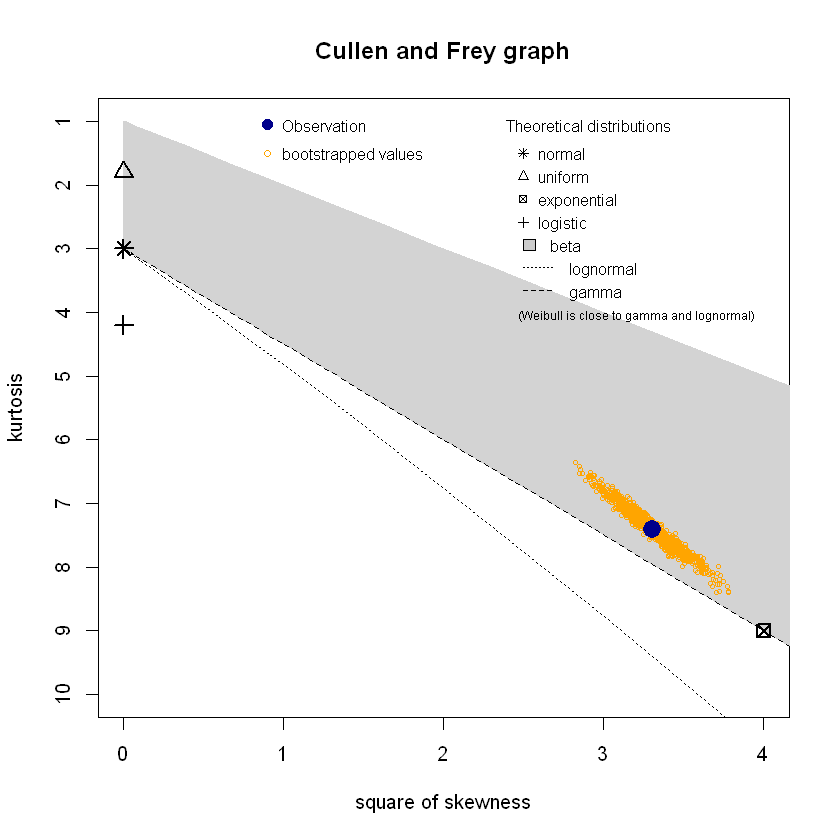

In [87]:
descdist( dJan$Dry_Count, boot=1000 )

In [88]:
fd_NB_dJan <- fitdist( dJan$Dry_Count, "nbinom" )
fd_GE_dJan <- fitdist( dJan$Dry_Count, "geom" )

In [89]:
summary( fd_NB_dJan )

Fitting of the distribution ' nbinom ' by maximum likelihood 
Parameters : 
     estimate Std. Error
size 1.383612 0.01670359
mu   8.667270 0.06113811
Loglikelihood:  -53803.69   AIC:  107611.4   BIC:  107626.8 
Correlation matrix:
              size            mu
size  1.000000e+00 -4.205048e-05
mu   -4.205048e-05  1.000000e+00


In [90]:
fdNB_dJan_size <- fd_NB_dJan$estimate[["size"]]
fdNB_dJan_mu <- fd_NB_dJan$estimate[["mu"]]
cat("Jan size: ", fdNB_dJan_size, "\n", "Jan mu: ", fdNB_dJan_mu, "\n")

Jan size:  1.383612 
 Jan mu:  8.66727 


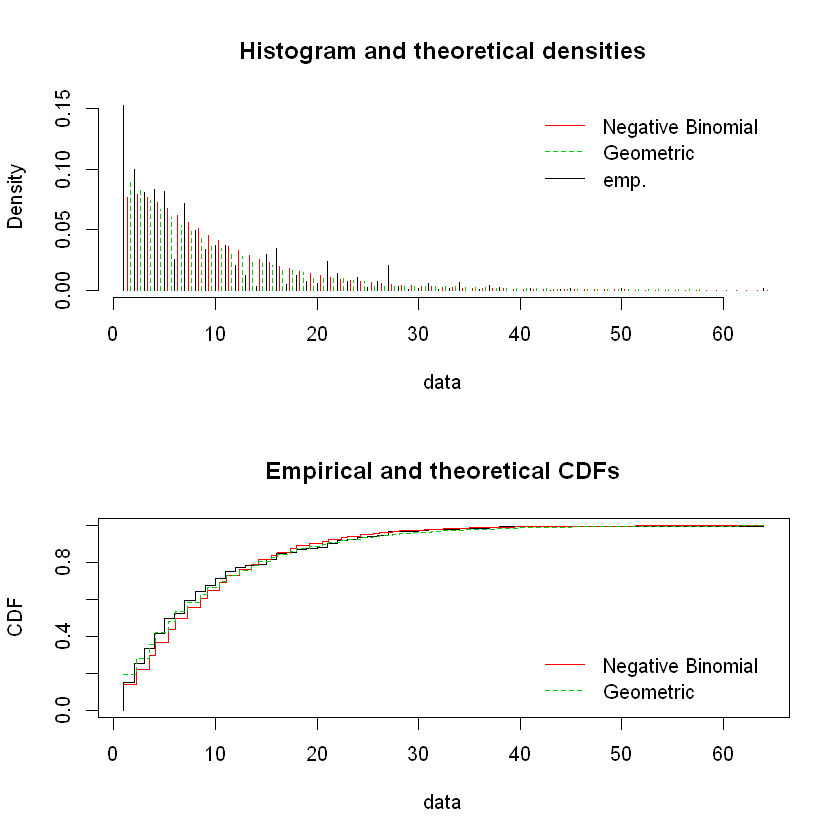

In [91]:
par(mfrow=c(2,1))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dJan, fd_GE_dJan), legendtext=plot.legend )
cdfcomp( list(fd_NB_dJan, fd_GE_dJan), legendtext=plot.legend )

In [92]:
statRes <- gofstat( list(fd_NB_dJan, fd_GE_dJan), fitnames=c("Negative Binomial", "Geometric") )

In [93]:
print(statRes)

Chi-squared statistic:  2047.646 2158.61 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       2570              2376.7593      3304.7897
<= 2       1678              1328.9069      1400.6598
<= 3       1357              1292.5045      1255.7693
<= 4       1410              1221.4687      1125.8669
<= 5       1381              1134.1337      1009.4022
<= 6        425              1040.5373       904.9851
<= 7       1203               946.4695       811.3694
<= 8        828               855.3148       727.4378
<= 9        570               769.0094       652.1884
<= 10       620               688.5861       584.7231
<= 11       627               614.5027       524.2367
<= 12       348               546.8498       470.0073
<= 13       199               485.4854       421.3877
<= 15       553               810.5236       716.5138
<= 16       586               335.8979     

In [94]:
fdNB_dJan_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

[Chi-Squared Test](https://www.r-bloggers.com/chi-squared-test/)

Like all statistical tests, chi-squared test assumes a null hypothesis and an alternate hypothesis. The general practice is, if the p-value that comes out in the result is less than a pre-determined significance level, which is 0.05 usually, then we reject the null hypothesis.

- H0: The The two variables are independent
- H1: The two variables are related.

The null hypothesis of the chi-squared test is that the two variables are independent and the alternate hypothesis is that they are related.

In this case our p-value is 0.0 and we can reject the null hypothesis that sample and MLE-fit distribution are not related.

In [95]:
fdNB_dJan_p = fdNB_dJan_size / (fdNB_dJan_size + fdNB_dJan_mu)
cat("prob: ", fdNB_dJan_p)

prob:  0.1376608

In [96]:
# add to our tracking dataframe
MonDistDF[1, ] <- list( 1, dJanMean, dJanBNr, fdNB_dJan_p, fdNB_dJan_mu, fdNB_dJan_size,
                        fdNB_dJan_pvalue )

In [97]:
gf_dJan <- goodfit( dJan$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dJan_size, prob=fdNB_dJan_p) )

In [99]:
summary( gf_dJan )

Warning message in summary.goodfit(gf_dJan, main = "Counts vs Negative Binomial Distribution"):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          6299.467 64        0
Likelihood Ratio 6950.328 42        0


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

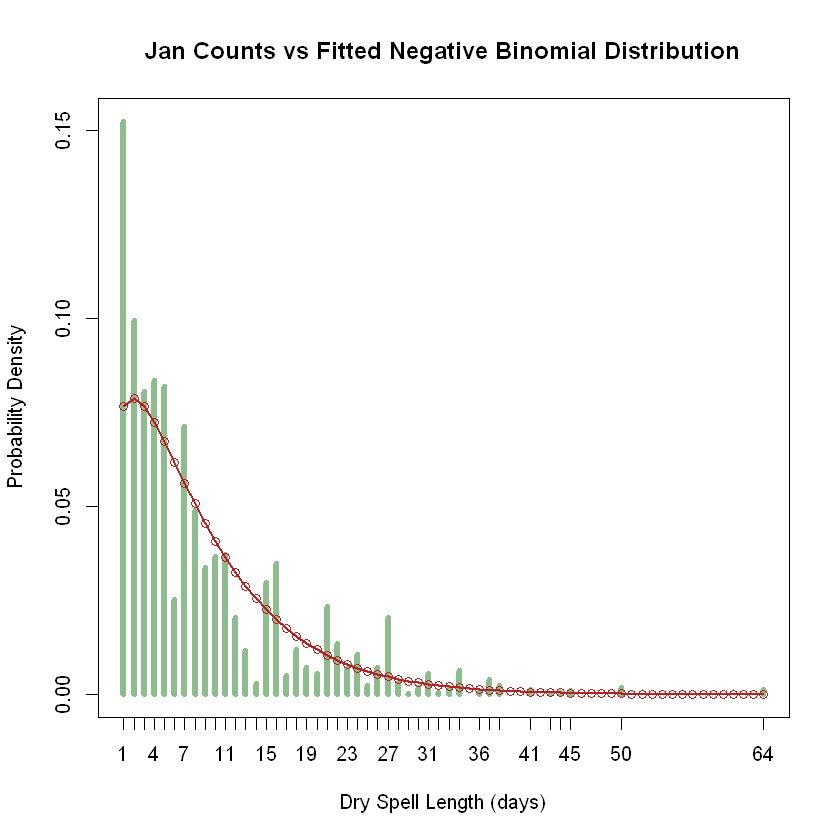

In [127]:
maxP <- max(dJan$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dJan_size, mu=fdNB_dJan_mu )
ttab <- table( dJan$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Jan Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

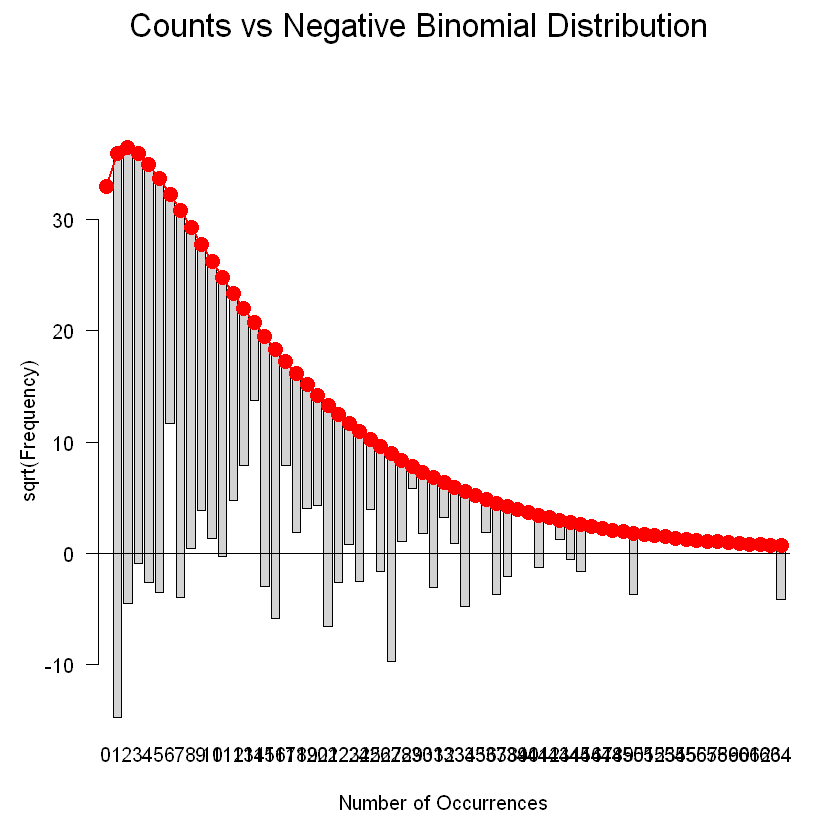

In [128]:
plot( gf_dJan, main="Counts vs Negative Binomial Distribution" )

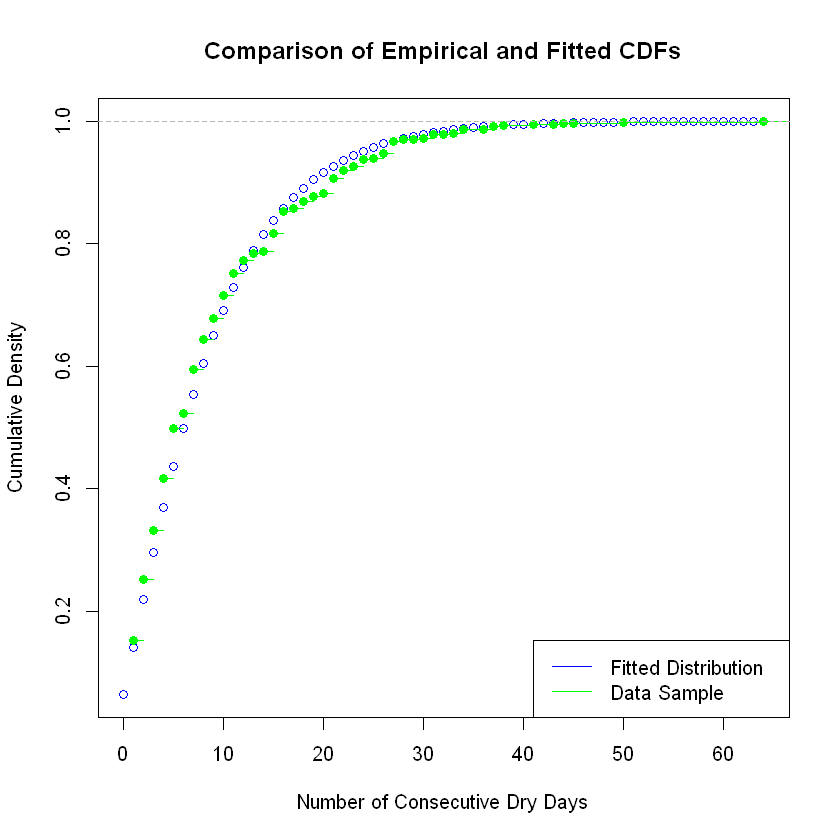

In [129]:
x <- seq(0,dJanMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dJan_mu, size=fdNB_dJan_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dJan$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

In [130]:
ks.test( dJan$Dry_Count, "pnbinom", mu=fdNB_dJan_mu, size=fdNB_dJan_size )

Warning message in ks.test(dJan$Dry_Count, "pnbinom", mu = fdNB_dJan_mu, size = fdNB_dJan_size):
"default ks.test() cannot compute correct p-values with ties;
 see help page for one-sample Kolmogorov test for discrete distributions."


	One-sample Kolmogorov-Smirnov test

data:  dJan$Dry_Count
D = 0.1411, p-value < 2.2e-16
alternative hypothesis: two-sided


Generally, K-S test is better for continuous distributions.

[Kolmogorv-Smirnov Test](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/ks.test.html)

Null hypothesis that the true distribution function of x is equal to the hypothesized distribution function (one-sample case). This is a comparison of cumulative distribution functions, and the test statistic is the maximum difference in value, with the statistic in the "greater" alternative being D^+ = max[F_x(u) - F_y(u)]

Exact p-values are not available for the two-sample case if one-sided or in the presence of ties. If exact = NULL (the default), an exact p-value is computed if the sample size is less than 100 in the one-sample case and there are no ties, and if the product of the sample sizes is less than 10000 in the two-sample case. Otherwise, asymptotic distributions are used whose approximations may be inaccurate in small samples.

The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. The null distribution of this statistic is calculated under the null hypothesis that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case). In the one-sample case, the distribution considered under the null hypothesis may be continuous (see Section 2), purely discrete or mixed (see Section 2.2).

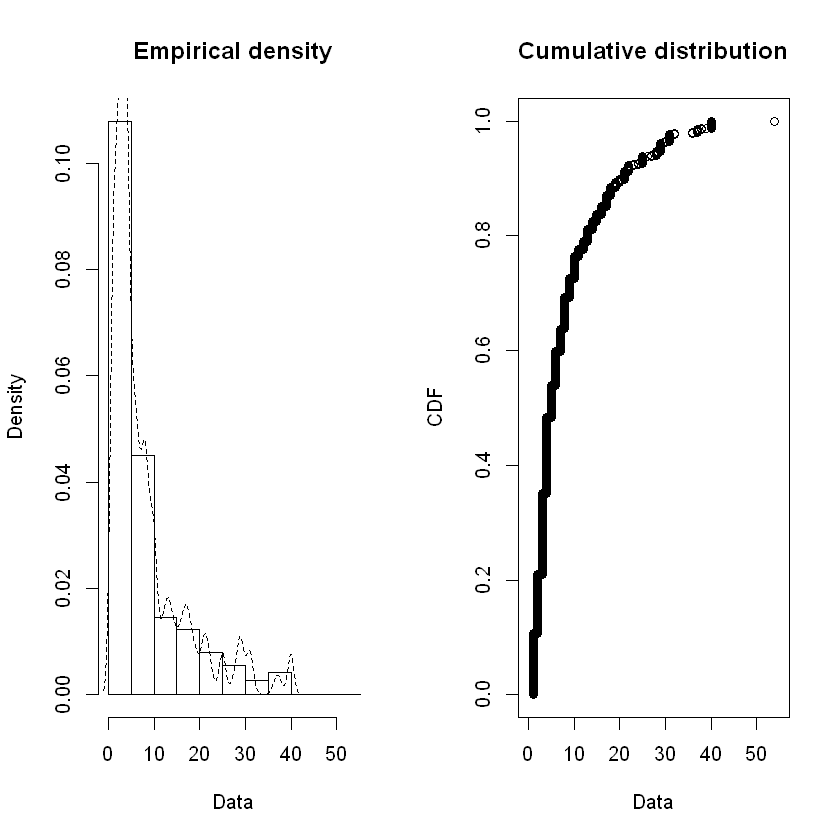

In [131]:
plotdist( dFeb$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  54 
median:  5 
mean:  8.246318 
estimated sd:  8.429615 
estimated skewness:  1.845535 
estimated kurtosis:  6.138759 

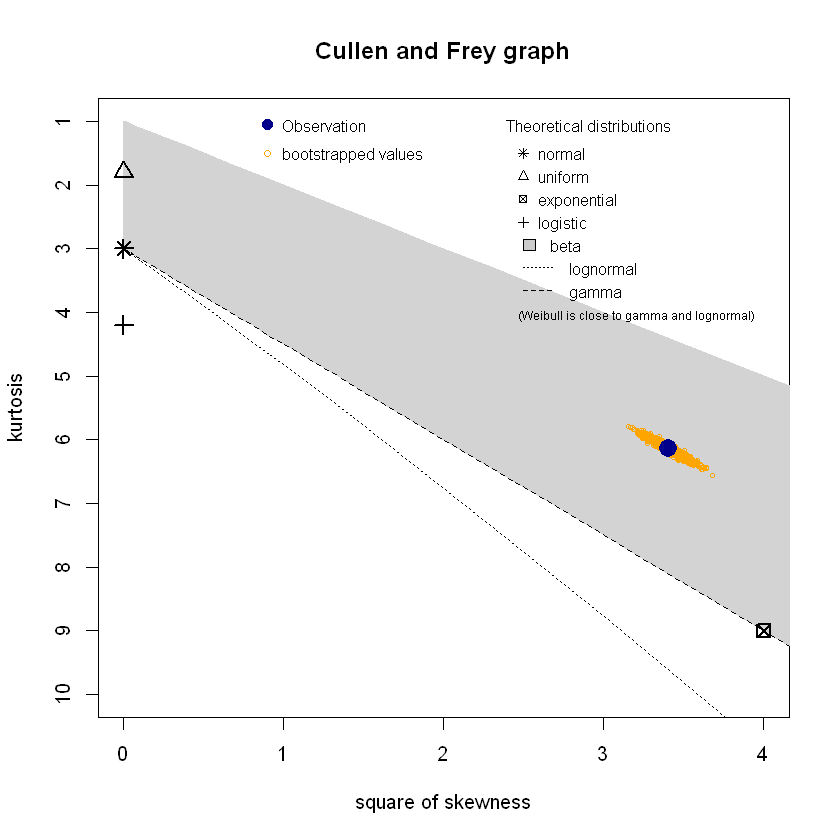

In [132]:
descdist( dFeb$Dry_Count, boot=1000 )

In [133]:
fd_NB_dFeb <- fitdist( dFeb$Dry_Count, "nbinom" )
fd_GE_dFeb <- fitdist( dFeb$Dry_Count, "geom" )

In [134]:
fdNB_dFeb_size <- fd_NB_dFeb$estimate[["size"]]
fdNB_dFeb_mu <- fd_NB_dFeb$estimate[["mu"]]
cat("Feb size: ", fdNB_dFeb_size, "\n", "Feb mu: ", fdNB_dFeb_mu, "\n")

Feb size:  1.447199 
 Feb mu:  8.248172 


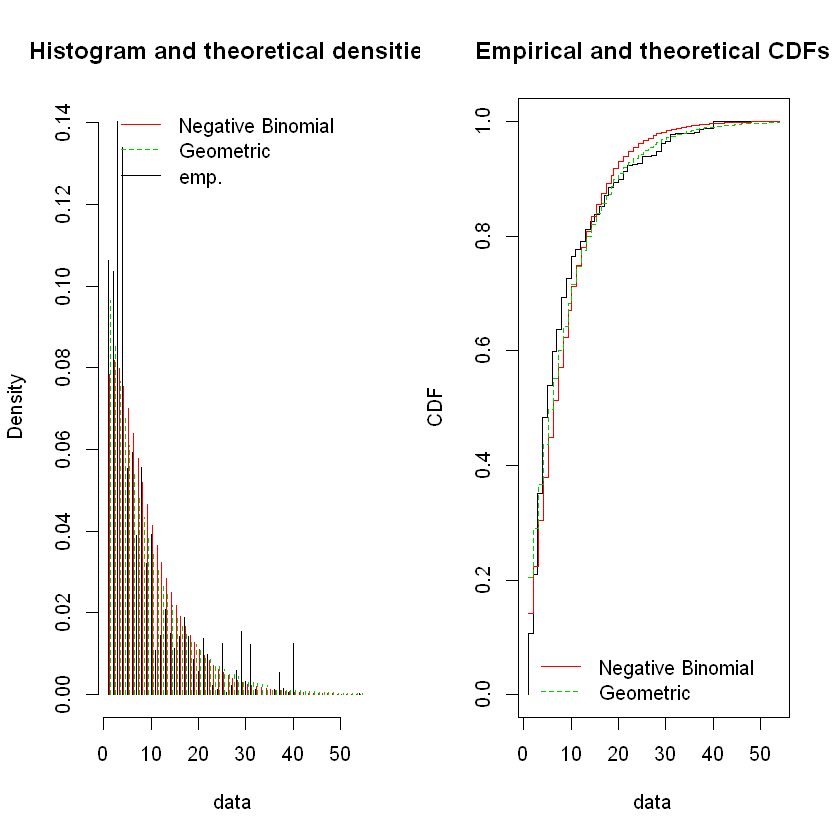

In [135]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dFeb, fd_GE_dFeb), legendtext=plot.legend )
cdfcomp( list(fd_NB_dFeb, fd_GE_dFeb), legendtext=plot.legend )

In [136]:
statRes <- gofstat( list(fd_NB_dFeb, fd_GE_dFeb), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [137]:
print(statRes)

Chi-squared statistic:  3548.669 3866.543 
Degree of freedom of the Chi-squared distribution:  21 22 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       1781             2385.91388      3431.4412
<= 2       1736             1370.48503      1442.6887
<= 3       2354             1339.71582      1286.6603
<= 4       2248             1267.16318      1147.5065
<= 5        930             1174.43521      1023.4023
<= 6        995             1073.59918       912.7202
<= 7        652              971.69590       814.0084
<= 8        934              872.86362       725.9725
<= 9        539              779.47147       647.4577
<= 10       657              692.77686       577.4344
<= 12       423             1154.55235       974.2723
<= 13       348              476.27592       409.6155
<= 14       251              418.12633       365.3151
<= 16       427              686.66871       616.3755
<= 17       317              279.70137    

In [138]:
fdNB_dFeb_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [139]:
fdNB_dFeb_p = fdNB_dFeb_size / (fdNB_dFeb_size + fdNB_dFeb_mu)
cat("prob: ", fdNB_dFeb_p)

prob:  0.149267

In [140]:
MonDistDF[2, ] <- list( 2, dFebMean, dFebBNr, fdNB_dFeb_p, fdNB_dFeb_mu, 
                        fdNB_dFeb_size, fdNB_dFeb_pvalue )

In [141]:
gf_dFeb <- goodfit( dFeb$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dFeb_size, prob=fdNB_dFeb_p) )

In [142]:
summary( gf_dFeb )

Warning message in summary.goodfit(gf_dFeb):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          10419.456 54        0
Likelihood Ratio  7433.852 37        0


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

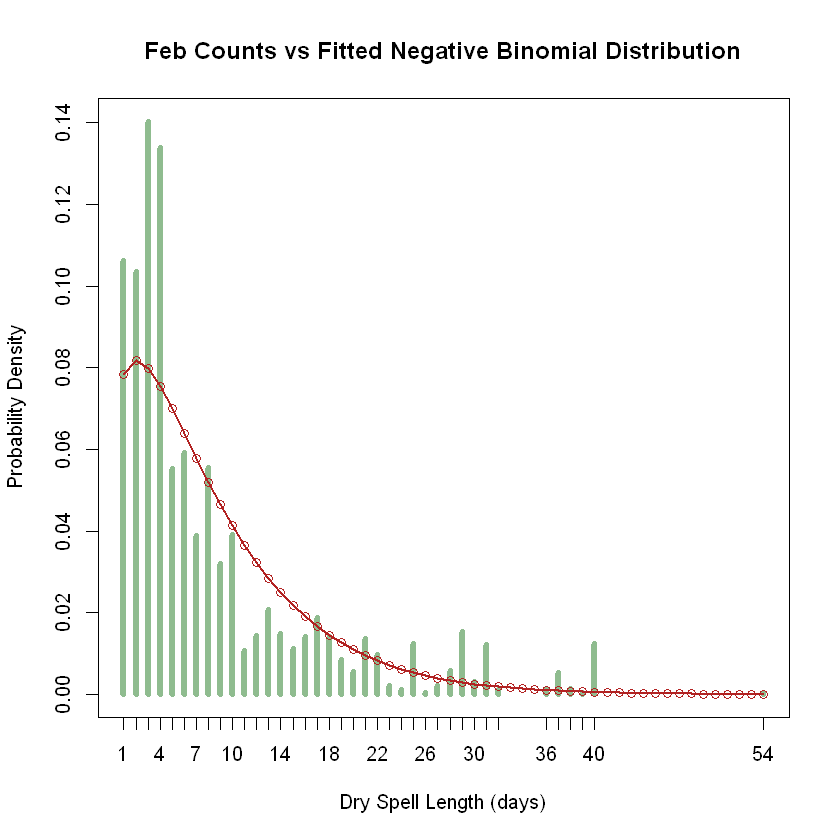

In [143]:
maxP <- max(dFeb$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dFeb_size, mu=fdNB_dFeb_mu )
ttab <- table( dFeb$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Feb Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

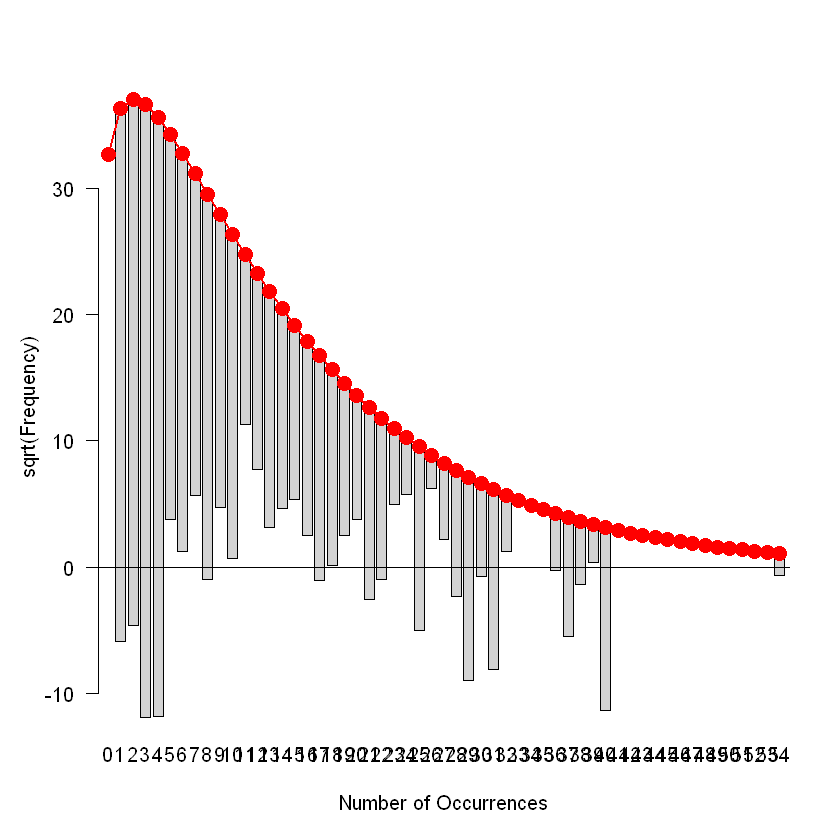

In [144]:
plot( gf_dFeb )

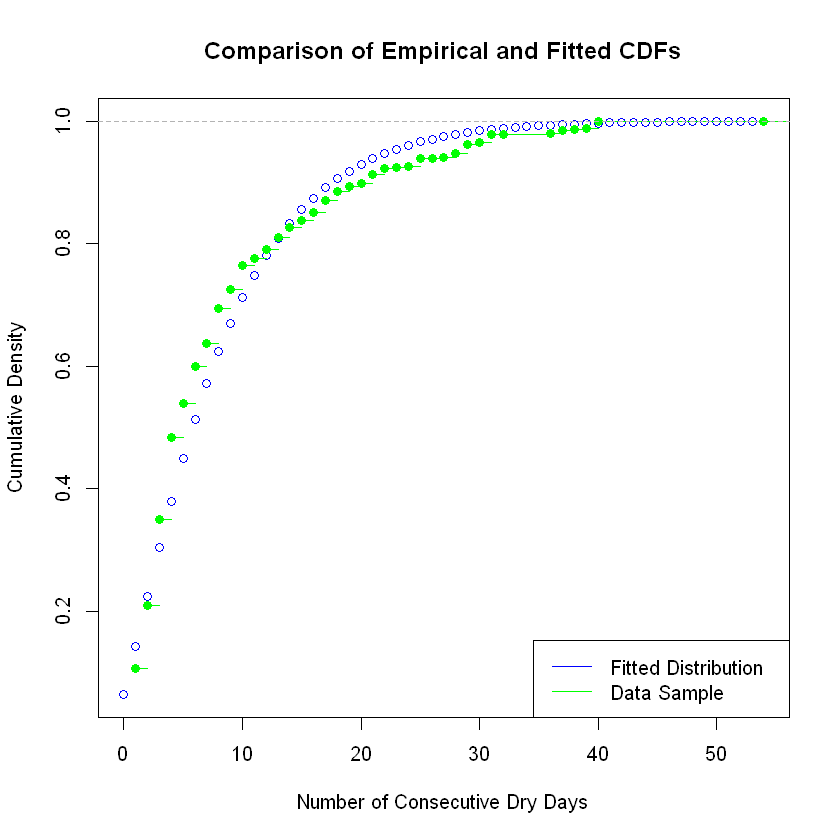

In [145]:
x <- seq(0,dFebMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dFeb_mu, size=fdNB_dFeb_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dFeb$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

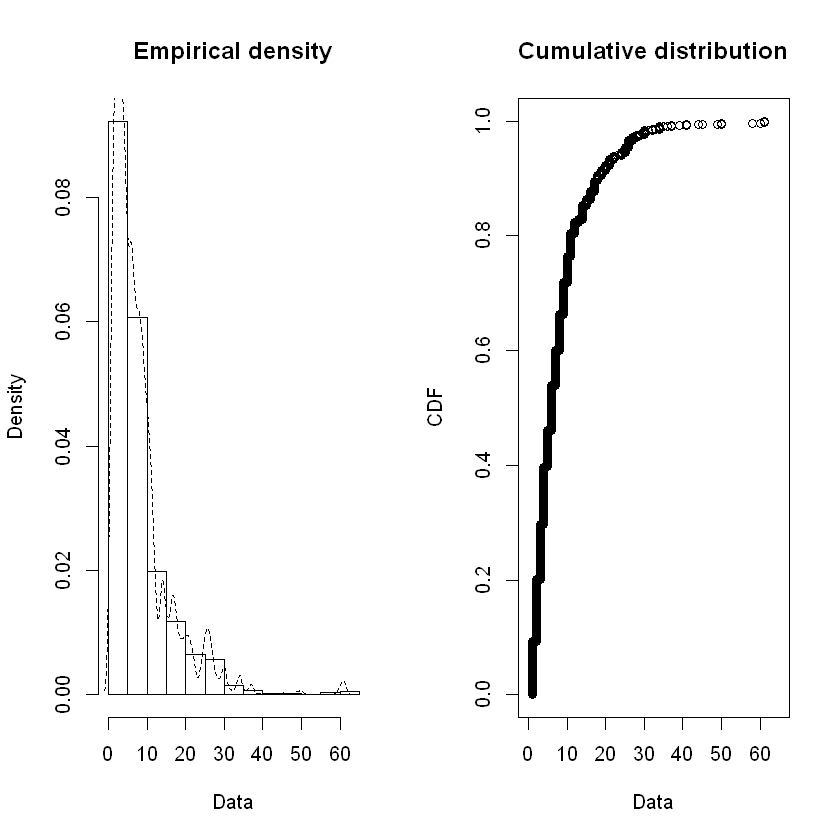

In [146]:
plotdist( dMar$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  61 
median:  6 
mean:  8.187301 
estimated sd:  7.879757 
estimated skewness:  2.547214 
estimated kurtosis:  13.04627 

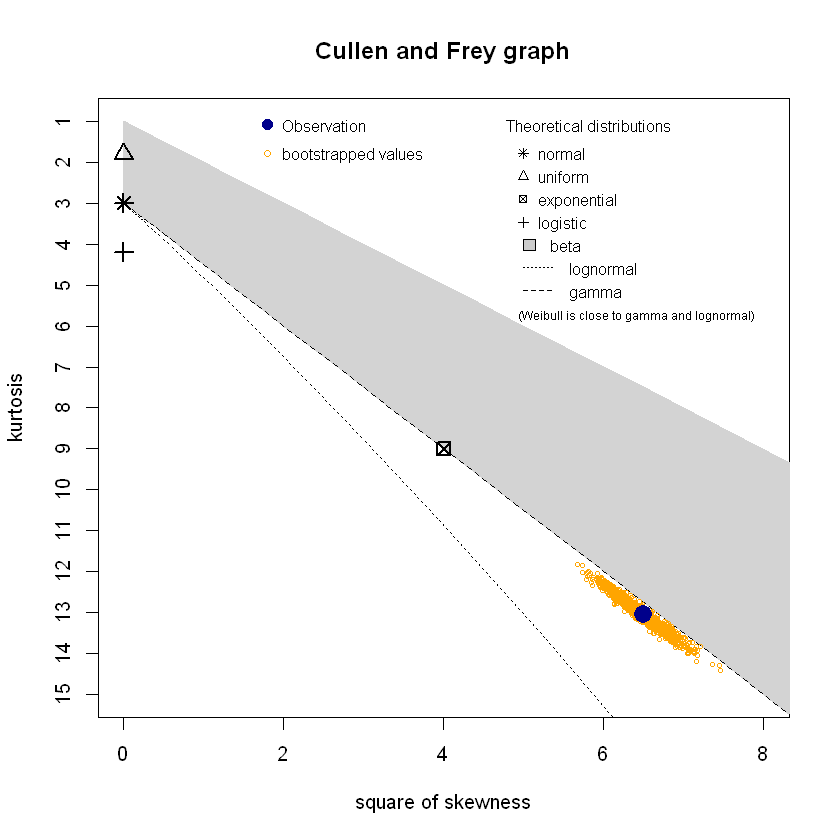

In [147]:
descdist( dMar$Dry_Count, boot=1000 )

In [148]:
fd_NB_dMar <- fitdist( dMar$Dry_Count, "nbinom" )
fd_GE_dMar <- fitdist( dMar$Dry_Count, "geom" )

In [149]:
fdNB_dMar_size <- fd_NB_dMar$estimate[["size"]]
fdNB_dMar_mu <- fd_NB_dMar$estimate[["mu"]]
cat("Mar size: ", fdNB_dMar_size, "\n", "Mar mu: ", fdNB_dMar_mu, "\n")

Mar size:  1.744746 
 Mar mu:  8.187292 


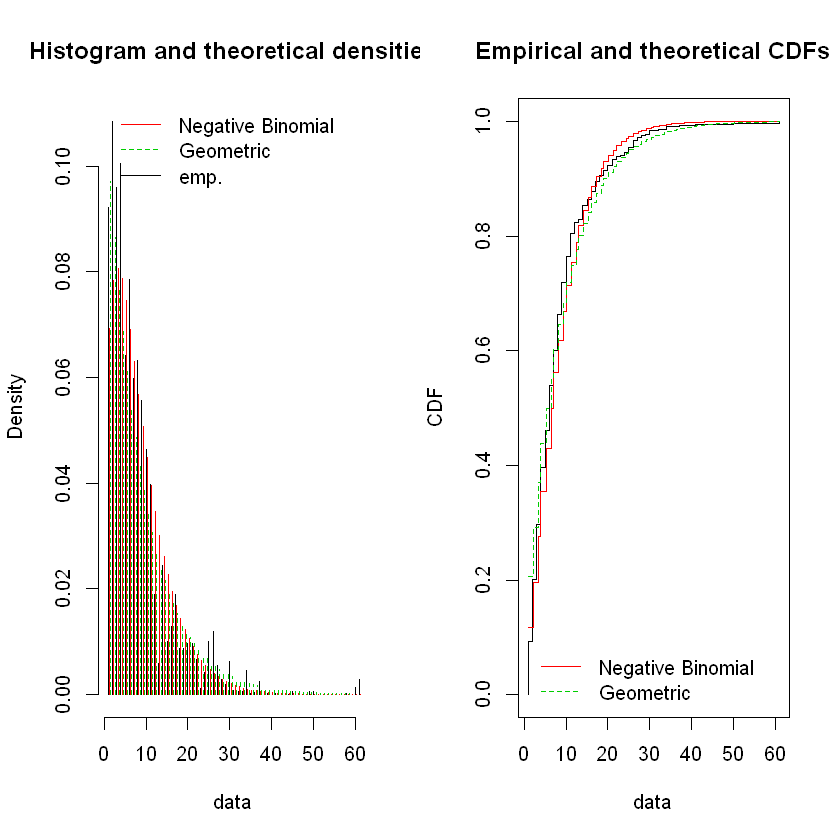

In [150]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dMar, fd_GE_dMar), legendtext=plot.legend )
cdfcomp( list(fd_NB_dMar, fd_GE_dMar), legendtext=plot.legend )

In [151]:
statRes <- gofstat( list(fd_NB_dMar, fd_GE_dMar), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [152]:
print(statRes)

Chi-squared statistic:  2584.387 3529.778 
Degree of freedom of the Chi-squared distribution:  19 20 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       2001             2545.54391      4467.4401
<= 2       2354             1698.67626      1876.0199
<= 3       2082             1747.88801      1671.8228
<= 4       2181             1709.10389      1489.8518
<= 5       1393             1618.71794      1327.6875
<= 6       1706             1499.98675      1183.1742
<= 7       1299             1368.03894      1054.3906
<= 8       1373             1232.70050       939.6245
<= 9       1209             1100.24015       837.3502
<= 10      1005              974.50831       746.2081
<= 11       861              857.70589       664.9864
<= 12       412              750.91407       592.6054
<= 14       659             1222.65768       998.7236
<= 16       497              915.76961       793.1420
<= 17       412              364.94403    

In [153]:
fdNB_dMar_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [154]:
fdNB_dMar_p = fdNB_dMar_size / (fdNB_dMar_size + fdNB_dMar_mu)
cat("prob: ", fdNB_dMar_p)

prob:  0.1756685

In [155]:
MonDistDF[3, ] <- list( 3, dMarMean, dMarBNr, fdNB_dMar_p, fdNB_dMar_mu, 
                        fdNB_dMar_size, fdNB_dMar_pvalue )

In [156]:
gf_dMar <- goodfit( dMar$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dMar_size, prob=fdNB_dMar_p) )

In [157]:
summary( gf_dMar )

Warning message in summary.goodfit(gf_dMar):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          11349.823 61        0
Likelihood Ratio  5809.937 45        0


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

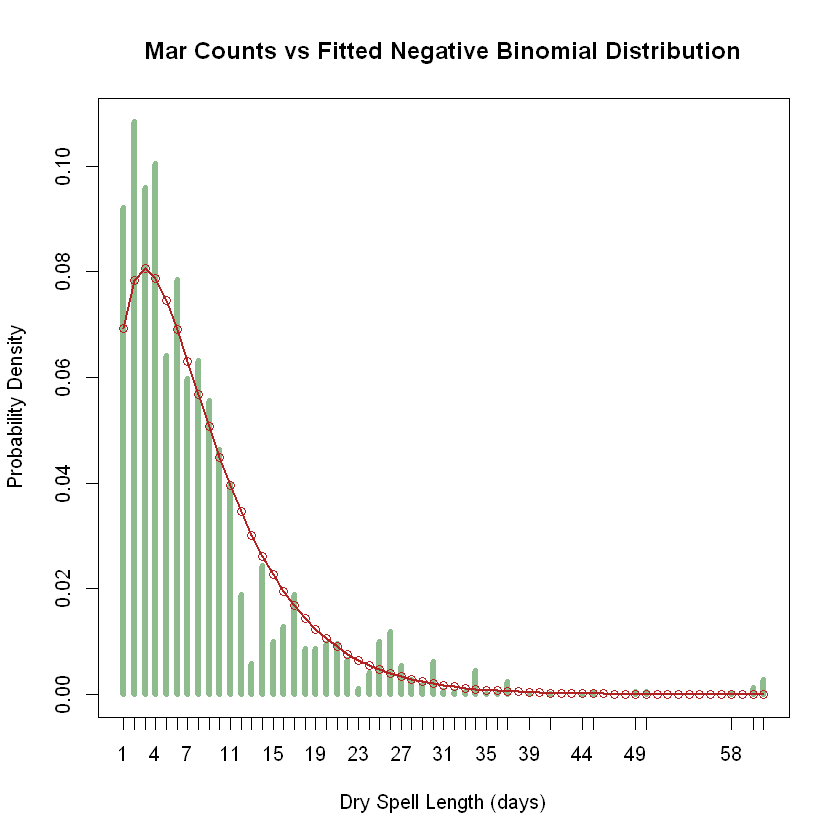

In [158]:
maxP <- max(dMar$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dMar_size, mu=fdNB_dMar_mu )
ttab <- table( dMar$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Mar Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

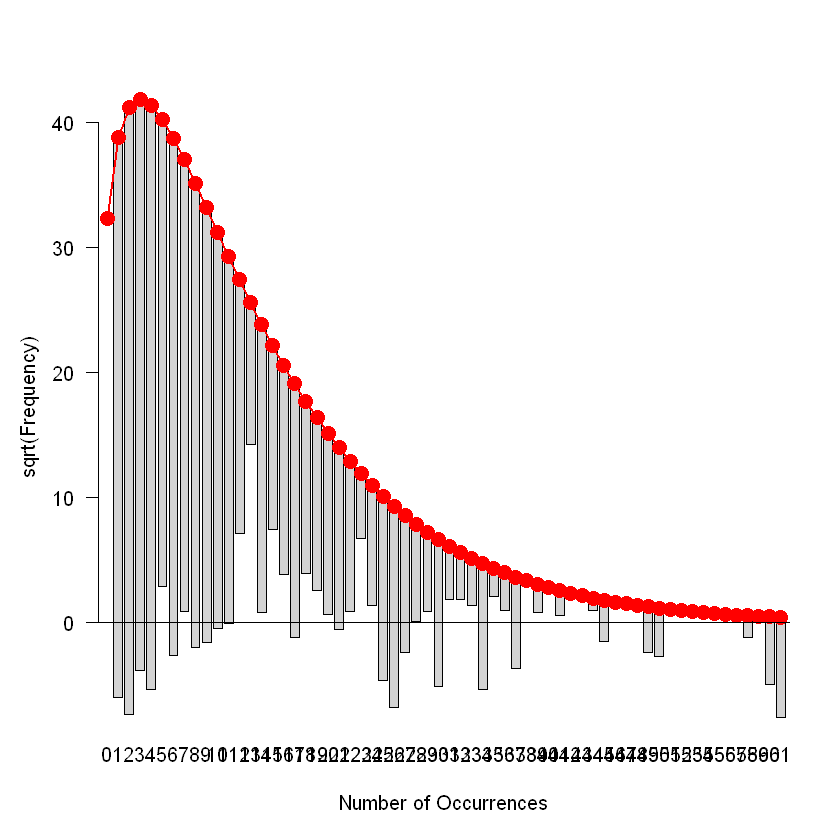

In [159]:
plot( gf_dMar )

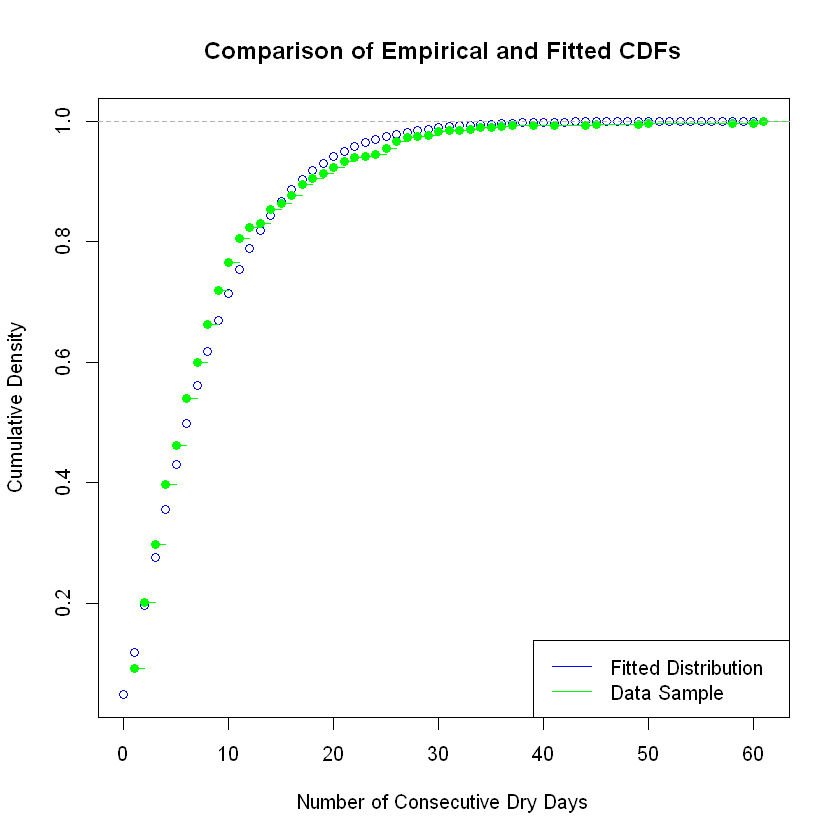

In [160]:
x <- seq(0,dMarMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dMar_mu, size=fdNB_dMar_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dMar$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

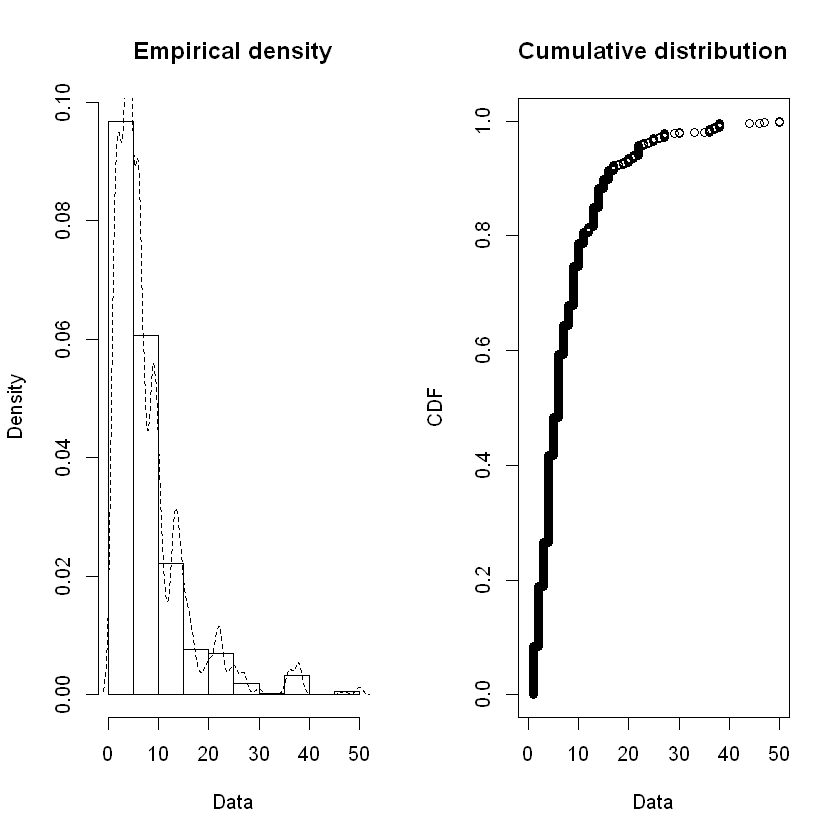

In [161]:
plotdist( dApr$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  50 
median:  6 
mean:  7.712354 
estimated sd:  7.125928 
estimated skewness:  2.326183 
estimated kurtosis:  10.11572 

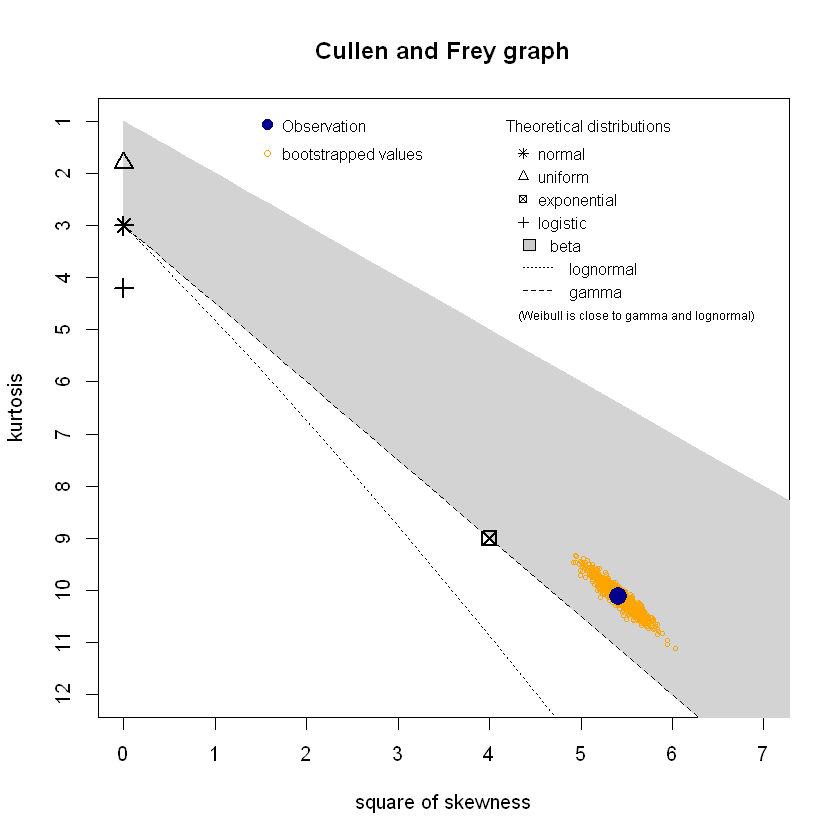

In [162]:
descdist( dApr$Dry_Count, boot=1000 )

In [163]:
fd_NB_dApr <- fitdist( dApr$Dry_Count, "nbinom" )
fd_GE_dApr <- fitdist( dApr$Dry_Count, "geom" )

In [164]:
fdNB_dApr_size <- fd_NB_dApr$estimate[["size"]]
fdNB_dApr_mu <- fd_NB_dApr$estimate[["mu"]]
cat("Apr size: ", fdNB_dApr_size, "\n", "Apr mu: ", fdNB_dApr_mu, "\n")

Apr size:  1.952456 
 Apr mu:  7.714156 


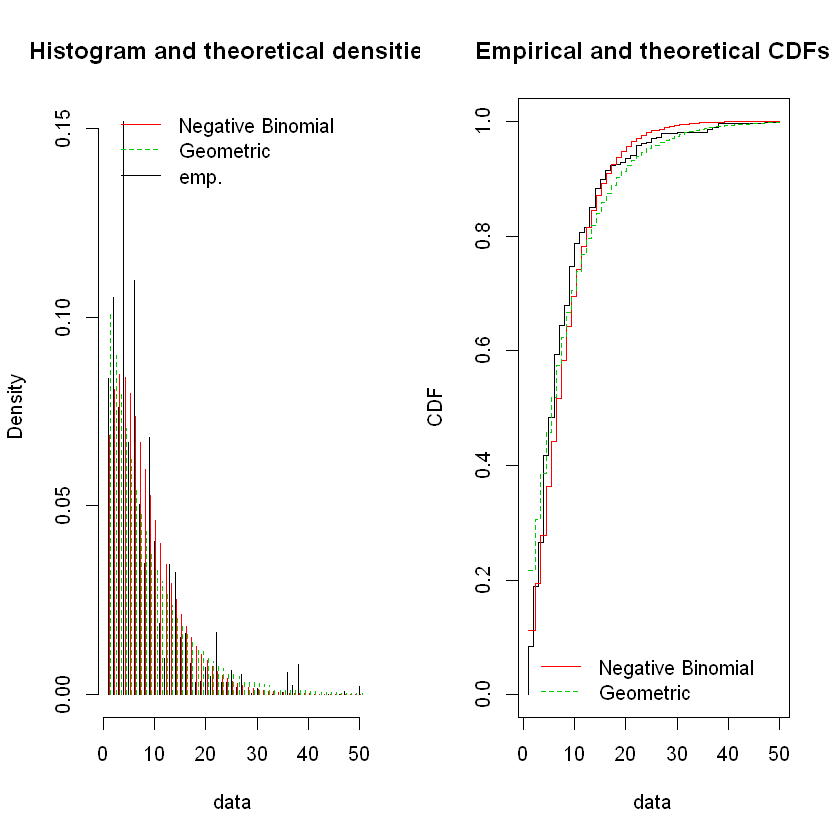

In [165]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dApr, fd_GE_dApr), legendtext=plot.legend )
cdfcomp( list(fd_NB_dApr, fd_GE_dApr), legendtext=plot.legend )

In [166]:
statRes <- gofstat( list(fd_NB_dApr, fd_GE_dApr), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [167]:
print(statRes)

Chi-squared statistic:  4135.621 5303.717 
Degree of freedom of the Chi-squared distribution:  18 19 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       1450             1948.75200      3744.7544
<= 2       1820             1398.30539      1556.5536
<= 3       1319             1470.15110      1377.8931
<= 4       2629             1452.56895      1219.7391
<= 5       1155             1379.99365      1079.7380
<= 6       1899             1276.08095       955.8062
<= 7        872             1156.89940       846.0992
<= 8        600             1033.14658       748.9843
<= 9       1179              911.72493       663.0162
<= 10       701              796.87368       586.9155
<= 11       328              690.98414       519.5496
<= 13       763             1104.95683       867.0430
<= 14       561              434.48337       360.3972
<= 15       263              368.74283       319.0309
<= 16       279              311.78151    

In [168]:
fdNB_dApr_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [169]:
fdNB_dApr_p = fdNB_dApr_size / (fdNB_dApr_size + fdNB_dApr_mu)
cat("prob: ", fdNB_dApr_p)

prob:  0.2019794

In [170]:
MonDistDF[4, ] <- list( 4, dAprMean, dAprBNr, fdNB_dApr_p, fdNB_dApr_mu, 
                        fdNB_dApr_size, fdNB_dApr_pvalue )

In [171]:
gf_dApr <- goodfit( dApr$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dApr_size, prob=fdNB_dApr_p) )

In [172]:
summary( gf_dApr )

Warning message in summary.goodfit(gf_dApr):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          9984.253 50        0
Likelihood Ratio 6274.204 37        0


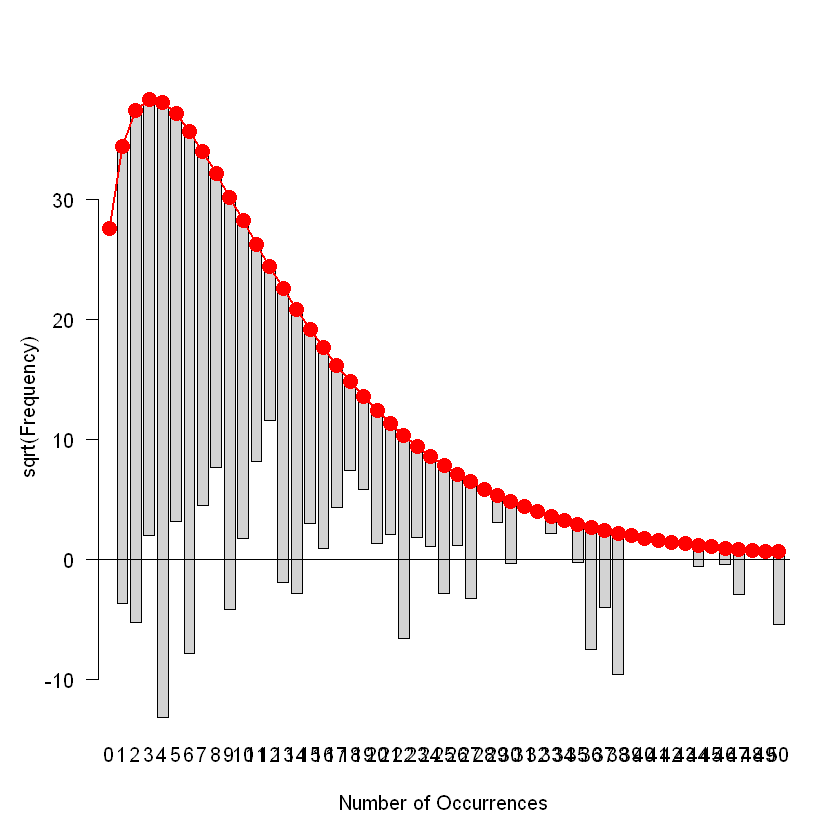

In [173]:
plot( gf_dApr )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

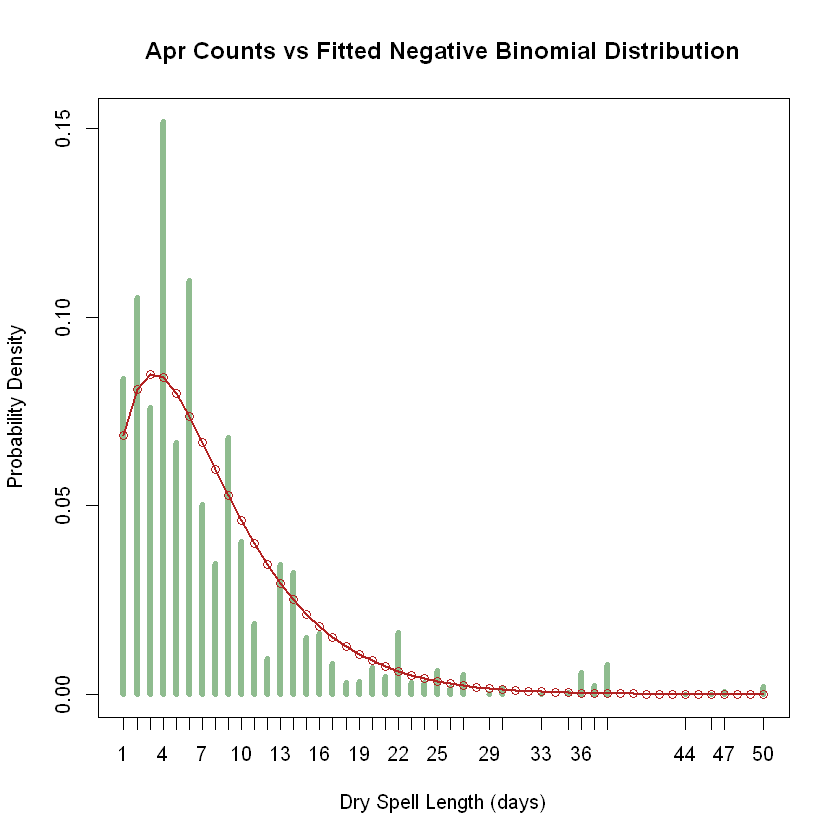

In [174]:
maxP <- max(dApr$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dApr_size, mu=fdNB_dApr_mu )
ttab <- table( dApr$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Apr Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

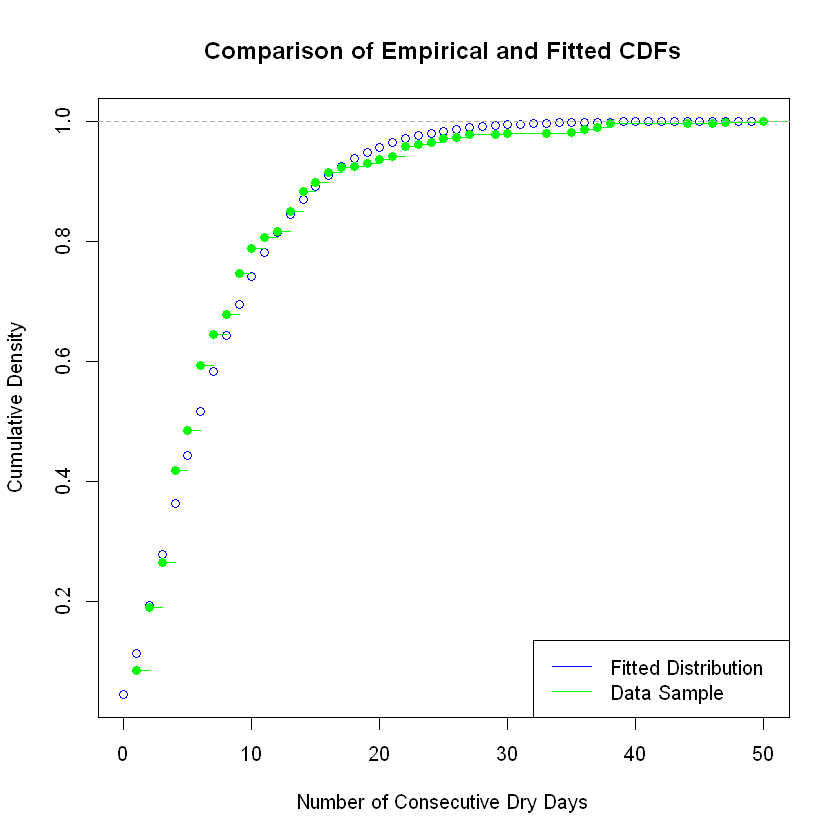

In [175]:
x <- seq(0,dAprMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dApr_mu, size=fdNB_dApr_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dApr$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

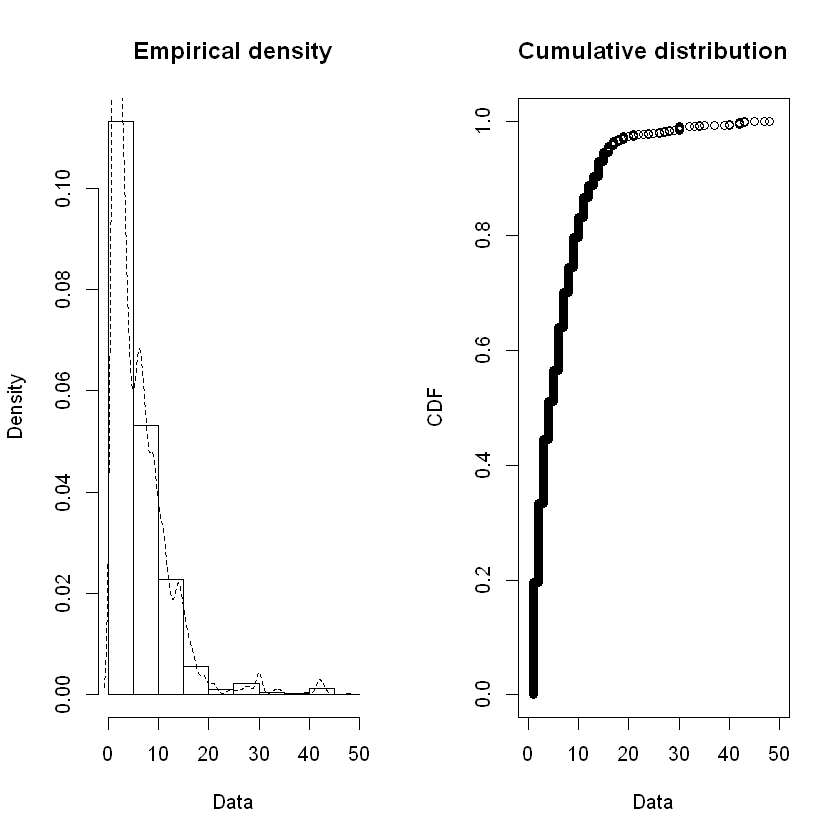

In [176]:
plotdist( dMay$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  48 
median:  4 
mean:  6.137622 
estimated sd:  6.091366 
estimated skewness:  2.576836 
estimated kurtosis:  13.04361 

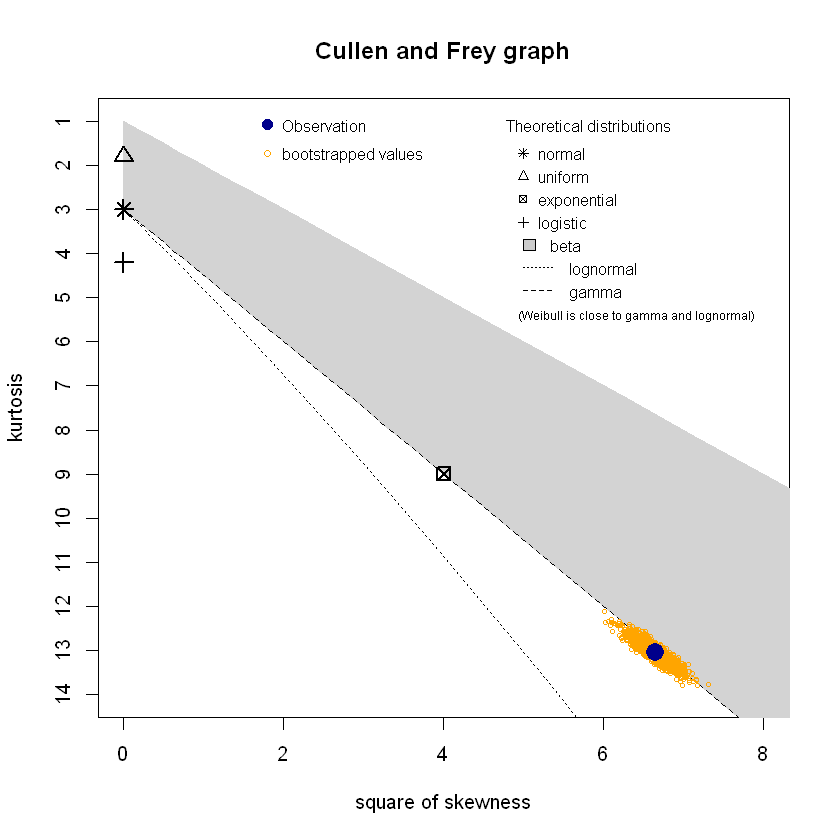

In [177]:
descdist( dMay$Dry_Count, boot=1000 )

In [178]:
fd_NB_dMay <- fitdist( dMay$Dry_Count, "nbinom" )
fd_GE_dMay <- fitdist( dMay$Dry_Count, "geom" )

In [179]:
fdNB_dMay_size <- fd_NB_dMay$estimate[["size"]]
fdNB_dMay_mu <- fd_NB_dMay$estimate[["mu"]]
cat("May size: ", fdNB_dMay_size, "\n", "May mu: ", fdNB_dMay_mu, "\n")

May size:  1.681859 
 May mu:  6.13852 


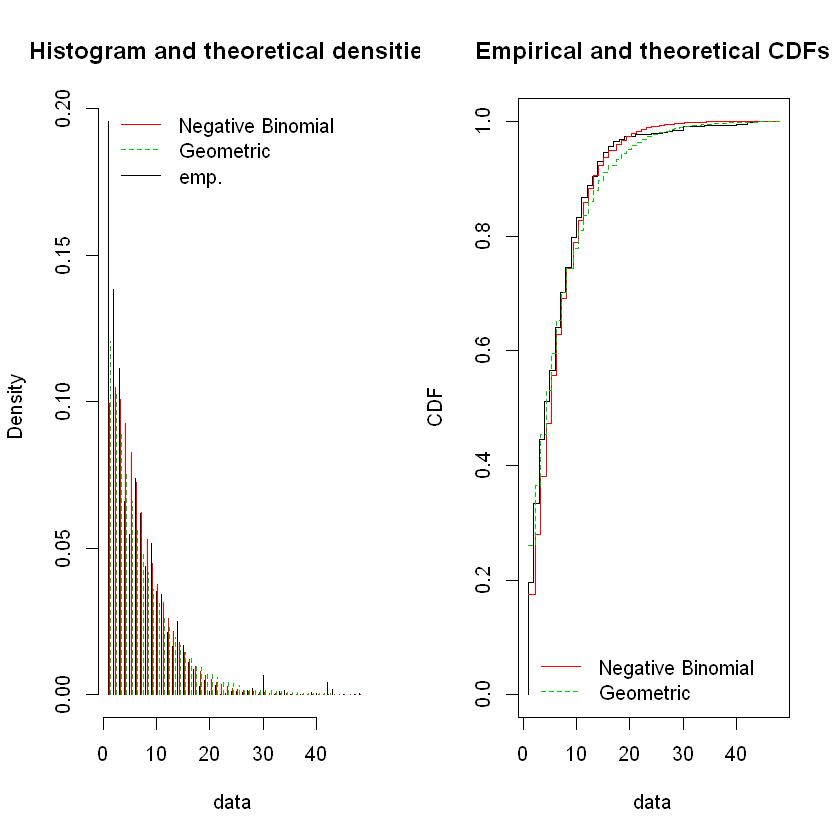

In [180]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dMay, fd_GE_dMay), legendtext=plot.legend )
cdfcomp( list(fd_NB_dMay, fd_GE_dMay), legendtext=plot.legend )

In [181]:
statRes <- gofstat( list(fd_NB_dMay, fd_GE_dMay), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [182]:
print(statRes)

Chi-squared statistic:  1932.659 2035.379 
Degree of freedom of the Chi-squared distribution:  17 18 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       4942              4416.9372      6577.7351
<= 2       3490              2645.2776      2615.0536
<= 3       2810              2548.3147      2248.6776
<= 4       1666              2341.2472      1933.6319
<= 5       1378              2088.3515      1662.7248
<= 6       1861              1825.5156      1429.7726
<= 7       1561              1572.4966      1229.4577
<= 8       1108              1339.5173      1057.2073
<= 9       1301              1131.0985       909.0898
<= 10       887               948.3817       781.7239
<= 11       867               790.5663       672.2022
<= 12       537               655.8067       578.0249
<= 13       415               541.7682       497.0421
<= 14       633               445.9666       427.4051
<= 15       423               365.9692    

In [183]:
fdNB_dMay_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [184]:
fdNB_dMay_p = fdNB_dMay_size / (fdNB_dMay_size + fdNB_dMay_mu)
cat("prob: ", fdNB_dMay_p)

prob:  0.2150611

In [185]:
MonDistDF[5, ] <- list( 5, dMayMean, dMayBNr, fdNB_dMay_p, fdNB_dMay_mu, 
                        fdNB_dMay_size, fdNB_dMay_pvalue )

In [186]:
gf_dMay <- goodfit( dMay$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dMay_size, prob=fdNB_dMay_p) )

In [187]:
summary( gf_dMay )

Warning message in summary.goodfit(gf_dMay):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          19381.407 48        0
Likelihood Ratio  8920.002 41        0


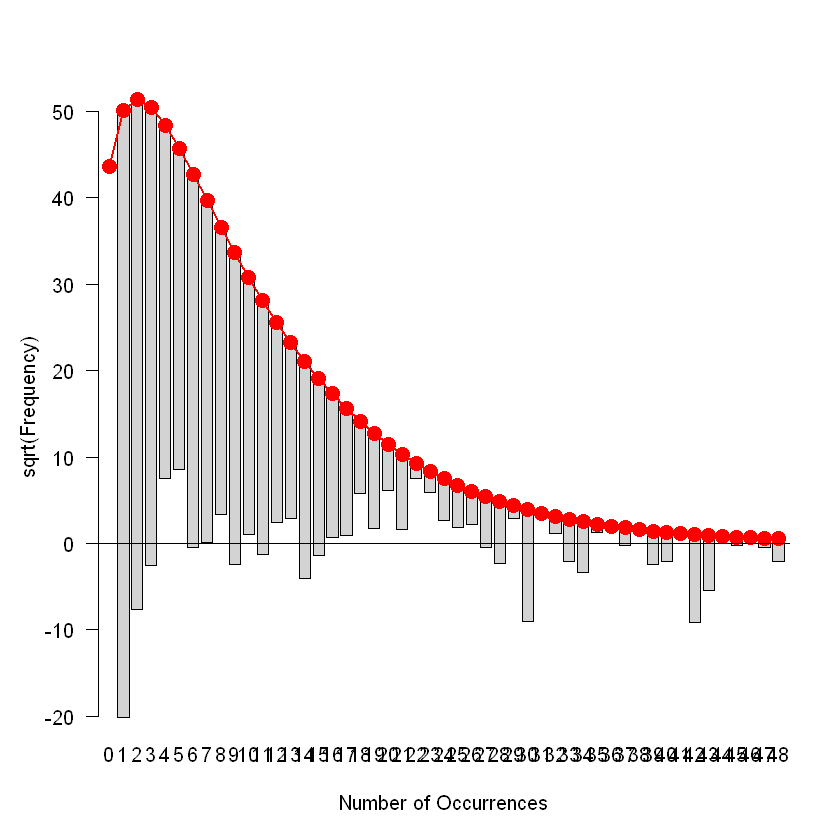

In [188]:
plot( gf_dMay )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

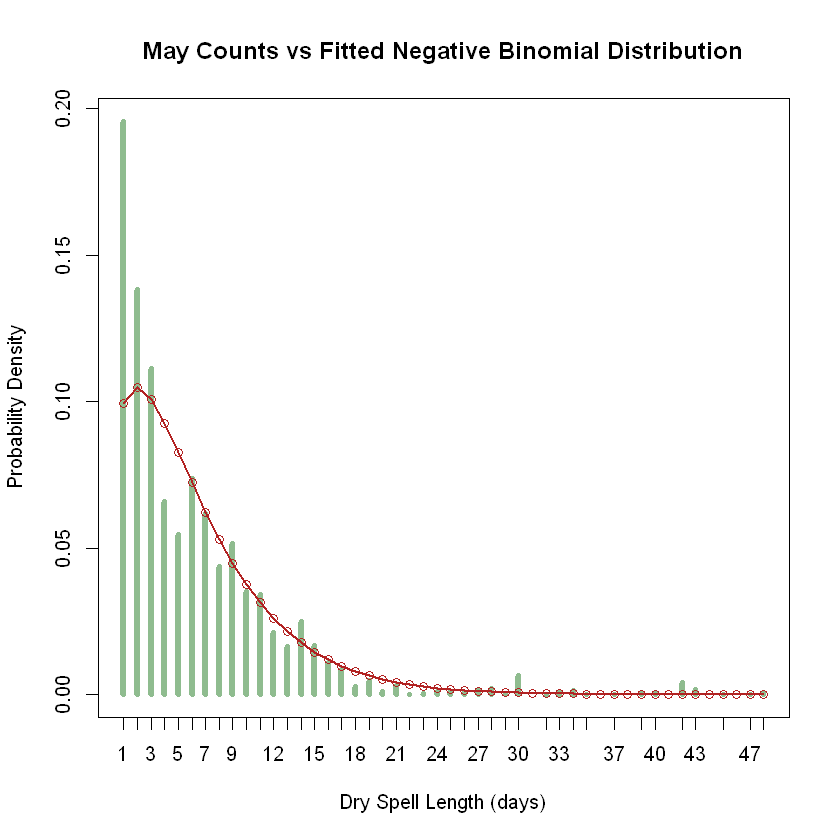

In [189]:
maxP <- max(dMay$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dMay_size, mu=fdNB_dMay_mu )
ttab <- table( dMay$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="May Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

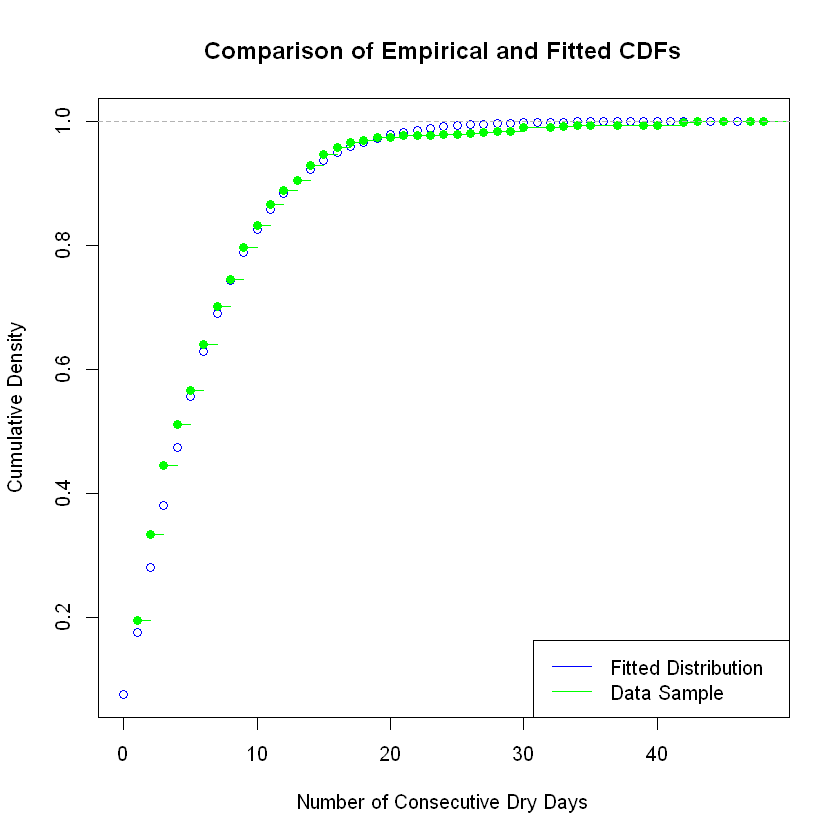

In [190]:
x <- seq(0,dMayMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dMay_mu, size=fdNB_dMay_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dMay$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

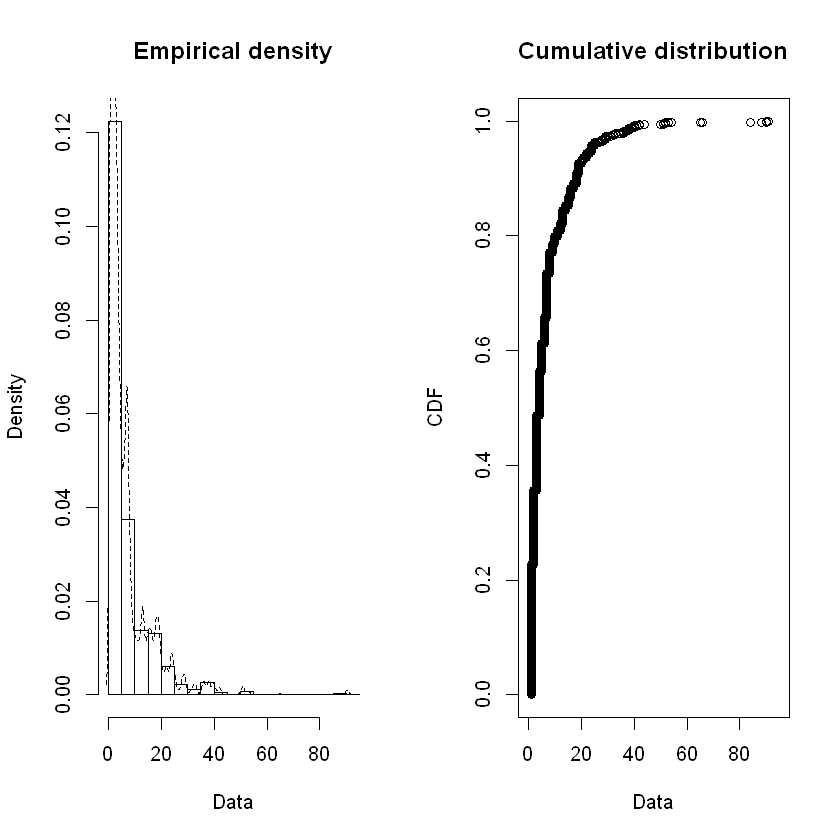

In [191]:
plotdist( dJun$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  91 
median:  4 
mean:  6.97943 
estimated sd:  8.731973 
estimated skewness:  3.241797 
estimated kurtosis:  20.46508 

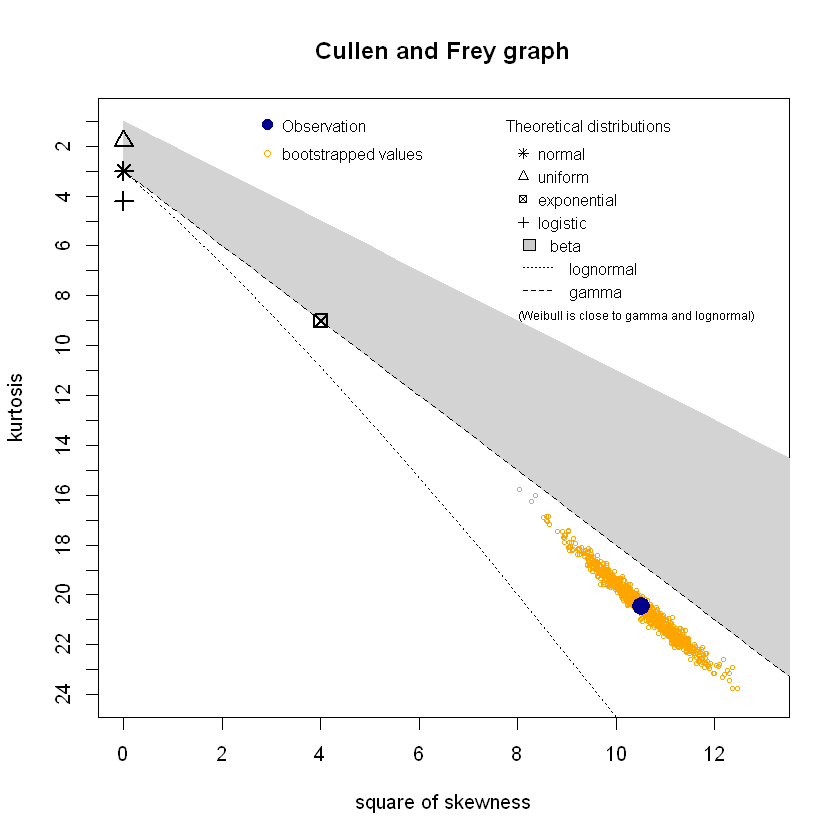

In [192]:
descdist( dJun$Dry_Count, boot=1000 )

In [193]:
fd_NB_dJun <- fitdist( dJun$Dry_Count, "nbinom" )
fd_GE_dJun <- fitdist( dJun$Dry_Count, "geom" )

In [194]:
fdNB_dJun_size <- fd_NB_dJun$estimate[["size"]]
fdNB_dJun_mu <- fd_NB_dJun$estimate[["mu"]]
cat("Jun size: ", fdNB_dJun_size, "\n", "Jun mu: ", fdNB_dJun_mu, "\n")

Jun size:  1.147736 
 Jun mu:  6.980845 


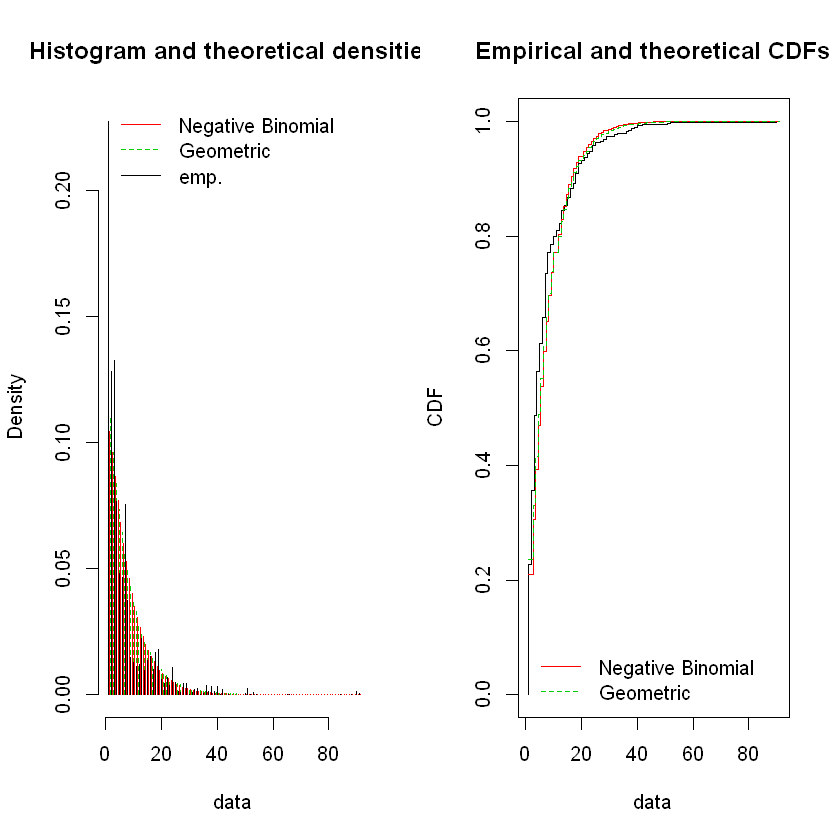

In [195]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dJun, fd_GE_dJun), legendtext=plot.legend )
cdfcomp( list(fd_NB_dJun, fd_GE_dJun), legendtext=plot.legend )

In [196]:
statRes <- gofstat( list(fd_NB_dJun, fd_GE_dJun), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [197]:
print(statRes)

Chi-squared statistic:  3694.869 3214.975 
Degree of freedom of the Chi-squared distribution:  20 21 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       5159             4766.70740     5333.81572
<= 2       2908             2182.17128     2176.74498
<= 3       3004             1966.34218     1903.95044
<= 4       1741             1751.06972     1665.34311
<= 5       1086             1548.25660     1456.63859
<= 6       1054             1362.38591     1274.08939
<= 7       1710             1194.71374     1114.41766
<= 8        847             1044.97061      974.75635
<= 9        336              912.15458      852.59771
<= 10       288              794.93362      745.74826
<= 11       252              691.85983      652.28942
<= 12       270              601.48593      570.54305
<= 13       501              522.42790      499.04132
<= 15       527              846.61026      818.29750
<= 16       344              340.81068    

In [198]:
fdNB_dJun_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [199]:
fdNB_dJun_p = fdNB_dJun_size / (fdNB_dJun_size + fdNB_dJun_mu)
cat("prob: ", fdNB_dJun_p)

prob:  0.1411975

In [200]:
MonDistDF[6, ] <- list( 6, dJunMean, dJunBNr, fdNB_dJun_p, fdNB_dJun_mu, 
                        fdNB_dJun_size, fdNB_dJun_pvalue )

In [201]:
gf_dJun <- goodfit( dJun$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dJun_size, prob=fdNB_dJun_p) )

In [202]:
summary( gf_dJun )

Warning message in summary.goodfit(gf_dJun):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          125726.44 91        0
Likelihood Ratio  12283.08 53        0


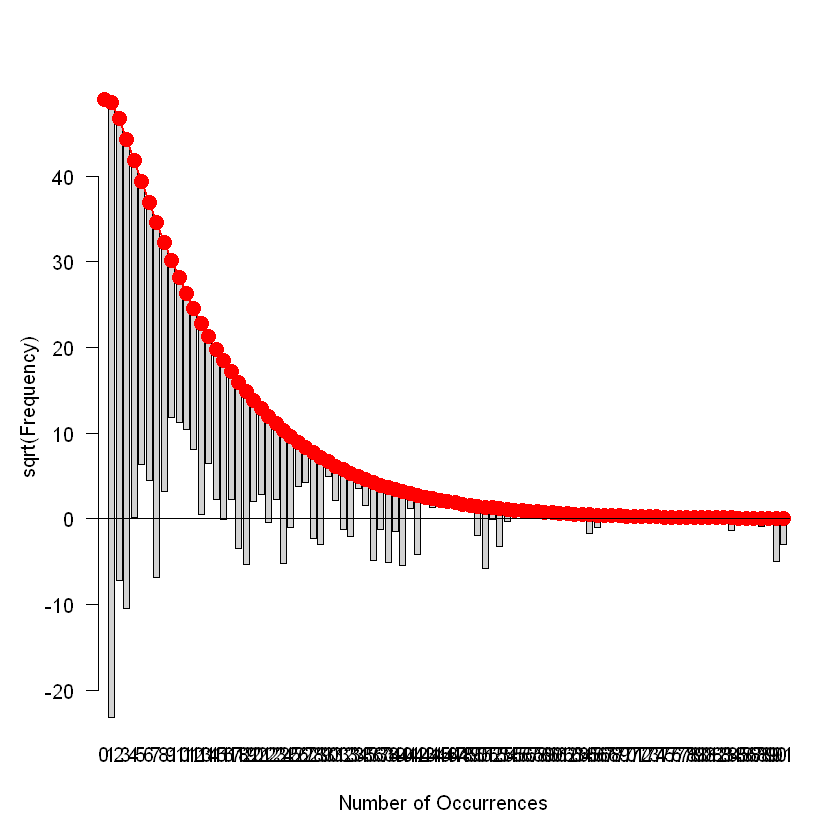

In [203]:
plot( gf_dJun )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

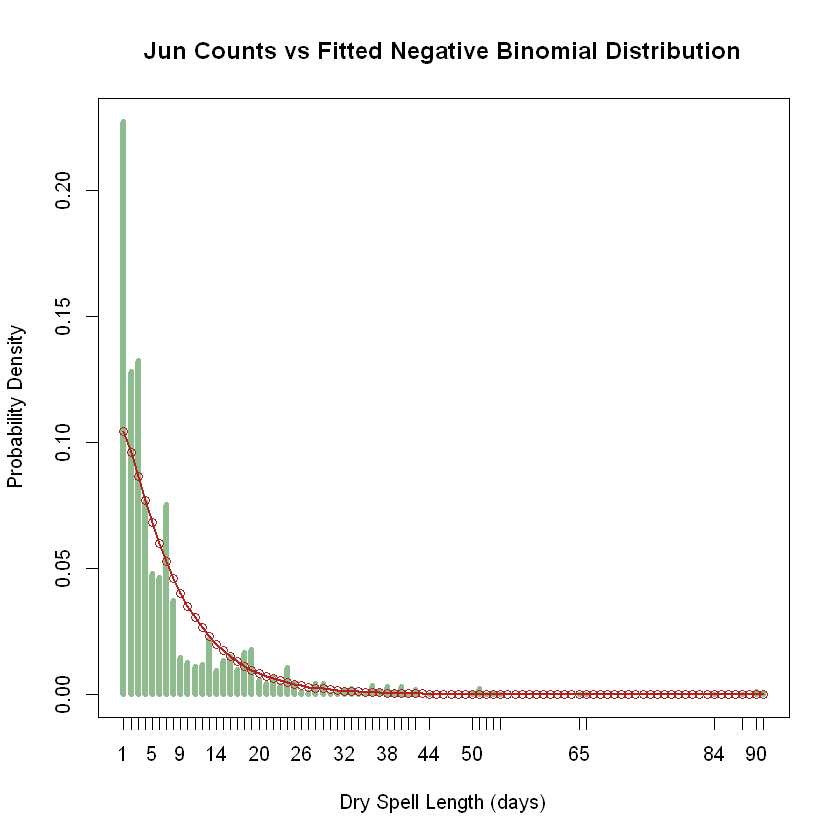

In [204]:
maxP <- max(dJun$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dJun_size, mu=fdNB_dJun_mu )
ttab <- table( dJun$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Jun Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

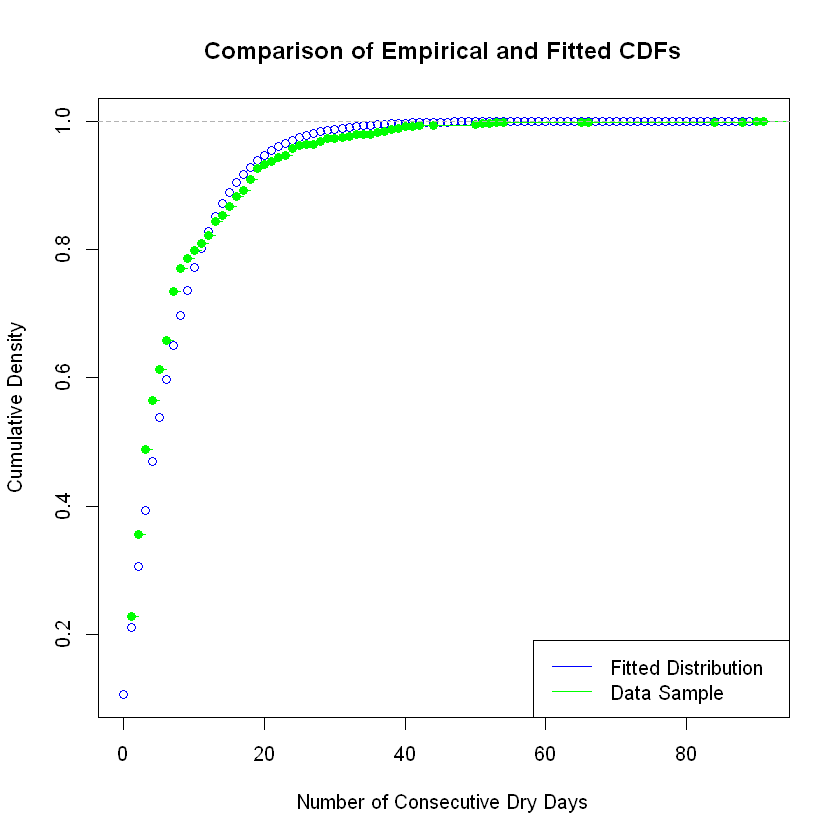

In [205]:
x <- seq(0,dJunMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dJun_mu, size=fdNB_dJun_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dJun$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

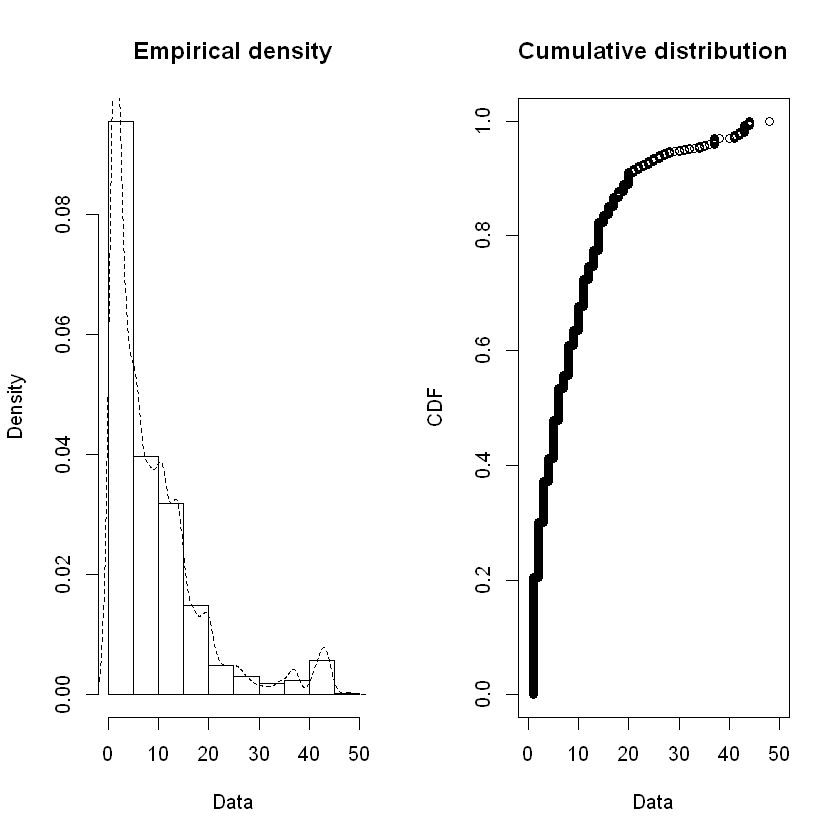

In [206]:
plotdist( dJul$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  48 
median:  6 
mean:  9.00423 
estimated sd:  9.49838 
estimated skewness:  1.880031 
estimated kurtosis:  6.667543 

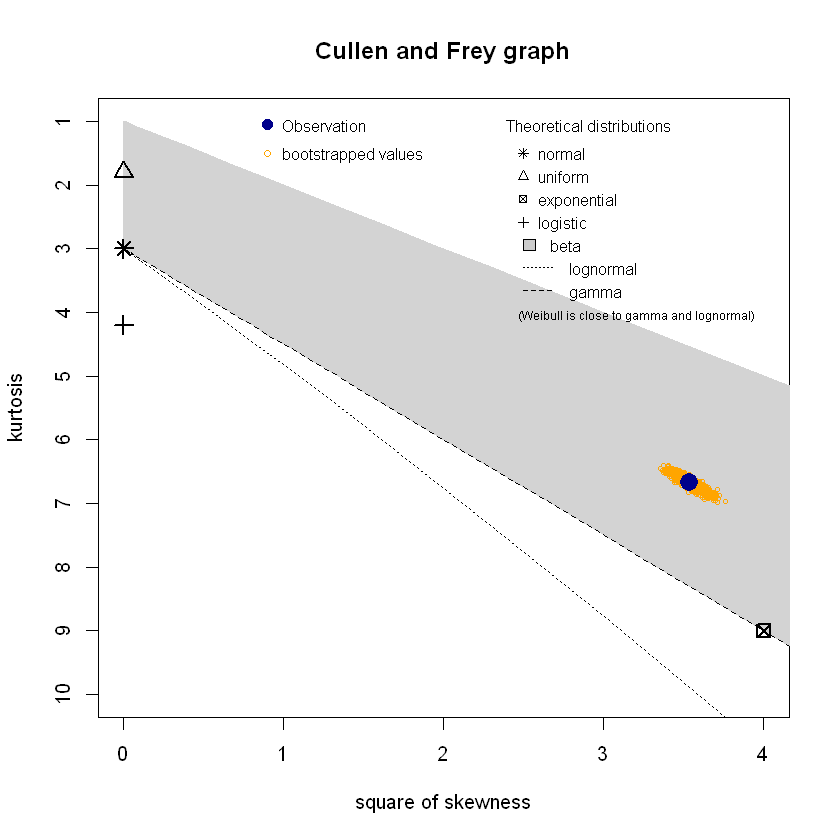

In [207]:
descdist( dJul$Dry_Count, boot=1000 )

In [208]:
fd_NB_dJul <- fitdist( dJul$Dry_Count, "nbinom" )
fd_GE_dJul <- fitdist( dJul$Dry_Count, "geom" )

In [209]:
fdNB_dJul_size <- fd_NB_dJul$estimate[["size"]]
fdNB_dJul_mu <- fd_NB_dJul$estimate[["mu"]]
cat("Jul size: ", fdNB_dJul_size, "\n", "Jul mu: ", fdNB_dJul_mu, "\n")

Jul size:  1.181042 
 Jul mu:  9.004224 


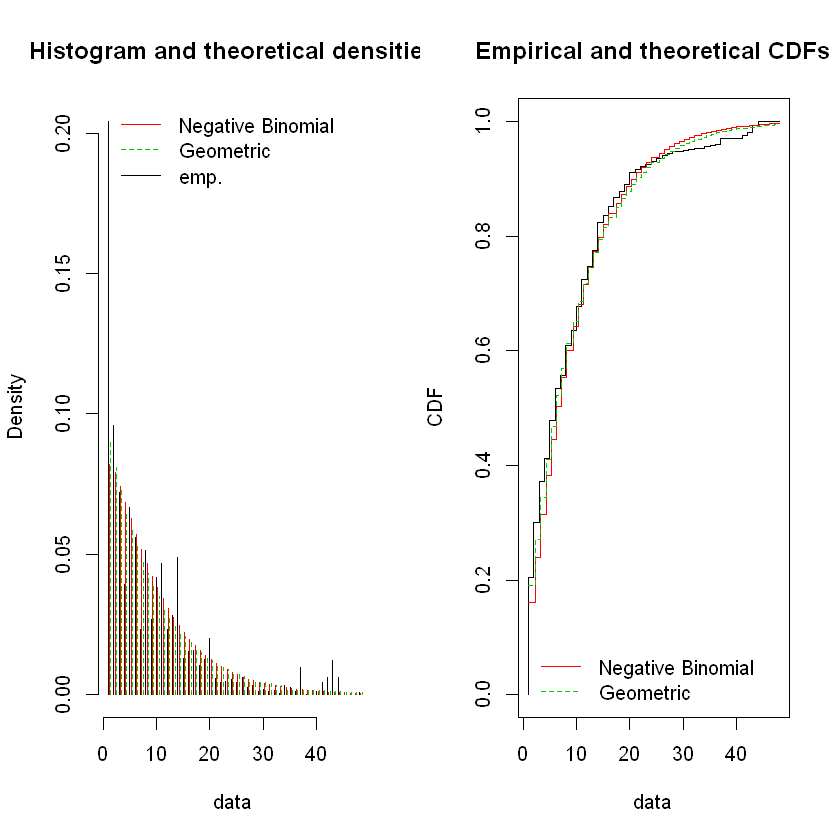

In [210]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dJul, fd_GE_dJul), legendtext=plot.legend )
cdfcomp( list(fd_NB_dJul, fd_GE_dJul), legendtext=plot.legend )

In [211]:
statRes <- gofstat( list(fd_NB_dJul, fd_GE_dJul), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [212]:
print(statRes)

Chi-squared statistic:  4763.273 3881.18 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       3621             2845.11761     3367.35054
<= 2       1703             1401.02745     1435.65765
<= 3       1277             1313.31432     1292.15259
<= 4        695             1213.57639     1162.99196
<= 5       1179             1111.70134     1046.74194
<= 6        991             1012.44743      942.11201
<= 7        409              918.19690      847.94064
<= 8        912              830.09609      763.18243
<= 9        473              748.60332      686.89646
<= 10       740              673.77966      618.23586
<= 11       828              605.45435      556.43841
<= 12       412              543.32354      500.81810
<= 13       502              487.01107      450.75747
<= 14       865              436.10680      405.70078
<= 15       226              390.19087     

In [213]:
fdNB_dJul_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [214]:
fdNB_dJul_p = fdNB_dJul_size / (fdNB_dJul_size + fdNB_dJul_mu)
cat("prob: ", fdNB_dJul_p)

prob:  0.1159559

In [215]:
MonDistDF[7, ] <- list( 7, dJulMean, dJulBNr, fdNB_dJul_p, fdNB_dJul_mu, 
                        fdNB_dJul_size, fdNB_dJul_pvalue )

In [216]:
gf_dJul <- goodfit( dJul$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dJul_size, prob=fdNB_dJul_p) )

In [217]:
summary( gf_dJul )


	 Goodness-of-fit test for nbinomial distribution

                       X^2 df P(> X^2)
Pearson          11196.371 48        0
Likelihood Ratio  8890.577 43        0


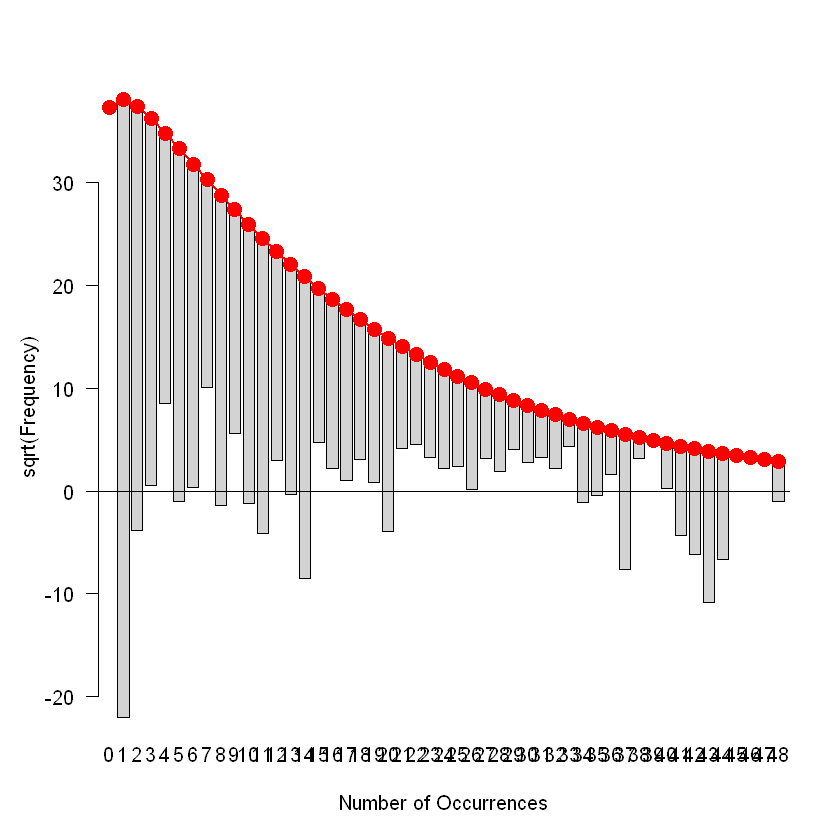

In [218]:
plot( gf_dJul )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

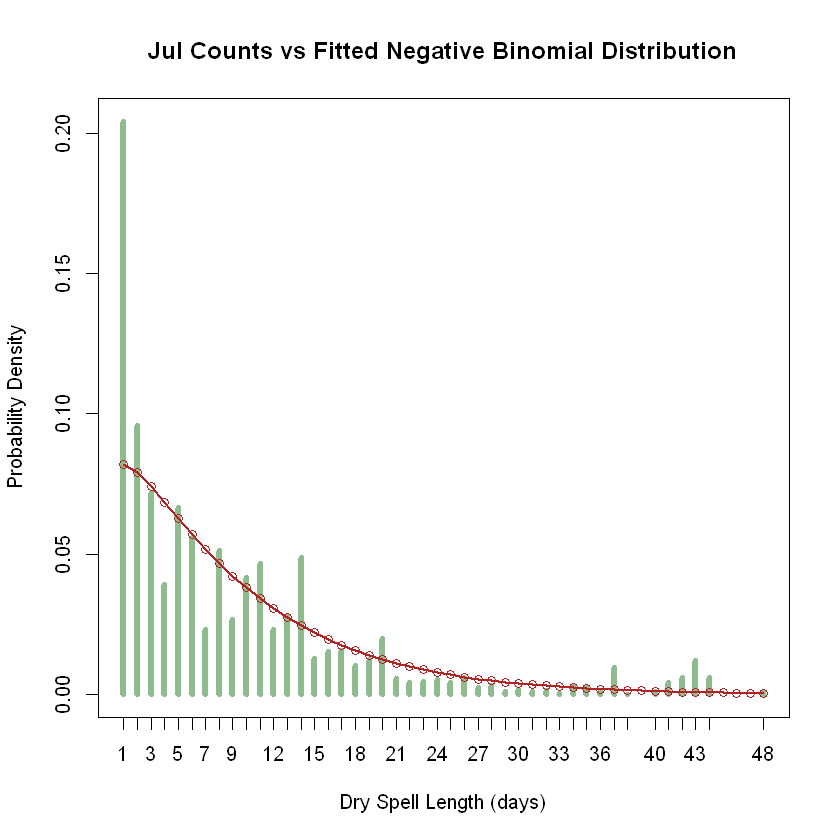

In [219]:
maxP <- max(dJul$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dJul_size, mu=fdNB_dJul_mu )
ttab <- table( dJul$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Jul Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

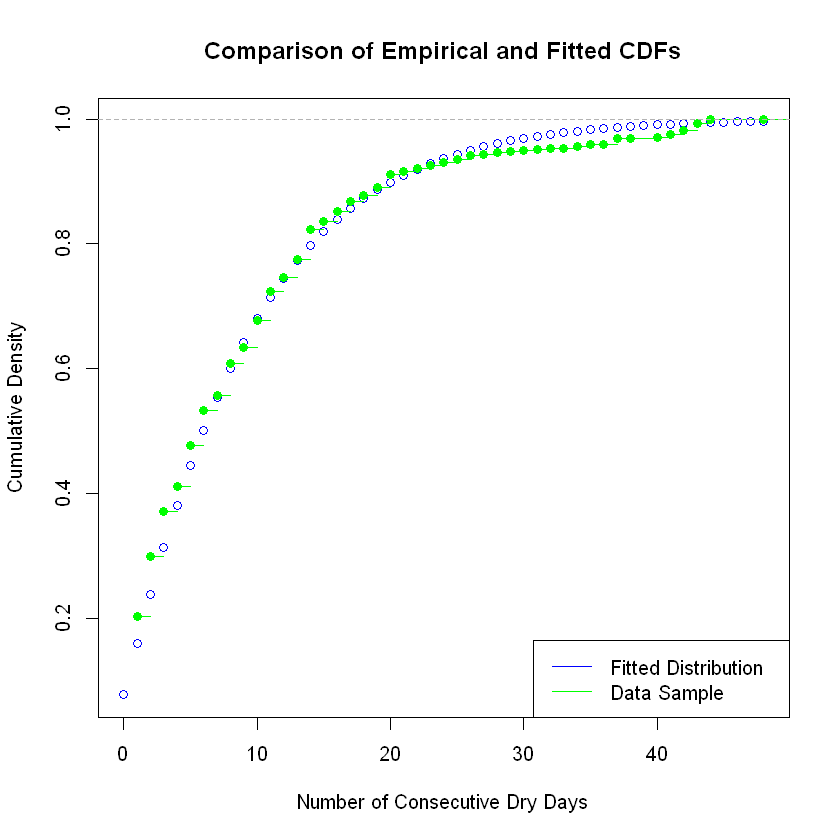

In [220]:
x <- seq(0,dJulMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dJul_mu, size=fdNB_dJul_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dJul$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

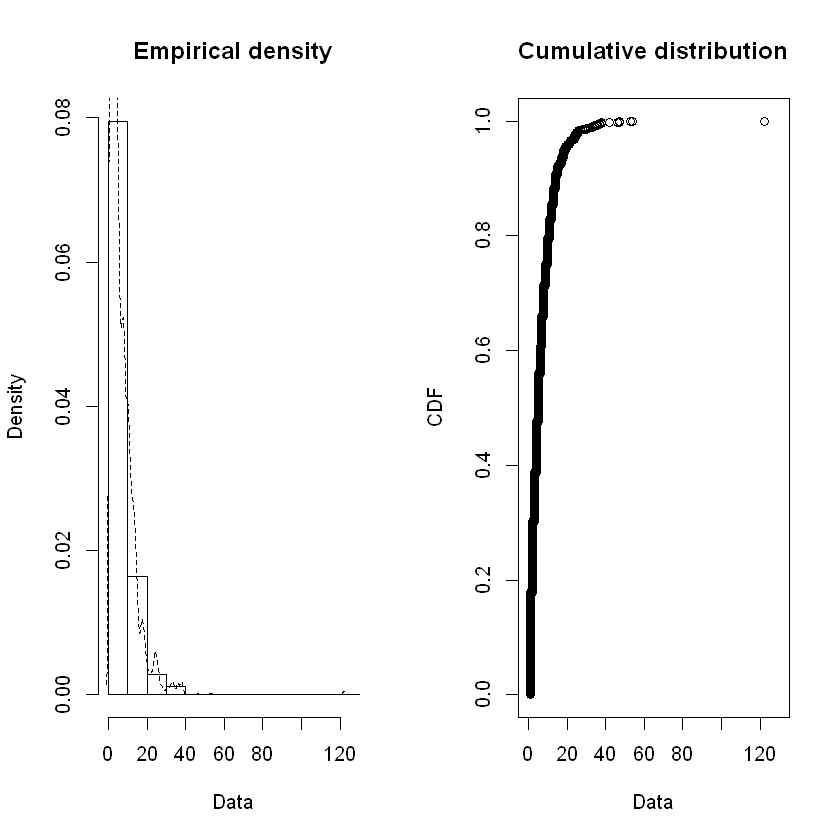

In [221]:
plotdist( dAug$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  122 
median:  5 
mean:  6.78796 
estimated sd:  7.053983 
estimated skewness:  4.621158 
estimated kurtosis:  57.77805 

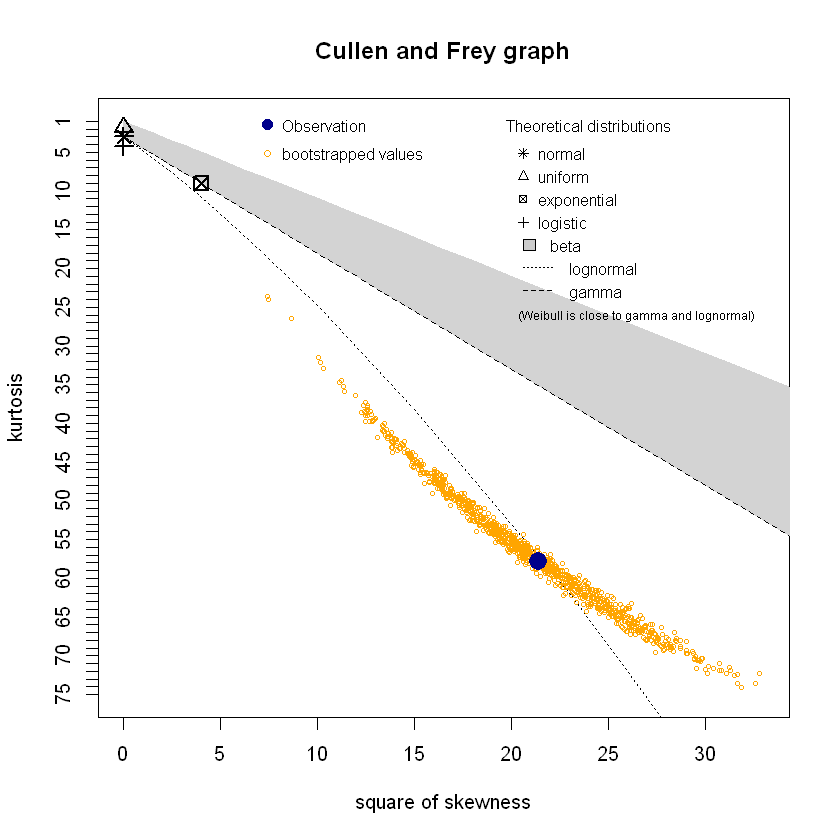

In [222]:
descdist( dAug$Dry_Count, boot=1000 )

In [223]:
fd_NB_dAug <- fitdist( dAug$Dry_Count, "nbinom" )
fd_GE_dAug <- fitdist( dAug$Dry_Count, "geom" )

In [224]:
fdNB_dAug_size <- fd_NB_dAug$estimate[["size"]]
fdNB_dAug_mu <- fd_NB_dAug$estimate[["mu"]]
cat("Aug size: ", fdNB_dAug_size, "\n", "Aug mu: ", fdNB_dAug_mu, "\n")

Aug size:  1.612179 
 Aug mu:  6.787059 


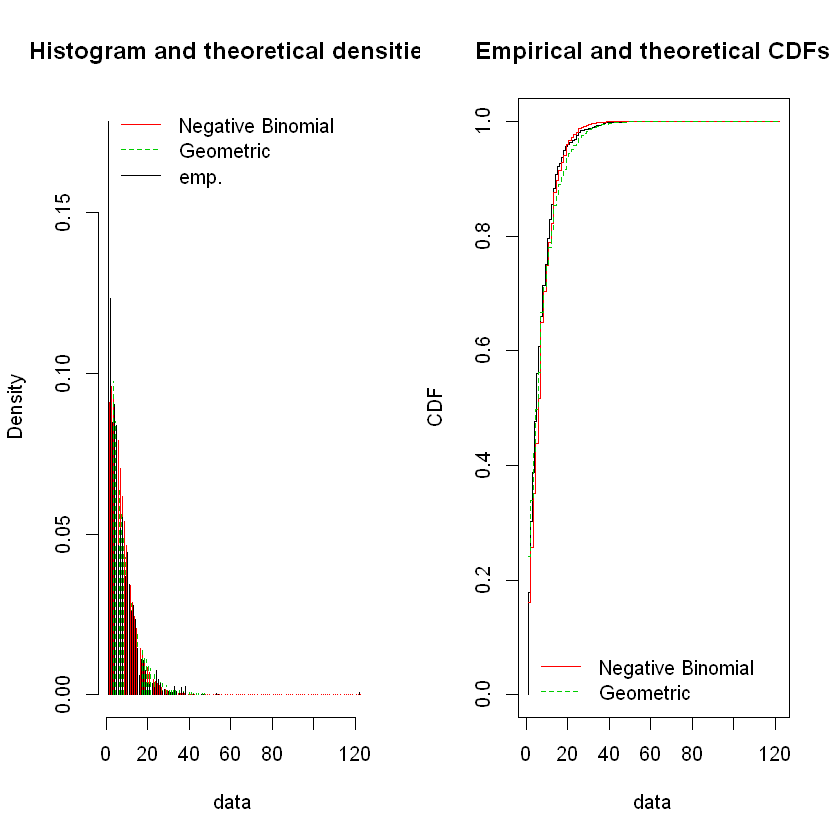

In [225]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dAug, fd_GE_dAug), legendtext=plot.legend )
cdfcomp( list(fd_NB_dAug, fd_GE_dAug), legendtext=plot.legend )

In [226]:
statRes <- gofstat( list(fd_NB_dAug, fd_GE_dAug), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [227]:
print(statRes)

Chi-squared statistic:  973.0118 1194.97 
Degree of freedom of the Chi-squared distribution:  18 19 
Chi-squared p-value:  4.088234e-195 1.106632e-241 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       3413             3076.49185      4594.6639
<= 2       2361             1836.88528      1864.9732
<= 3       1619             1787.19426      1625.5044
<= 4       1730             1665.17409      1416.7842
<= 5       1600             1510.29882      1234.8644
<= 6        888             1344.92468      1076.3037
<= 7        990             1181.81813       938.1027
<= 8       1053             1028.05285       817.6472
<= 9        706              887.23061       712.6586
<= 10       844              760.82158       621.1508
<= 11       656              649.00134       541.3930
<= 12       494              551.18350       471.8763
<= 13       528              466.36103       411.2858
<= 14       449              393.32444       358.4754
<= 15       273    

In [228]:
fdNB_dAug_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [229]:
fdNB_dAug_p = fdNB_dAug_size / (fdNB_dAug_size + fdNB_dAug_mu)
cat("prob: ", fdNB_dAug_p)

prob:  0.1919435

In [230]:
MonDistDF[8, ] <- list( 8, dAugMean, dAugBNr, fdNB_dAug_p, fdNB_dAug_mu, 
                        fdNB_dAug_size, fdNB_dAug_pvalue )

In [231]:
gf_dAug <- goodfit( dAug$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dAug_size, prob=fdNB_dAug_p) )

In [232]:
summary( gf_dAug )

Warning message in summary.goodfit(gf_dAug):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                          X^2  df P(> X^2)
Pearson          2.544833e+08 122        0
Likelihood Ratio 5.653161e+03  43        0


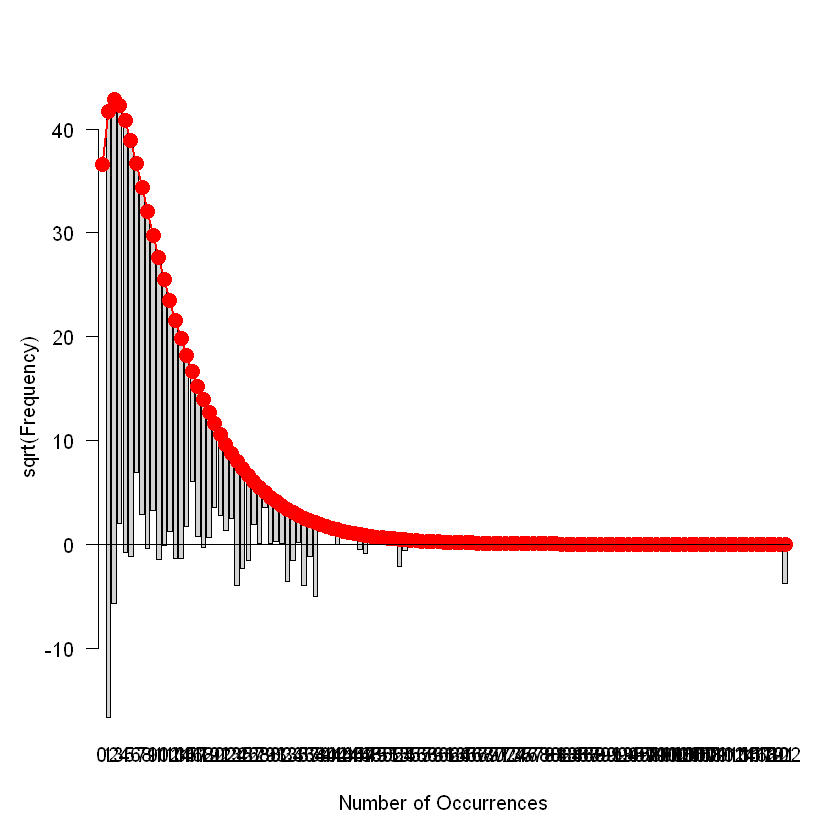

In [233]:
plot( gf_dAug )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

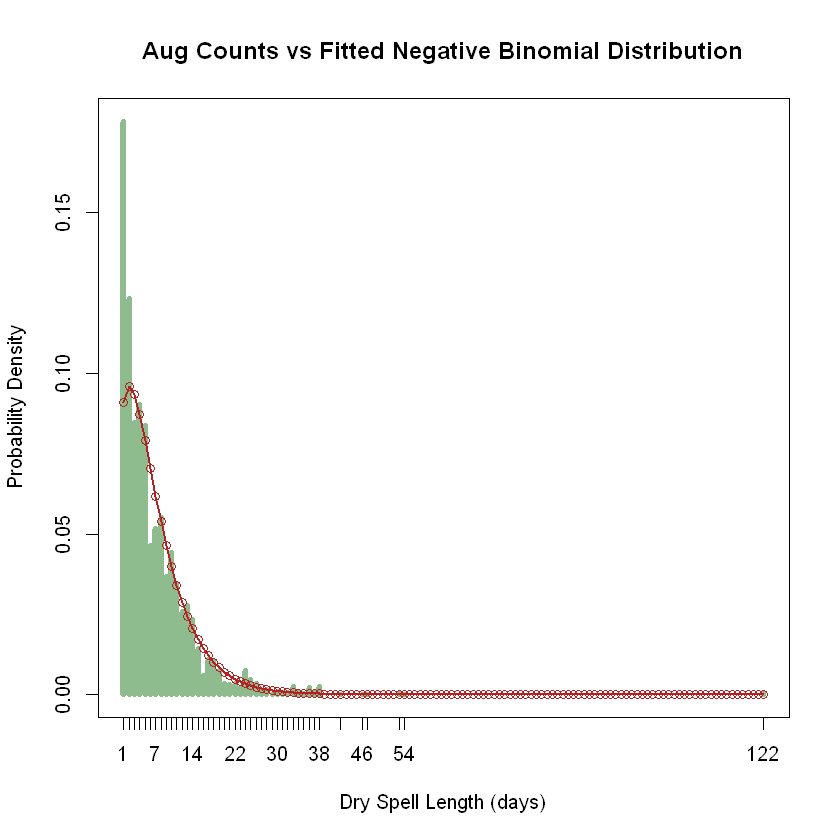

In [234]:
maxP <- max(dAug$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dAug_size, mu=fdNB_dAug_mu )
ttab <- table( dAug$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Aug Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

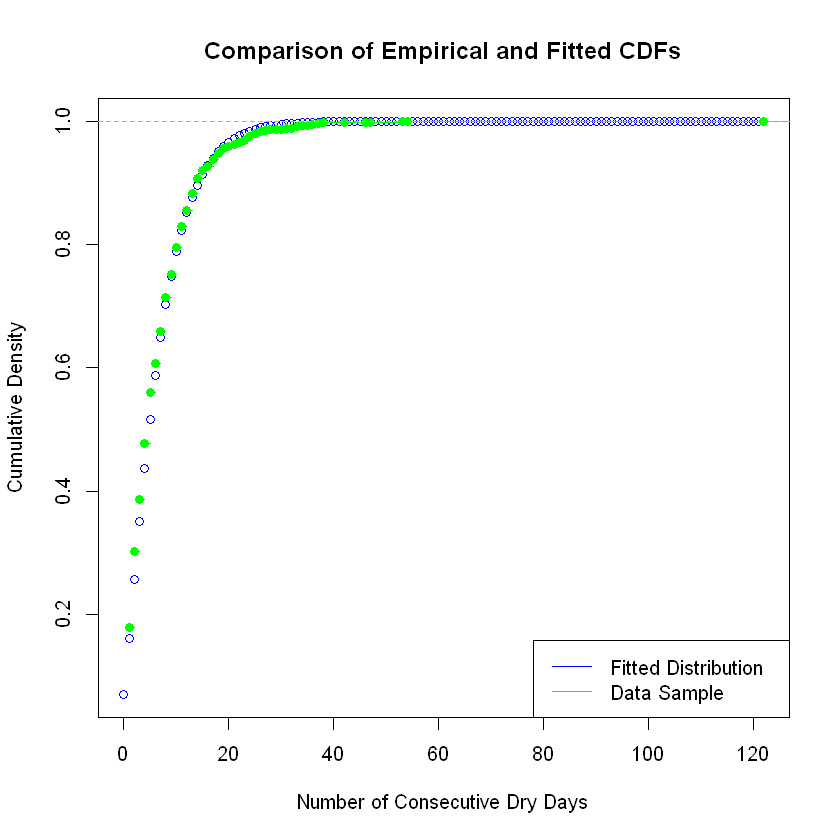

In [235]:
x <- seq(0,dAugMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dAug_mu, size=fdNB_dAug_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dAug$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

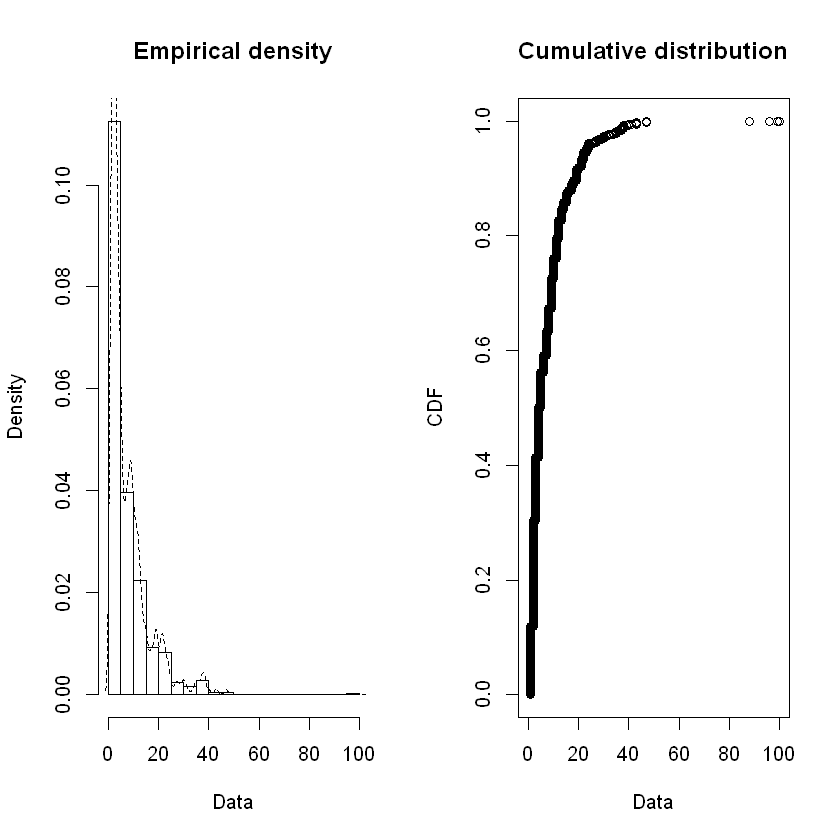

In [236]:
plotdist( dSep$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  100 
median:  4 
mean:  7.639352 
estimated sd:  8.227514 
estimated skewness:  2.837483 
estimated kurtosis:  18.71382 

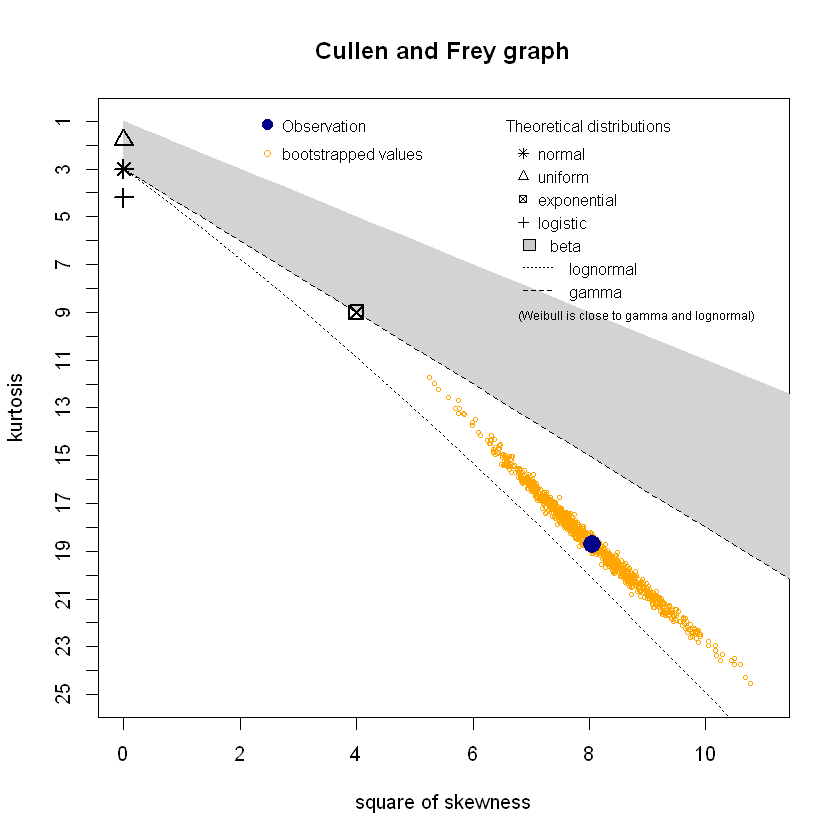

In [237]:
descdist( dSep$Dry_Count, boot=1000 )

In [238]:
fd_NB_dSep <- fitdist( dSep$Dry_Count, "nbinom" )
fd_GE_dSep <- fitdist( dSep$Dry_Count, "geom" )

In [239]:
fdNB_dSep_size <- fd_NB_dSep$estimate[["size"]]
fdNB_dSep_mu <- fd_NB_dSep$estimate[["mu"]]
cat("Sep size: ", fdNB_dSep_size, "\n", "Sep mu: ", fdNB_dSep_mu, "\n")

Sep size:  1.402213 
 Sep mu:  7.640938 


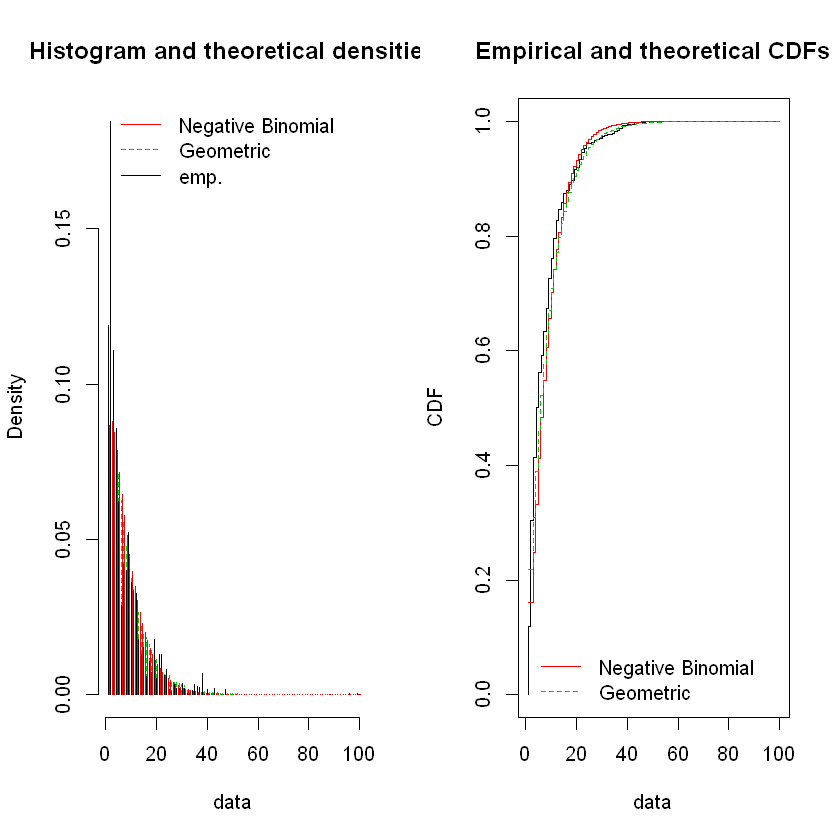

In [240]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dSep, fd_GE_dSep), legendtext=plot.legend )
cdfcomp( list(fd_NB_dSep, fd_GE_dSep), legendtext=plot.legend )

In [241]:
statRes <- gofstat( list(fd_NB_dSep, fd_GE_dSep), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [242]:
print(statRes)

Chi-squared statistic:  4552.584 4519.489 
Degree of freedom of the Chi-squared distribution:  20 21 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       2677             3603.97480      4910.5424
<= 2       4157             1983.45187      2037.7059
<= 3       2494             1900.59169      1801.8426
<= 4       1933             1767.36721      1593.2804
<= 5       1404             1613.44957      1408.8591
<= 6        650             1454.65889      1245.7844
<= 7        942             1299.72539      1101.5856
<= 8        898             1153.40598       974.0777
<= 9       1176             1018.11461       861.3288
<= 10       810              894.84808       761.6304
<= 11       757              783.74118       673.4722
<= 12       735              684.41182       595.5181
<= 13       403              596.18021       526.5873
<= 14       288              518.20983       465.6351
<= 15       345              449.59803    

In [243]:
fdNB_dSep_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [244]:
fdNB_dSep_p = fdNB_dSep_size / (fdNB_dSep_size + fdNB_dSep_mu)
cat("prob: ", fdNB_dSep_p)

prob:  0.155058

In [245]:
MonDistDF[9, ] <- list( 9, dSepMean, dSepBNr, fdNB_dSep_p, fdNB_dSep_mu, 
                        fdNB_dSep_size, fdNB_dSep_pvalue )

In [246]:
gf_dSep <- goodfit( dSep$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dSep_size, prob=fdNB_dSep_p) )

In [247]:
summary( gf_dSep )

Warning message in summary.goodfit(gf_dSep):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                        X^2  df P(> X^2)
Pearson          232866.381 100        0
Likelihood Ratio   8756.052  46        0


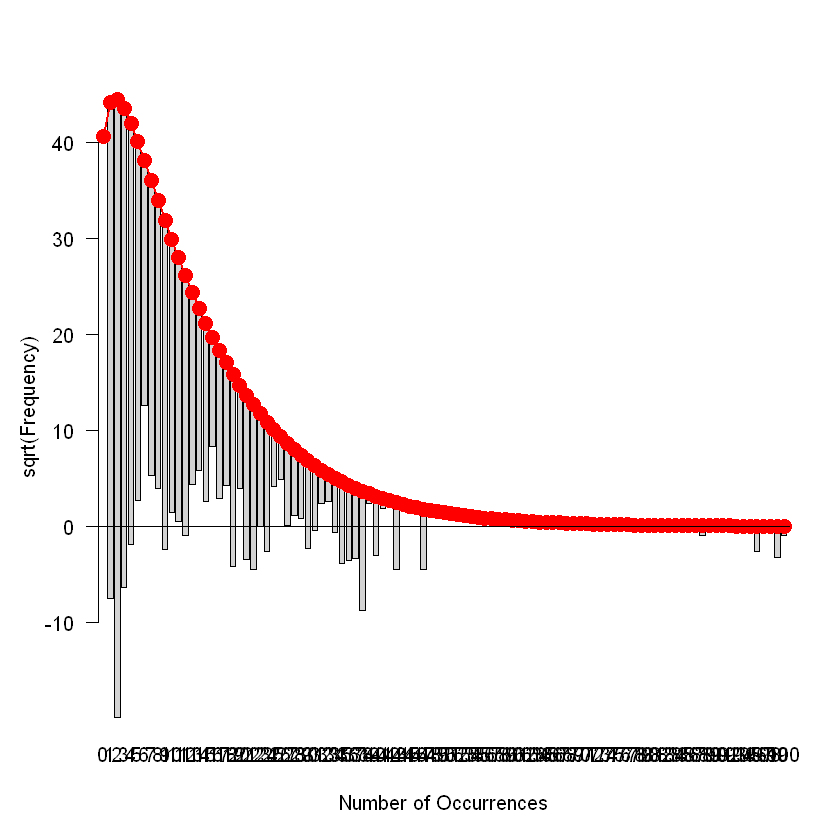

In [248]:
plot( gf_dSep )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

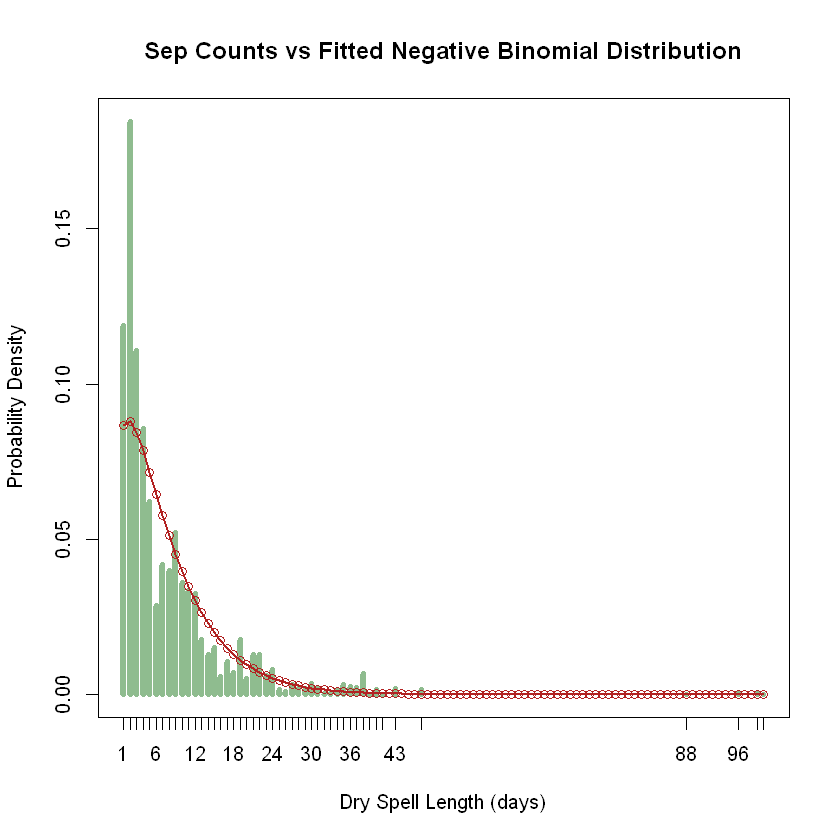

In [249]:
maxP <- max(dSep$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dSep_size, mu=fdNB_dSep_mu )
ttab <- table( dSep$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Sep Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

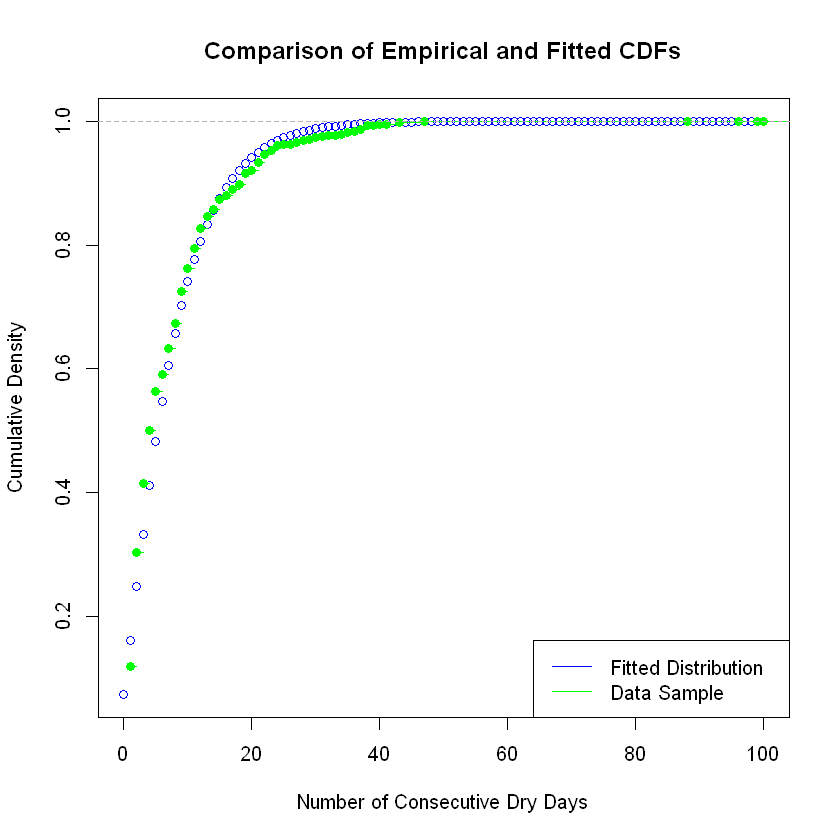

In [250]:
x <- seq(0,dSepMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dSep_mu, size=fdNB_dSep_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dSep$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

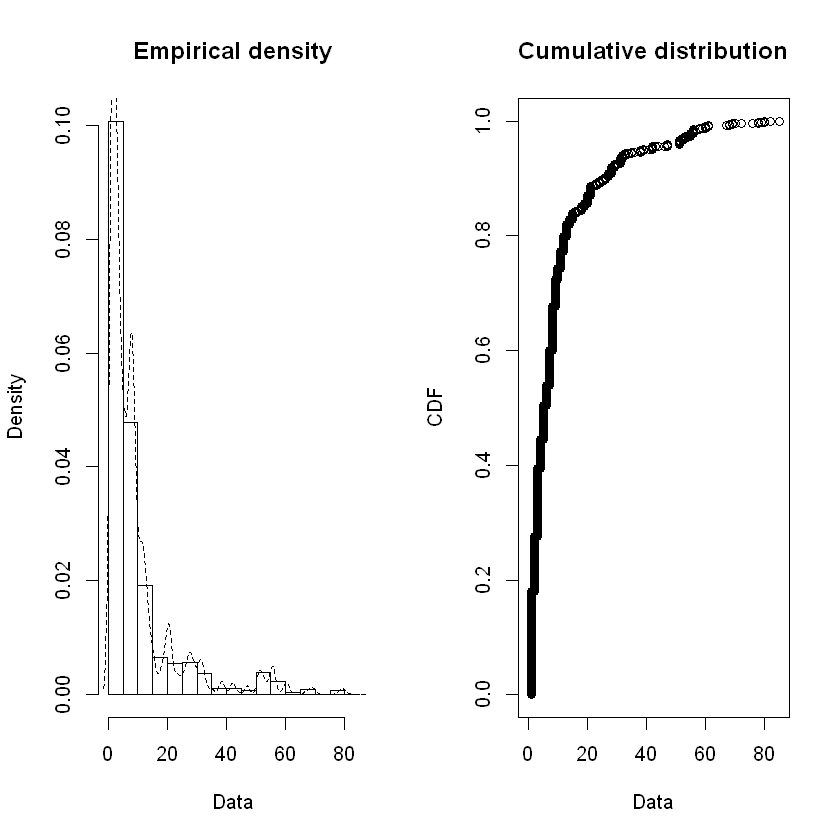

In [251]:
plotdist( dOct$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  85 
median:  5 
mean:  9.825452 
estimated sd:  12.97511 
estimated skewness:  2.631801 
estimated kurtosis:  10.43254 

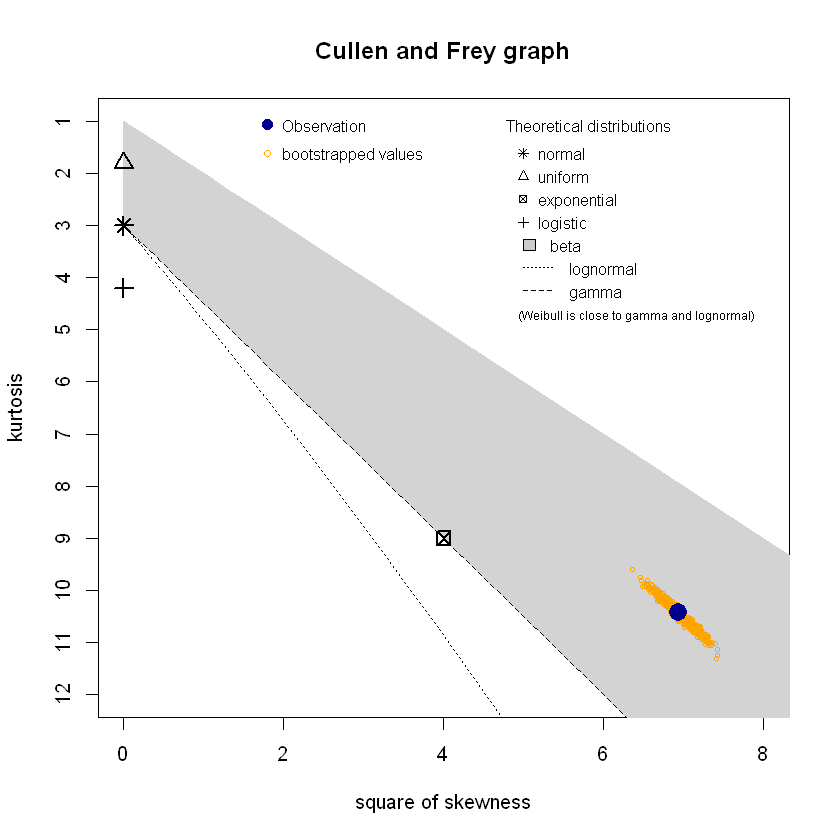

In [252]:
descdist( dOct$Dry_Count, boot=1000 )

In [253]:
fd_NB_dOct <- fitdist( dOct$Dry_Count, "nbinom" )
fd_GE_dOct <- fitdist( dOct$Dry_Count, "geom" )

In [254]:
fdNB_dOct_size <- fd_NB_dOct$estimate[["size"]]
fdNB_dOct_mu <- fd_NB_dOct$estimate[["mu"]]
cat("Oct size: ", fdNB_dOct_size, "\n", "Oct mu: ", fdNB_dOct_mu, "\n")

Oct size:  0.9832842 
 Oct mu:  9.824798 


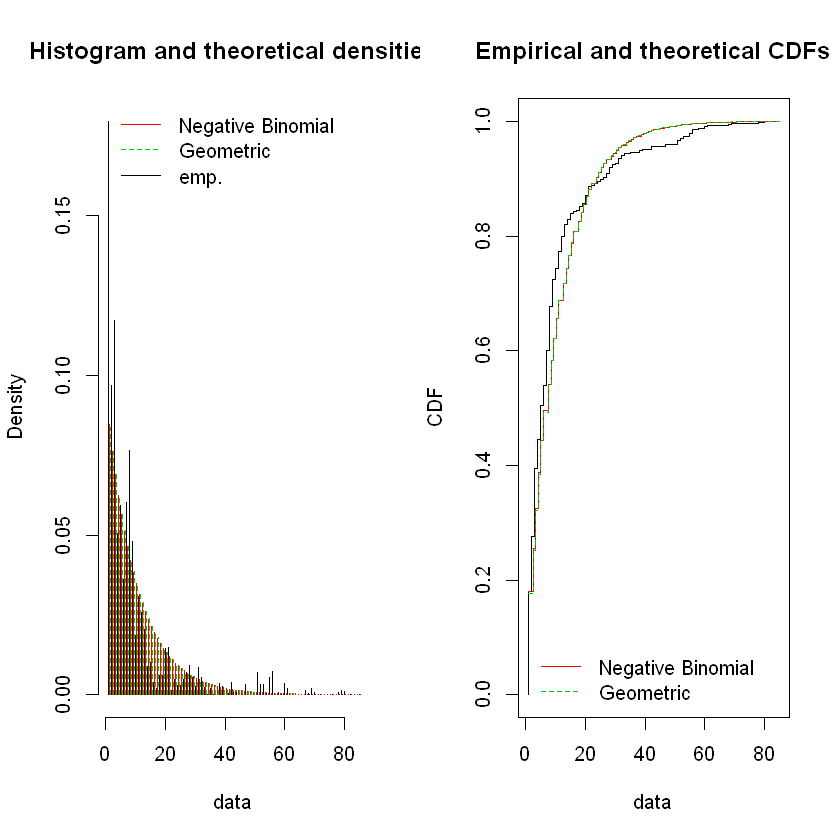

In [255]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dOct, fd_GE_dOct), legendtext=plot.legend )
cdfcomp( list(fd_NB_dOct, fd_GE_dOct), legendtext=plot.legend )

In [256]:
statRes <- gofstat( list(fd_NB_dOct, fd_GE_dOct), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [257]:
print(statRes)

Chi-squared statistic:  5276.942 5399.08 
Degree of freedom of the Chi-squared distribution:  23 24 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       3385             3379.27344     3320.45064
<= 2       1828             1437.69503     1433.89384
<= 3       2209             1299.61627     1301.43805
<= 4        953             1176.44448     1181.21785
<= 5       1114             1065.84017     1072.10298
<= 6        680              966.17425      973.06758
<= 7       1136              876.17756      883.18057
<= 8       1444              794.80158      801.59685
<= 9        904              721.15122      727.54943
<= 10       348              654.44744      660.34213
<= 11       579              594.00390      599.34310
<= 12       485              539.21120      543.97884
<= 13       387              489.52526      493.72885
<= 15       355              848.03143      854.84630
<= 18       223             1001.52678     

In [258]:
fdNB_dOct_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [259]:
fdNB_dOct_p = fdNB_dOct_size / (fdNB_dOct_size + fdNB_dOct_mu)
cat("prob: ", fdNB_dOct_p)

prob:  0.09097675

In [260]:
MonDistDF[10, ] <- list( 10, dOctMean, dOctBNr, fdNB_dOct_p, fdNB_dOct_mu, 
                         fdNB_dOct_size, fdNB_dOct_pvalue )

In [261]:
gf_dOct <- goodfit( dOct$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dOct_size, prob=fdNB_dOct_p) )

In [262]:
summary( gf_dOct )

Warning message in summary.goodfit(gf_dOct):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          14991.46 85        0
Likelihood Ratio 11666.18 64        0


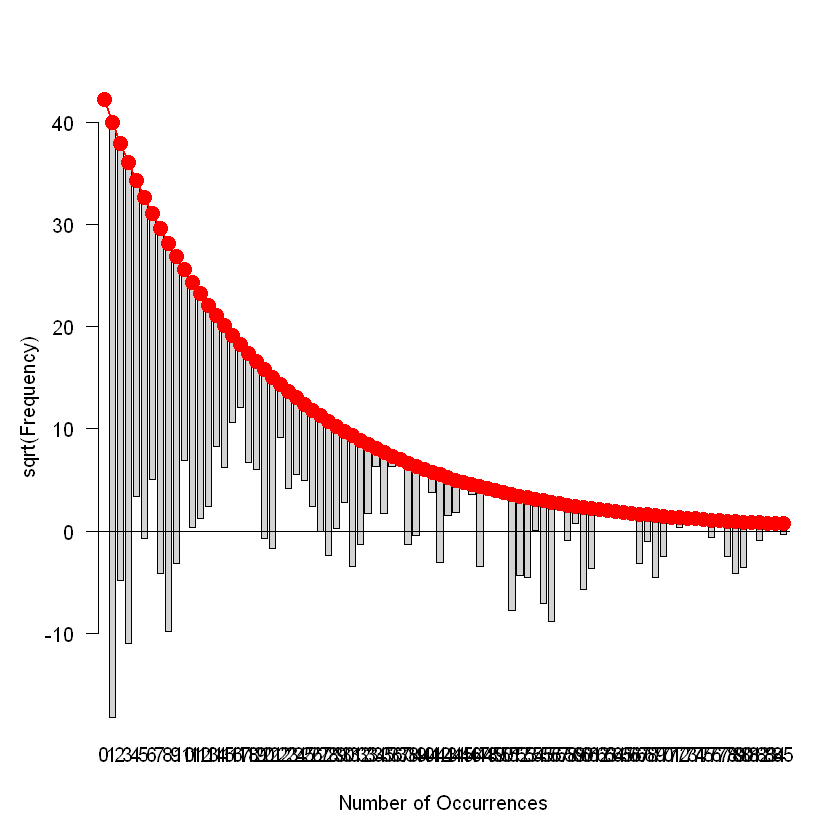

In [263]:
plot( gf_dOct )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

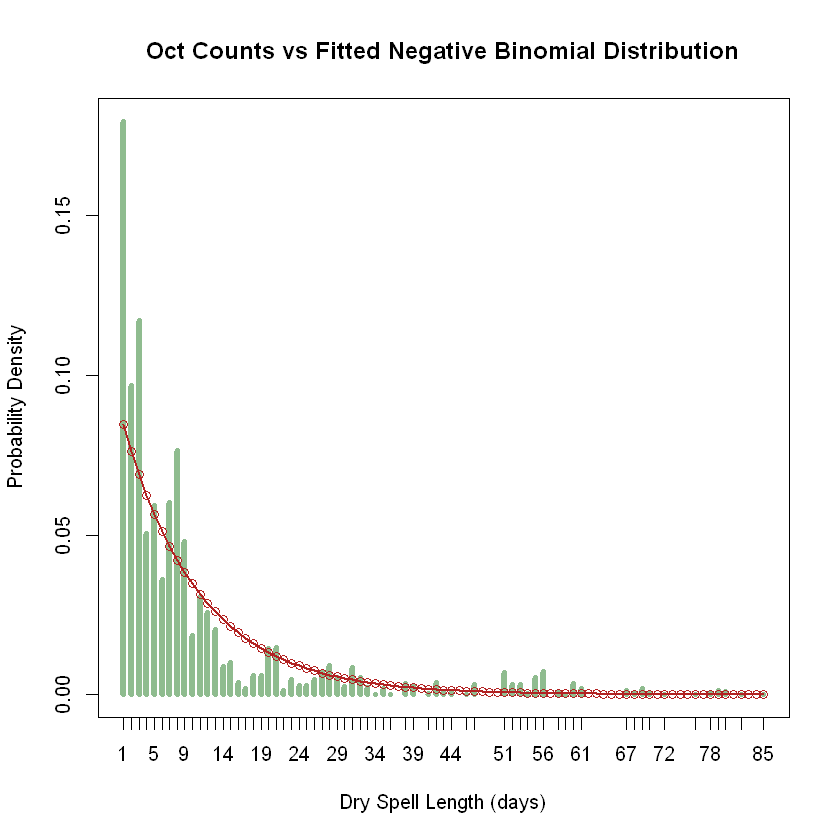

In [264]:
maxP <- max(dOct$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dOct_size, mu=fdNB_dOct_mu )
ttab <- table( dOct$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Oct Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

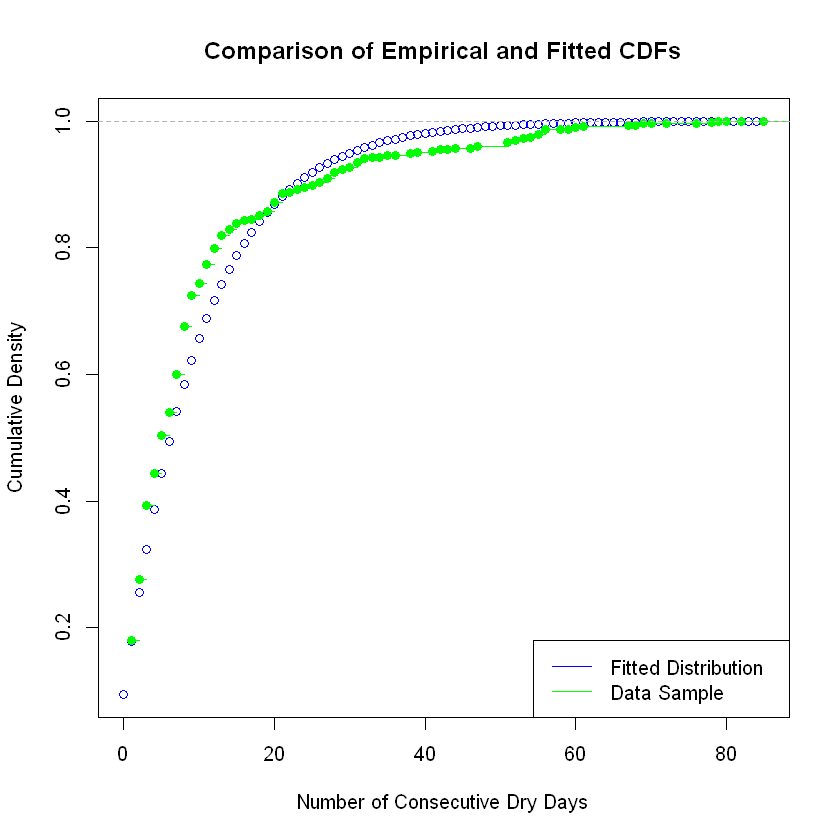

In [265]:
x <- seq(0,dOctMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dOct_mu, size=fdNB_dOct_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dOct$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

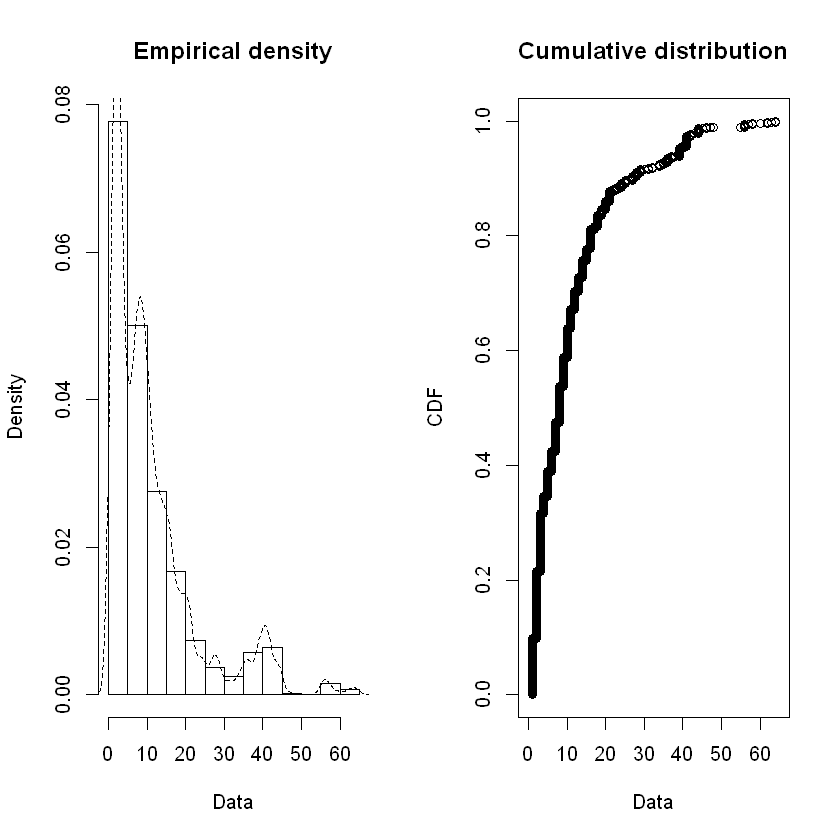

In [266]:
plotdist( dNov$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  64 
median:  8 
mean:  11.08903 
estimated sd:  11.41701 
estimated skewness:  1.889517 
estimated kurtosis:  6.665216 

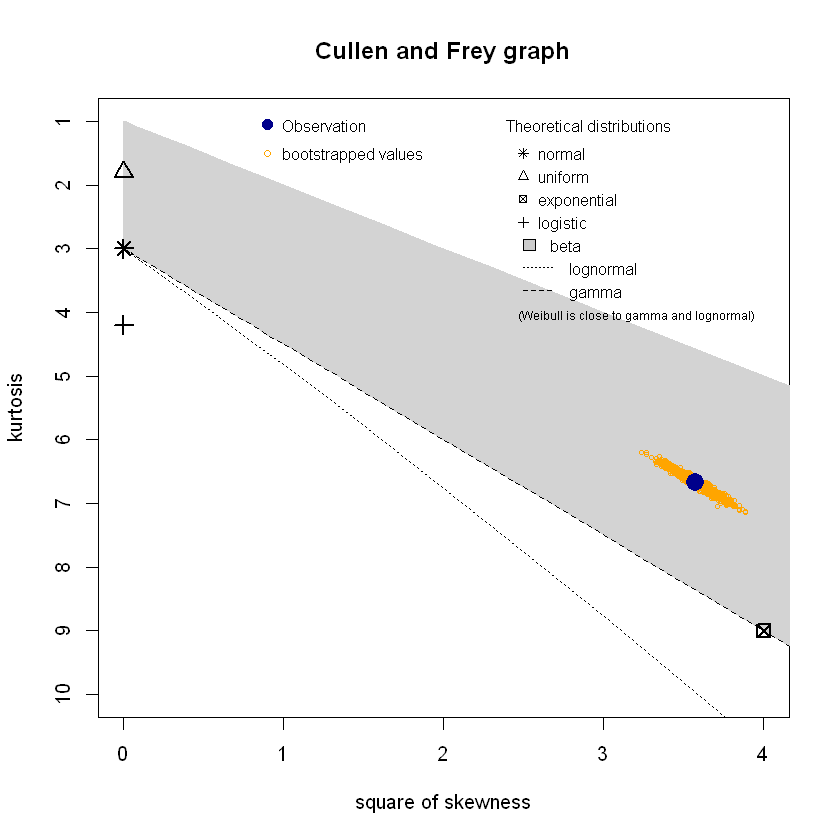

In [267]:
descdist( dNov$Dry_Count, boot=1000 )

In [268]:
fd_NB_dNov <- fitdist( dNov$Dry_Count, "nbinom" )
fd_GE_dNov <- fitdist( dNov$Dry_Count, "geom" )

In [269]:
fdNB_dNov_size <- fd_NB_dNov$estimate[["size"]]
fdNB_dNov_mu <- fd_NB_dNov$estimate[["mu"]]
cat("Nov size: ", fdNB_dNov_size, "\n", "Nov mu: ", fdNB_dNov_mu, "\n")

Nov size:  1.267619 
 Nov mu:  11.09002 


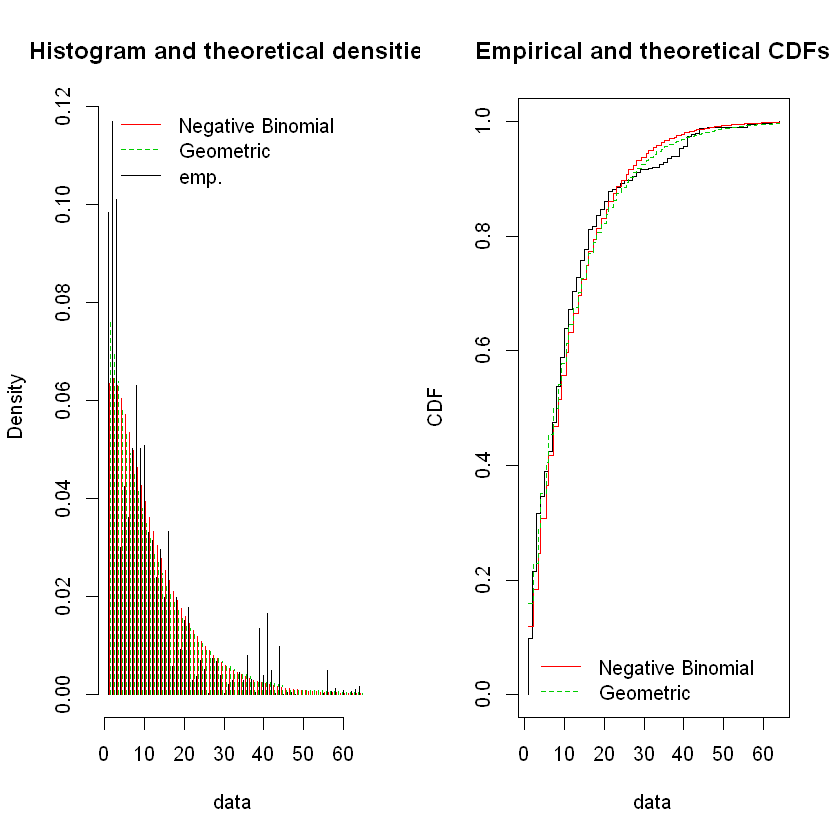

In [270]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dNov, fd_GE_dNov), legendtext=plot.legend )
cdfcomp( list(fd_NB_dNov, fd_GE_dNov), legendtext=plot.legend )

In [271]:
statRes <- gofstat( list(fd_NB_dNov, fd_GE_dNov), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [272]:
print(statRes)

Chi-squared statistic:  3389.922 3240.628 
Degree of freedom of the Chi-squared distribution:  24 25 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       1373             1664.42471     2214.32775
<= 2       1633              901.28528      971.76324
<= 3       1410              880.98650      891.37934
<= 4        418              843.51289      817.64476
<= 5        593              797.50407      750.00947
<= 6        506              747.62029      687.96896
<= 7        700              696.58165      631.06041
<= 8        882              646.03989      578.85932
<= 9        702              597.01032      530.97629
<= 10       709              550.10859      487.05412
<= 11       461              505.69043      446.76518
<= 12       440              463.93871      409.80892
<= 13       335              424.91992      375.90967
<= 14       413              388.62202      344.81456
<= 15       278              354.98035    

In [273]:
fdNB_dNov_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [274]:
fdNB_dNov_p = fdNB_dNov_size / (fdNB_dNov_size + fdNB_dNov_mu)
cat("prob: ", fdNB_dNov_p)

prob:  0.1025777

In [275]:
MonDistDF[11, ] <- list( 11, dNovMean, dNovBNr, fdNB_dNov_p, fdNB_dNov_mu, 
                         fdNB_dNov_size, fdNB_dNov_pvalue )

In [276]:
gf_dNov <- goodfit( dNov$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dNov_size, prob=fdNB_dNov_p) )

In [277]:
summary( gf_dNov )

Warning message in summary.goodfit(gf_dNov):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          7321.514 64        0
Likelihood Ratio 6349.174 54        0


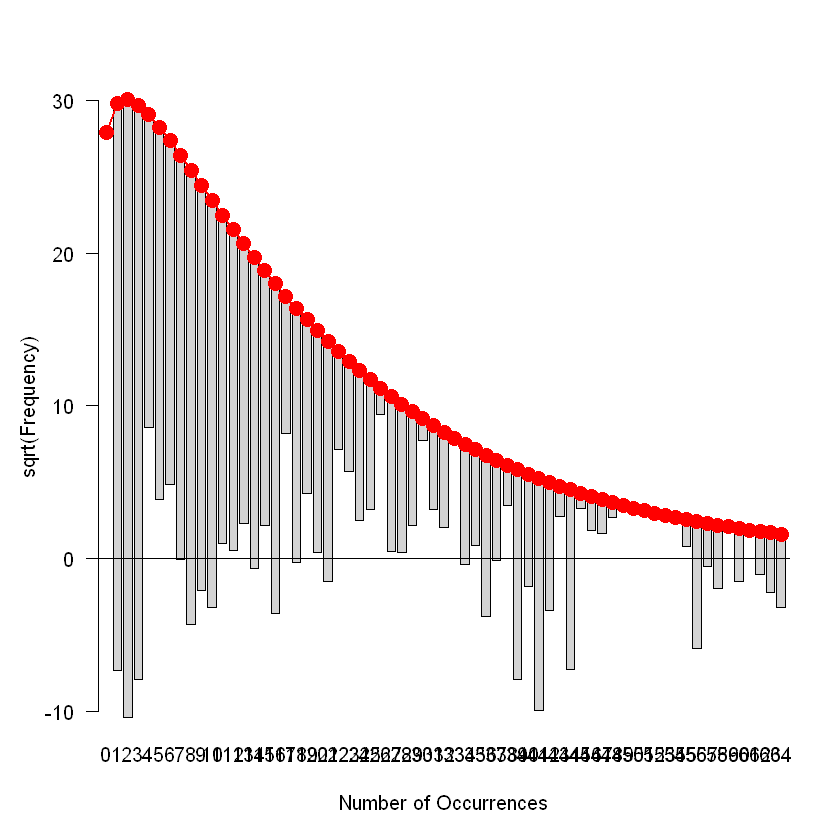

In [278]:
plot( gf_dNov )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

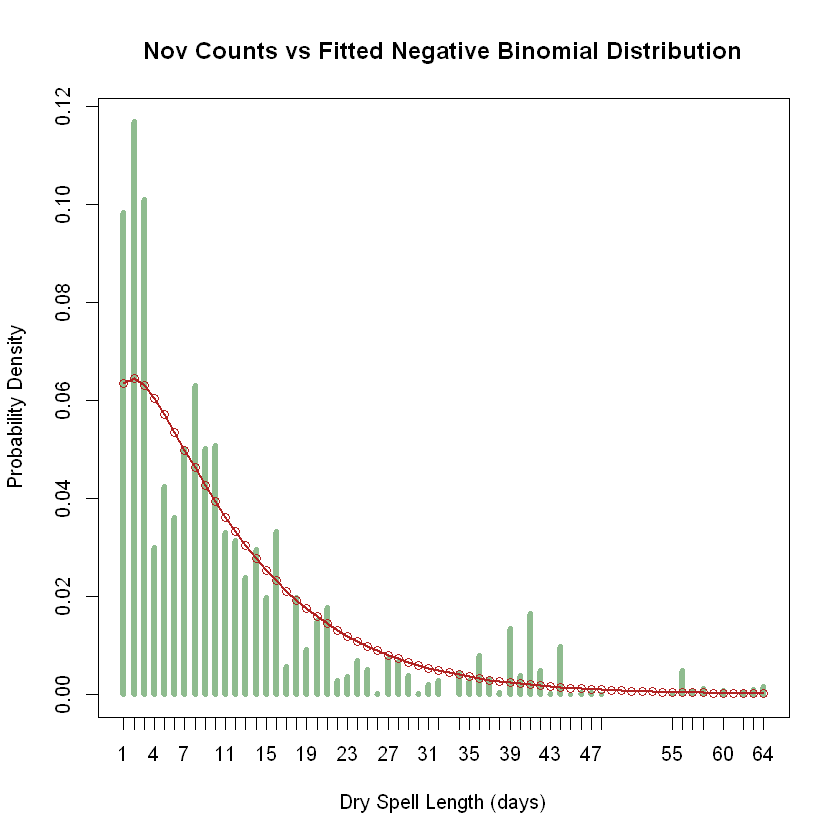

In [279]:
maxP <- max(dNov$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dNov_size, mu=fdNB_dNov_mu )
ttab <- table( dNov$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Nov Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

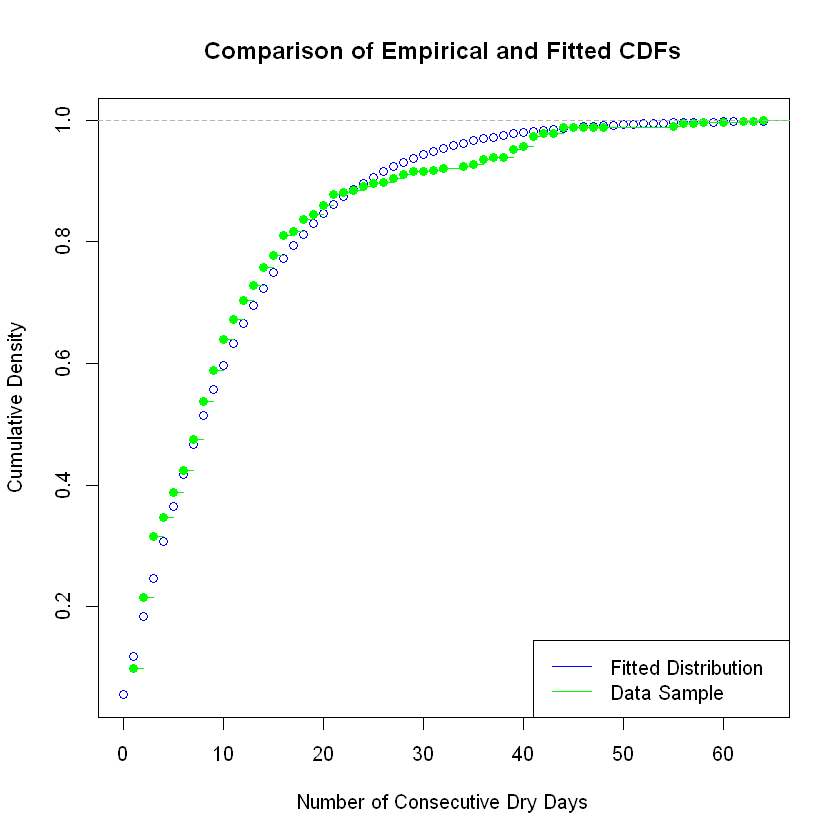

In [280]:
x <- seq(0,dNovMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dNov_mu, size=fdNB_dNov_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dNov$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

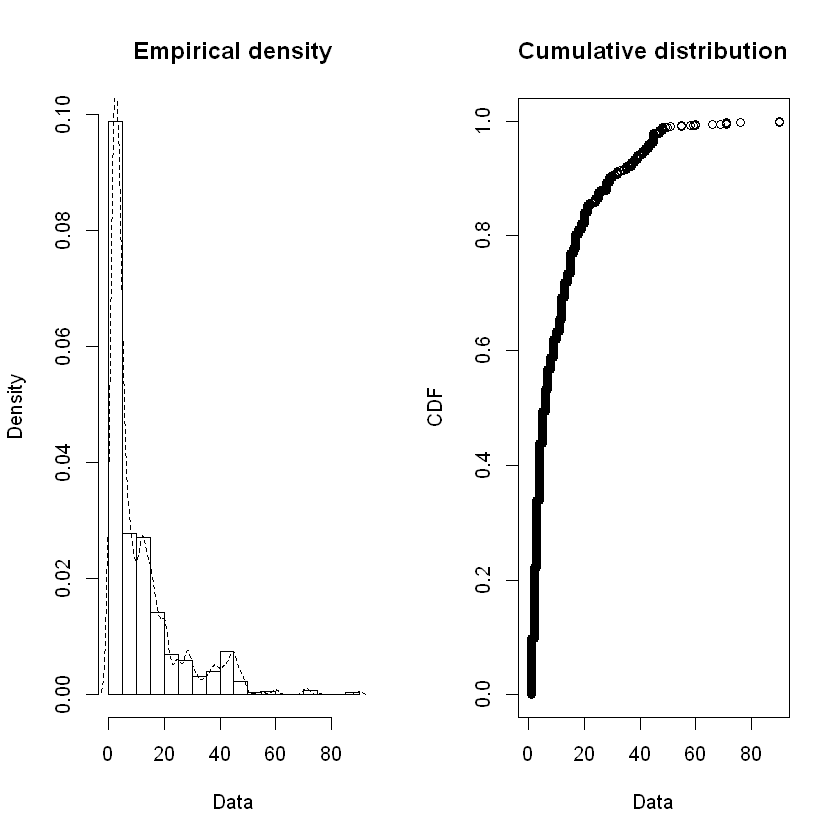

In [281]:
plotdist( dDec$Dry_Count, histo=TRUE, demp=TRUE )

summary statistics
------
min:  1   max:  90 
median:  6 
mean:  11.27555 
estimated sd:  12.85614 
estimated skewness:  2.02292 
estimated kurtosis:  7.74364 

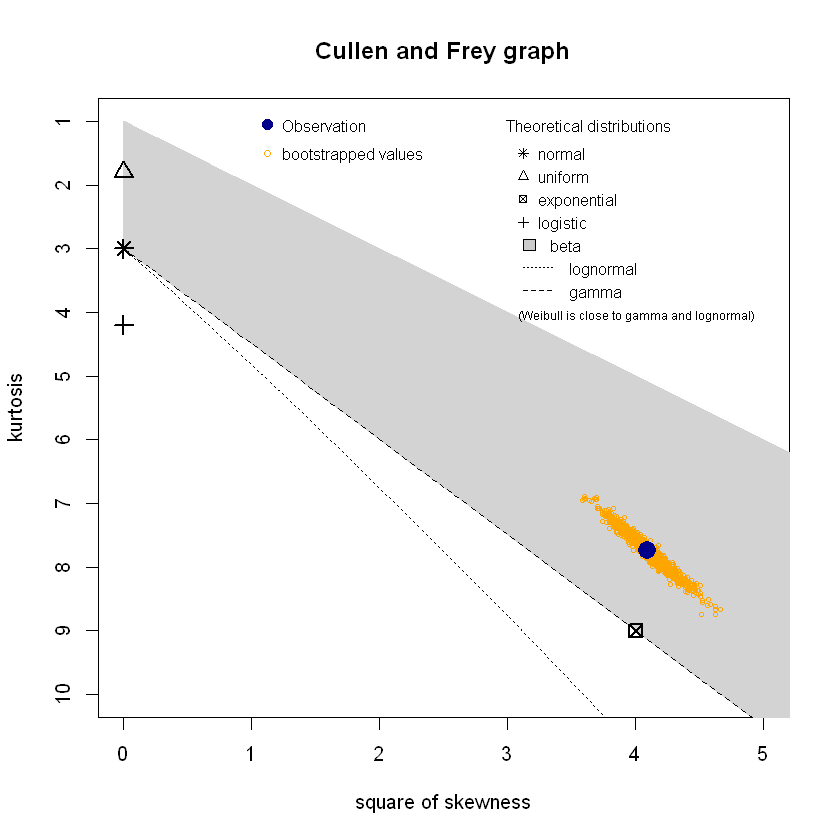

In [282]:
descdist( dDec$Dry_Count, boot=1000 )

In [283]:
fd_NB_dDec <- fitdist( dDec$Dry_Count, "nbinom" )
fd_GE_dDec <- fitdist( dDec$Dry_Count, "geom" )

In [284]:
fdNB_dDec_size <- fd_NB_dDec$estimate[["size"]]
fdNB_dDec_mu <- fd_NB_dDec$estimate[["mu"]]
cat("Dec size: ", fdNB_dDec_size, "\n", "Dec mu: ", fdNB_dDec_mu, "\n")

Dec size:  1.078355 
 Dec mu:  11.27381 


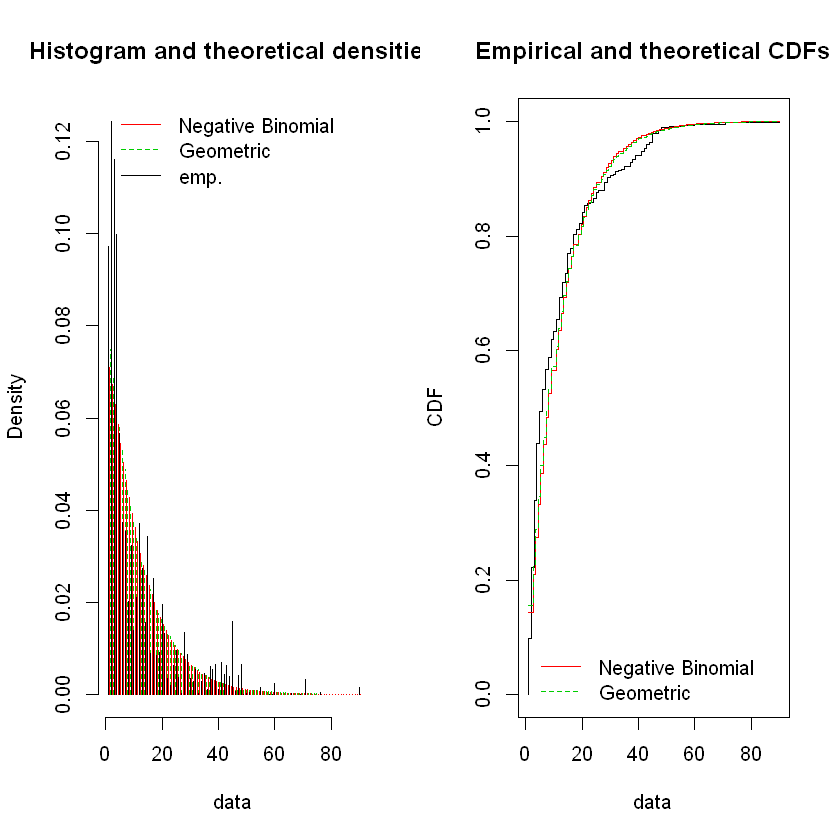

In [285]:
par(mfrow=c(1,2))
plot.legend <- c("Negative Binomial", "Geometric")
denscomp( list(fd_NB_dDec, fd_GE_dDec), legendtext=plot.legend )
cdfcomp( list(fd_NB_dDec, fd_GE_dDec), legendtext=plot.legend )

In [286]:
statRes <- gofstat( list(fd_NB_dDec, fd_GE_dDec), 
                    fitnames=c("Negative Binomial", "Geometric") )

In [287]:
print(statRes)

Chi-squared statistic:  4142.05 4016.857 
Degree of freedom of the Chi-squared distribution:  25 26 
Chi-squared p-value:  0 0 
Chi-squared table:
      obscounts theo Negative Binomial theo Geometric
<= 1       1329             1954.70519      2134.9122
<= 2       1699              919.60150       938.8654
<= 3       1587              861.24115       862.3828
<= 4       1363              801.45187       792.1307
<= 5        774              742.94751       727.6016
<= 6        510              686.94279       668.3292
<= 7        485              633.99013       613.8852
<= 8        276              584.30967       563.8764
<= 9        442              537.94187       517.9415
<= 10       190              494.82612       475.7486
<= 11       289              454.84438       436.9928
<= 12       508              417.84672       401.3942
<= 13       375              383.66694       368.6955
<= 14       213              352.13231       338.6605
<= 15       469              323.06968     

In [288]:
fdNB_dDec_pvalue <- statRes$chisqpvalue[["Negative Binomial"]]

In [289]:
fdNB_dDec_p = fdNB_dDec_size / (fdNB_dDec_size + fdNB_dDec_mu)
cat("prob: ", fdNB_dDec_p)

prob:  0.08730093

In [290]:
MonDistDF[12, ] <- list( 12, dDecMean, dDecBNr, fdNB_dDec_p, fdNB_dDec_mu, 
                         fdNB_dDec_size, fdNB_dDec_pvalue )

In [291]:
gf_dDec <- goodfit( dDec$Dry_Count, type="nbinomial", method="ML", 
                    par=list(size=fdNB_dDec_size, prob=fdNB_dDec_p) )

In [292]:
summary( gf_dDec )

Warning message in summary.goodfit(gf_dDec):
"Chi-squared approximation may be incorrect"


	 Goodness-of-fit test for nbinomial distribution

                      X^2 df P(> X^2)
Pearson          7869.869 90        0
Likelihood Ratio 7087.077 59        0


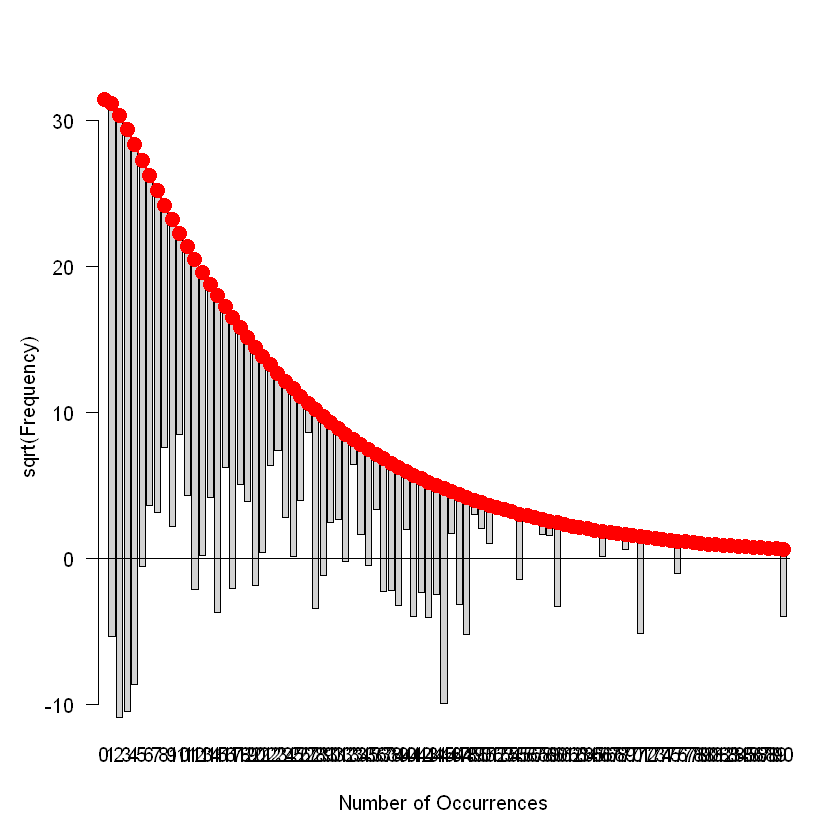

In [293]:
plot( gf_dDec )

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""add" is not a graphical parameter"

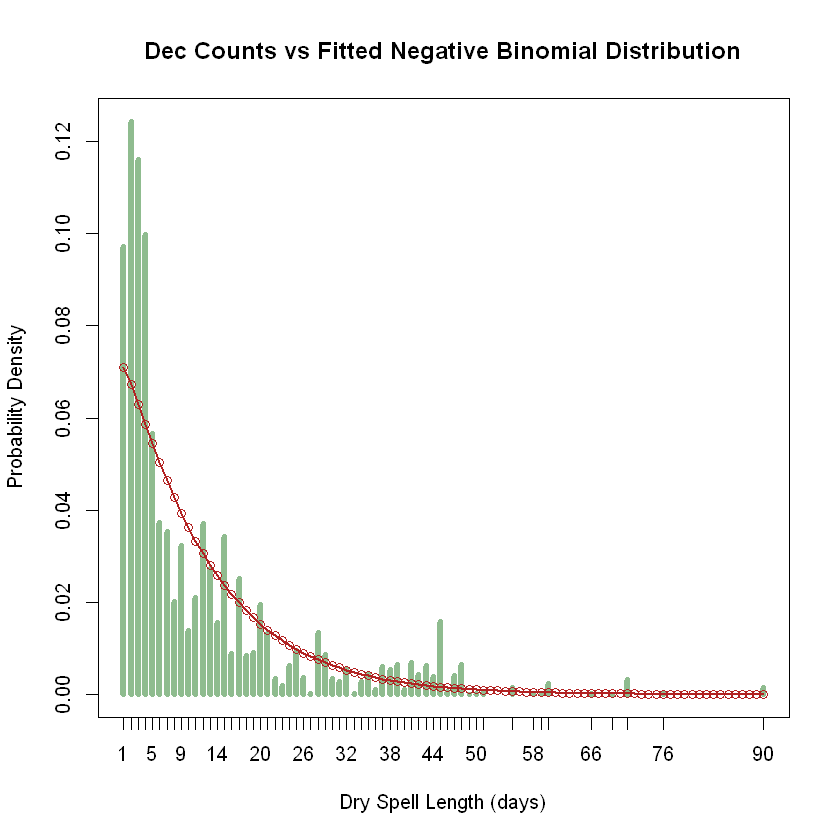

In [294]:
maxP <- max(dDec$Dry_Count)
xVals <- seq(1, maxP, 1)
pdVals <- dnbinom( xVals, size=fdNB_dDec_size, mu=fdNB_dDec_mu )
ttab <- table( dDec$Dry_Count )
pltTab <- ttab / sum( ttab )
plot( pltTab, type="h", lwd=5, col="darkseagreen", 
      xlab="Dry Spell Length (days)", ylab="Probability Density",
      main="Dec Counts vs Fitted Negative Binomial Distribution" )
lines( xVals, pdVals, lwd=2, lty=1, col="firebrick", add=TRUE)
points( xVals, pdVals, pch=1, col="firebrick", add=TRUE)

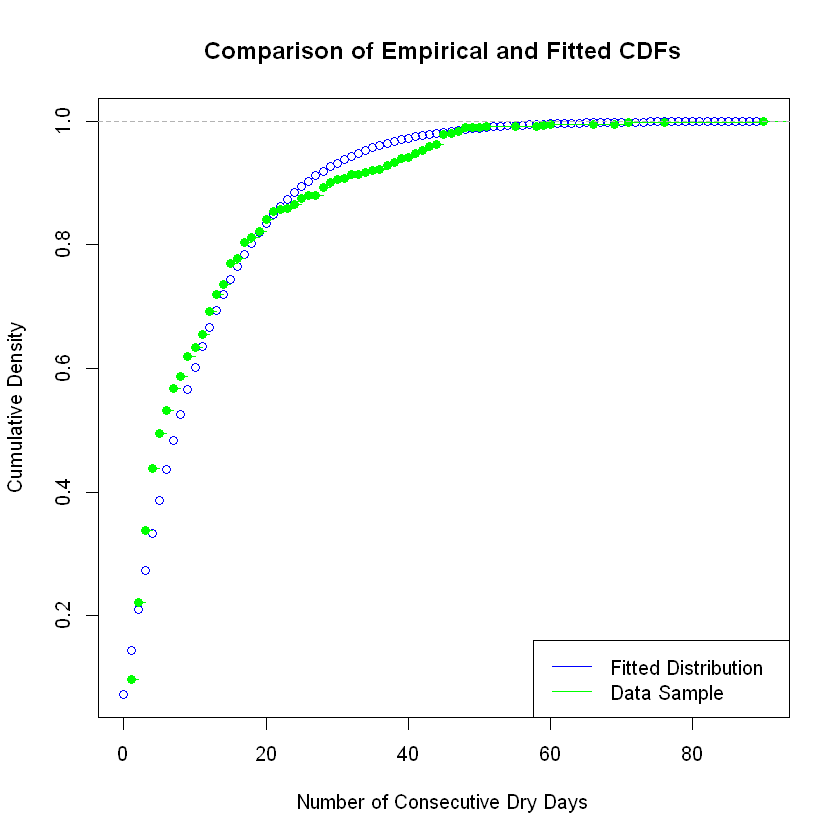

In [295]:
x <- seq(0,dDecMax,1)
plot.legend <- c("Fitted Distribution", "Data Sample" )
plot(x, pnbinom(x, mu=fdNB_dDec_mu, size=fdNB_dDec_size),
     xlab="Number of Consecutive Dry Days", ylab="Cumulative Density",
     col="blue", main="Comparison of Empirical and Fitted CDFs" )
plot(ecdf(dDec$Dry_Count), col="green", add=TRUE )
legend('bottomright', plot.legend, lty=1, col=c("blue", "green"))

Look at our summary DataFrame

In [296]:
print( MonDistDF, quote=FALSE, row.names=FALSE )

 month       smu     ssize      sprob       tmu     tsize        pvalue
     1  8.667023 1.1728003 0.13766079  8.667270 1.3836124  0.000000e+00
     2  8.246318 1.0826222 0.14926701  8.248172 1.4471991  0.000000e+00
     3  8.187301 1.2435591 0.17566845  8.187292 1.7447456  0.000000e+00
     4  7.712354 1.3811293 0.20197937  7.714156 1.9524563  0.000000e+00
     5  6.137622 1.2164647 0.21506109  6.138520 1.6818593  0.000000e+00
     6  6.979430 0.7032468 0.14119754  6.980845 1.1477355  0.000000e+00
     7  9.004230 0.9982905 0.11595590  9.004224 1.1810417  0.000000e+00
     8  6.787960 1.0722743 0.19194347  6.787059 1.6121788 4.088234e-195
     9  7.639352 0.9718089 0.15505802  7.640938 1.4022132  0.000000e+00
    10  9.825452 0.6089743 0.09097675  9.824798 0.9832842  0.000000e+00
    11 11.089027 1.0310871 0.10257771 11.090025 1.2676187  0.000000e+00
    12 11.275549 0.8255455 0.08730093 11.273808 1.0783553  0.000000e+00


## Check that No Grid Cell Outliers

Check that there are not any grid cell outliers

In [ ]:
OurGridIDs <- unique( dfDry$Grid_Id )
NumIDs = length(OurGridIDs)
cat("Number of GridIDS: ", NumIDs)

In [ ]:
TotNRows <- nrow( dfDry )
cat("Total Rows in DF: ", TotNRows)

Create a DataFrame to store all of our p-values by Grid_ID and Month

In [ ]:
MonPVDF <- data.frame( gridid=rep(NA,NumIDs), jan=rep(NA,NumIDs), feb=rep(NA,NumIDs), 
                       mar=rep(NA,NumIDs), apr=rep(NA,NumIDs), may=rep(NA,NumIDs),
                       jun=rep(NA,NumIDs), jul=rep(NA,NumIDs), aug=rep(NA,NumIDs),
                       sep=rep(NA,NumIDs), oct=rep(NA,NumIDs), nov=rep(NA,NumIDs),
                       dec=rep(NA,NumIDs), stringsAsFactors=FALSE )

Change the working directory to a subdirectory for output

In [ ]:
setwd("PRISM_DryDays")

In [ ]:
capO <- file( "Grid_Month_Check.txt", "w" )
cat("Determine if each grid, monthly values are from same distribution\n\n", file=capO )
for(iI in 1:NumIDs) {
    # get the grid ID
    tID <- OurGridIDs[iI]
    cat("Grid Node: ", tID, " \n", file=capO, append=TRUE )
    # january
    cJanPick <- dJan %>% filter( Grid_Id == tID )
    cJanOther <- dJan %>% filter( Grid_Id != tID )
    cJanRes <- ks.test( cJanPick$Dry_Count, cJanOther$Dry_Count )
    cat("    January --- \n", file=capO, append=TRUE )
    cat("          ", cJanRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cJanRes$statistic, ", ", cJanRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    # set our color
    if (cJanRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Jan.png")
    titleStr <- paste("Grid ID ", tID, " January Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cJanPick$Dry_Count, cJanOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dJanMax), ylim=c(0,dJanMax) )
    abline( 0, 1)
    dev.off()
    # february
    cFebPick <- dFeb %>% filter( Grid_Id == tID )
    cFebOther <- dFeb %>% filter( Grid_Id != tID )
    cFebRes <- ks.test( cFebPick$Dry_Count, cFebOther$Dry_Count )
    cat("    February --- \n", file=capO, append=TRUE )
    cat("          ", cFebRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cFebRes$statistic, ", ", cFebRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cFebRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Feb.png")
    titleStr <- paste("Grid ID ", tID, " February Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cFebPick$Dry_Count, cFebOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dFebMax), ylim=c(0,dFebMax) )
    abline( 0, 1)
    dev.off()
    # march
    cMarPick <- dMar %>% filter( Grid_Id == tID )
    cMarOther <- dMar %>% filter( Grid_Id != tID )
    cMarRes <- ks.test( cMarPick$Dry_Count, cMarOther$Dry_Count )
    cat("    March --- \n", file=capO, append=TRUE )
    cat("          ", cMarRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cMarRes$statistic, ", ", cMarRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cMarRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Mar.png")
    titleStr <- paste("Grid ID ", tID, " March Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cMarPick$Dry_Count, cMarOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dMarMax), ylim=c(0,dMarMax) )
    abline( 0, 1)
    dev.off()
    # april
    cAprPick <- dApr %>% filter( Grid_Id == tID )
    cAprOther <- dApr %>% filter( Grid_Id != tID )
    cAprRes <- ks.test( cAprPick$Dry_Count, cAprOther$Dry_Count )
    cat("    April --- \n", file=capO, append=TRUE )
    cat("          ", cAprRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cAprRes$statistic, ", ", cAprRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cAprRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Apr.png")
    titleStr <- paste("Grid ID ", tID, " April Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cAprPick$Dry_Count, cAprOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dAprMax), ylim=c(0,dAprMax) )
    abline( 0, 1)
    dev.off()
    # may
    cMayPick <- dMay %>% filter( Grid_Id == tID )
    cMayOther <- dMay %>% filter( Grid_Id != tID )
    cMayRes <- ks.test( cMayPick$Dry_Count, cMayOther$Dry_Count )
    cat("    May --- \n", file=capO, append=TRUE )
    cat("          ", cMayRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cMayRes$statistic, ", ", cMayRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cMayRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_May.png")
    titleStr <- paste("Grid ID ", tID, " May Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cMayPick$Dry_Count, cMayOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dMayMax), ylim=c(0,dMayMax) )
    abline( 0, 1)
    dev.off()
    # june
    cJunPick <- dJun %>% filter( Grid_Id == tID )
    cJunOther <- dJun %>% filter( Grid_Id != tID )
    cJunRes <- ks.test( cJunPick$Dry_Count, cJunOther$Dry_Count )
    cat("    June --- \n", file=capO, append=TRUE )
    cat("          ", cJunRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cJunRes$statistic, ", ", cJunRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cJunRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Jun.png")
    titleStr <- paste("Grid ID ", tID, " June Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cJunPick$Dry_Count, cJunOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dJunMax), ylim=c(0,dJunMax) )
    abline( 0, 1)
    dev.off()
    # july
    cJulPick <- dJul %>% filter( Grid_Id == tID )
    cJulOther <- dJul %>% filter( Grid_Id != tID )
    cJulRes <- ks.test( cJulPick$Dry_Count, cJulOther$Dry_Count )
    cat("    July --- \n", file=capO, append=TRUE )
    cat("          ", cJulRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cJulRes$statistic, ", ", cJulRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cJulRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Jul.png")
    titleStr <- paste("Grid ID ", tID, " July Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cJulPick$Dry_Count, cJulOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dJulMax), ylim=c(0,dJulMax) )
    abline( 0, 1)
    dev.off()
    # august
    cAugPick <- dAug %>% filter( Grid_Id == tID )
    cAugOther <- dAug %>% filter( Grid_Id != tID )
    cAugRes <- ks.test( cAugPick$Dry_Count, cAugOther$Dry_Count )
    cat("    August --- \n", file=capO, append=TRUE )
    cat("          ", cAugRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cAugRes$statistic, ", ", cAugRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cAugRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Aug.png")
    titleStr <- paste("Grid ID ", tID, " August Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cAugPick$Dry_Count, cAugOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dAugMax), ylim=c(0,dAugMax) )
    abline( 0, 1)
    dev.off()
    # september
    cSepPick <- dSep %>% filter( Grid_Id == tID )
    cSepOther <- dSep %>% filter( Grid_Id != tID )
    cSepRes <- ks.test( cSepPick$Dry_Count, cSepOther$Dry_Count )
    cat("    September --- \n", file=capO, append=TRUE )
    cat("          ", cSepRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cSepRes$statistic, ", ", cSepRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cSepRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Sep.png")
    titleStr <- paste("Grid ID ", tID, " September Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cSepPick$Dry_Count, cSepOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dSepMax), ylim=c(0,dSepMax) )
    abline( 0, 1)
    dev.off()
    # october
    cOctPick <- dOct %>% filter( Grid_Id == tID )
    cOctOther <- dOct %>% filter( Grid_Id != tID )
    cOctRes <- ks.test( cOctPick$Dry_Count, cOctOther$Dry_Count )
    cat("    October --- \n", file=capO, append=TRUE )
    cat("          ", cOctRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cOctRes$statistic, ", ", cOctRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cOctRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Oct.png")
    titleStr <- paste("Grid ID ", tID, " October Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cOctPick$Dry_Count, cOctOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dOctMax), ylim=c(0,dOctMax) )
    abline( 0, 1)
    dev.off()
    # november
    cNovPick <- dNov %>% filter( Grid_Id == tID )
    cNovOther <- dNov %>% filter( Grid_Id != tID )
    cNovRes <- ks.test( cNovPick$Dry_Count, cNovOther$Dry_Count )
    cat("    November --- \n", file=capO, append=TRUE )
    cat("          ", cNovRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cNovRes$statistic, ", ", cNovRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", file=capO, append=TRUE)
    if (cNovRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Nov.png")
    titleStr <- paste("Grid ID ", tID, " November Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cNovPick$Dry_Count, cNovOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dNovMax), ylim=c(0,dNovMax) )
    abline( 0, 1)
    dev.off()
    # December
    cDecPick <- dDec %>% filter( Grid_Id == tID )
    cDecOther <- dDec %>% filter( Grid_Id != tID )
    cDecRes <- ks.test( cDecPick$Dry_Count, cDecOther$Dry_Count )
    cat("    December --- \n", file=capO, append=TRUE )
    cat("          ", cDecRes$method, "\n", file=capO, append=TRUE)
    cat("          ", cDecRes$statistic, ", ", cDecRes$p.value, "\n", file=capO, 
        append=TRUE)
    cat("\n", "\n", file=capO, append=TRUE)
    if (cDecRes$p.value < 0.10) {
        fPartr <- "Check_"
        psColr <- "red"
    } else {
        fPartr <- ""
        psColr <- "blue"
    }
    OutFName <- paste(fPartr, "GI_", tID, "_Dec.png")
    titleStr <- paste("Grid ID ", tID, " December Compare" )
    png( OutFName, width=640, height=480 )
    qqplot( cDecPick$Dry_Count, cDecOther$Dry_Count, col=psColr, 
            xlab=paste("Grid ID: ", tID), ylab="All Others", main=titleStr,
            xlim=c(0,dDecMax), ylim=c(0,dDecMax) )
    abline( 0, 1)
    dev.off()
    # add to our dataframe
    MonPVDF[iI, ] <-list( tID, cJanRes$p.value, cFebRes$p.value, cMarRes$p.value,
                          cAprRes$p.value, cMayRes$p.value, cJunRes$p.value,
                          cJulRes$p.value, cAugRes$p.value, cSepRes$p.value,
                          cOctRes$p.value, cNovRes$p.value, cDecRes$p.value )
}

In [ ]:
summary( MonPVDF )

Now filter for the p-values that are lower than 0.1 and look at these in terms of total number an Q-Q fit. Need to do these by month and then concatentate

In [ ]:
pGJan <- MonPVDF %>% filter( jan < 0.1 )
pGFeb <- MonPVDF %>% filter( feb < 0.1 )
pGMar <- MonPVDF %>% filter( mar < 0.1 )
pGApr <- MonPVDF %>% filter( apr < 0.1 )
pGMay <- MonPVDF %>% filter( may < 0.1 )
pGJun <- MonPVDF %>% filter( jun < 0.1 )
pGJul <- MonPVDF %>% filter( jul < 0.1 )
pGAug <- MonPVDF %>% filter( aug < 0.1 )
pGSep <- MonPVDF %>% filter( sep < 0.1 )
pGOct <- MonPVDF %>% filter( oct < 0.1 )
pGNov <- MonPVDF %>% filter( nov < 0.1 )
pGDec <- MonPVDF %>% filter( dec < 0.1 )

In [ ]:
pGDF <- rbind( pGJan, pGFeb, pGMar, pGApr, pGMay, pGJun, pGJul, pGAug, pGSep, 
               pGOct, pGNov, pGDec, make.row.names=TRUE, stringsAsFactors=FALSE )

In [ ]:
pGNRows <- nrow( pGDF )
uniqpGIds <- unique( pGDF$gridid )
pgNumUniq <- length( uniqpGIds )
cat("Total num rows: ", pGNRows, " Unique Grid IDs: ", pgNumUniq )

Consequently we need to drop some rows. However, we know that there are 29 grid cell and month combinations that have p-values below 0.1.

In [ ]:
TotalGridMo <- NumIDs * 12
pGFrac <- ( pGNRows / TotalGridMo )
cat("Total Grid cells x months: ", TotalGridMo, " Have ", pGNRows, 
    " problems for a fraction of ", pGFrac )

In [ ]:
uniqGridProbs <- unique( pGDF )

In [ ]:
print( uniqGridProbs )

## Output to a Spreadsheet

In [ ]:
outputDF_xlsx <- createWorkbook()

In [ ]:
sumstat_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="Summary_Stats")
mondist_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="Dist_Properties")
cp_xlsx <- createSheet(wb=outputDF_xlsx, sheetName="Check_Grid")

In [ ]:
addDataFrame( x=MonSumStatDF, sheet=sumstat_xlsx )
addDataFrame( x=MonDistDF, sheet=mondist_xlsx )
addDataFrame( x=MonPVDF, sheet=cp_xlsx )

In [ ]:
saveWorkbook( outputDF_xlsx, file="PRISM_Dry_RSummary.xlsx" )